<a href="https://colab.research.google.com/github/soc04112/ktcloud_genai/blob/main/105_LLM_%EC%96%B8%EC%96%B4AI%EC%9D%98%EC%B5%9C%EA%B7%BC%EC%97%AD%EC%82%AC_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ïñ∏Ïñ¥ AIÏùò ÏµúÍ∑º Ïó≠ÏÇ¨



---


- üí°**Ï∞∏Í≥† ÍµêÏû¨**
    - Ìï∏Ï¶àÏò®LLM https://www.hanbit.co.kr/store/books/look.php?p_code=B2599445240
- üí° **NOTE**
    - Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùò ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÎ†§Î©¥ GPUÎ•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§. Íµ¨Í∏Ä ÏΩîÎû©ÏóêÏÑúÎäî **Îü∞ÌÉÄÏûÑ > Îü∞ÌÉÄÏûÑ Ïú†Ìòï Î≥ÄÍ≤Ω > ÌïòÎìúÏõ®Ïñ¥ Í∞ÄÏÜçÍ∏∞ > T4 GPU**Î•º ÏÑ†ÌÉùÌïòÏÑ∏Ïöî.
    - **T4 GPU | 16 VRAM(Video Random Access Memory)**
---



**[Ï£ºÏùò!] (ÏΩîÎû©)ÌïúÍ∏Ä Ìè∞Ìä∏ ÏßÄÏ†ïÌïòÎäî Î∞©Î≤ï**

/usr/share/fonts:
truetype

/usr/share/fonts/truetype:
humor-sans
liberation

/usr/share/fonts/truetype/humor-sans:
Humor-Sans.ttf

/usr/share/fonts/truetype/liberation:
LiberationMono-BoldItalic.ttf
LiberationMono-Bold.ttf
LiberationMono-Italic.ttf
LiberationMono-Regular.ttf
LiberationSans-BoldItalic.ttf
LiberationSans-Bold.ttf
LiberationSans-Italic.ttf
LiberationSansNarrow-BoldItalic.ttf
LiberationSansNarrow-Bold.ttf
LiberationSansNarrow-Italic.ttf
LiberationSansNarrow-Regular.ttf
LiberationSans-Regular.ttf
LiberationSerif-BoldItalic.ttf
LiberationSerif-Bold.ttf
LiberationSerif-Italic.ttf
LiberationSerif-Regular.ttf
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get

‚úÖ ÎÇòÎàîÌè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å


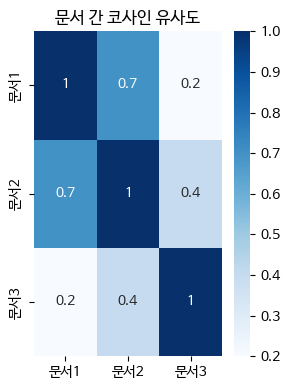

In [1]:
# 0) ÌôòÍ≤Ω Ï†êÍ≤Ä: ÏÑ§ÏπòÎêú Ìè∞Ìä∏ Ïã§Ï†ú ÌååÏùºÏù¥ ÏûàÎäîÏßÄ Î®ºÏ†Ä ÌôïÏù∏
!ls -R /usr/share/fonts | head -n 50

# 1) (Ïù¥ÎØ∏ ÏÑ§ÏπòÌñàÎã§Î©¥ ÏÉùÎûµ Í∞ÄÎä•) ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ïπò
!apt-get -y update
!apt-get -y install fonts-nanum fonts-noto-cjk

# 2) ÏãúÏä§ÌÖú Ìè∞Ìä∏ Ï∫êÏãú Ïû¨ÏÉùÏÑ±
!fc-cache -fv

# 3) Matplotlib ÎÇ¥Î∂Ä Ìè∞Ìä∏ Ï∫êÏãú ÏÇ≠Ï†ú (Ï§ëÏöî)
import os, shutil
import matplotlib
cache_dir = matplotlib.get_cachedir()      # Î≥¥ÌÜµ ~/.cache/matplotlib
# print("matplotlib cache:", cache_dir)
shutil.rmtree(cache_dir, ignore_errors=True)

# 4) Îü∞ÌÉÄÏûÑ Ïû¨ÏãúÏûë ÌïÑÏöî ÏóÜÏù¥, Ìè∞Ìä∏ Îß§ÎãàÏ†Ä Í∞ïÏ†ú Î¶¨Î°úÎìú
from matplotlib import font_manager
_ = font_manager._load_fontmanager(try_read_cache=False)

# 5) Ìè∞Ìä∏ Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏ (fc-listÏôÄ ÌååÏù¥Ïç¨ÏóêÏÑú Î™®Îëê ÌôïÏù∏)
# !fc-list | grep -i "nanum\|noto" | head -n 40

# from matplotlib import font_manager
# fonts = font_manager.findSystemFonts()
# [f for f in fonts if ("Nanum" in f or "NotoSansCJK" in f or "Noto" in f)][:10]


# 6) ÌïúÍ∏Ä Ìè∞Ìä∏ ÏßÄÏ†ï
import seaborn as sns
import numpy as np
from matplotlib import font_manager, pyplot as plt

font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font_manager.fontManager.addfont(font_path)
family_name = font_manager.FontProperties(fname=font_path).get_name()
# print("Ï†ÅÏö©Ìï† Ìå®Î∞ÄÎ¶¨Î™Ö:", family_name)

# plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["font.family"] = family_name # NanumBarunGothic
plt.rcParams["axes.unicode_minus"] = False
print("‚úÖ ÎÇòÎàîÌè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å")# Ìè∞Ìä∏ ÏßÄÏ†ï


# 7) ÏòàÏãú Îç∞Ïù¥ÌÑ∞
documents = ["Î¨∏ÏÑú1","Î¨∏ÏÑú2","Î¨∏ÏÑú3"]
similarity_matrix = np.array([[1.0,0.7,0.2],
                              [0.7,1.0,0.4],
                              [0.2,0.4,1.0]])

plt.figure(figsize=(3,4))
sns.heatmap(similarity_matrix,
            annot=True,
            cmap='Blues',
            xticklabels=[f'Î¨∏ÏÑú{i+1}' for i in range(len(documents))],
            yticklabels=[f'Î¨∏ÏÑú{i+1}' for i in range(len(documents))])
plt.title('Î¨∏ÏÑú Í∞Ñ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ')
plt.tight_layout()
plt.show()



---



## **1. BoW(Bag-of-Words)**

- **ÎπÑÍµ¨Ï°∞Ï†ÅÏù∏ ÌÖçÏä§Ìä∏Î•º ÌëúÌòÑ**ÌïòÎäî Ìïú Î∞©Î≤ï
- 1950ÎÖÑÎåÄÏóê Ïñ∏Í∏âÎêòÏóàÏßÄÎßå 2000ÎÖÑÎåÄÏóê Ïù∏Í∏∞Î•º ÏñªÏùå
- Í≥µÎ∞±ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞úÎ≥Ñ Îã®Ïñ¥Î°ú Î∂ÑÌï†--> Token
- **ÌÜ†ÌÅ∞Ìôî(Tokenization)** Í≥ºÏ†ï:  
    - Î¨∏Ïû•ÏùÑ Í∞úÎ≥Ñ Îã®Ïñ¥ÎÇò Î∂ÄÎ∂ÑÎã®Ïñ¥(subword)Î°ú Î∂ÑÌï†ÌïòÎäî Í≥ºÏ†ï
- **BoWÏùò Î™©Ìëú**:  
    - **Î≤°ÌÑ∞(or Î≤°ÌÑ∞ ÌëúÌòÑ)ÎùºÍ≥† Î∂ÄÎ•¥Îäî ÏàòÏπò ÌòïÌÉúÎ°ú ÌÖçÏä§Ìä∏Î•º ÌëúÌòÑ**
- Ïù¥Îü∞ Î™®Îç∏ÏùÑ **ÌëúÌòÑ Î™®Îç∏(representation model)** Ïù¥ÎùºÍ≥† Î∂ÄÎ¶Ñ

### **ÏòàÏ†ú : BoW Íµ¨ÌòÑÌïòÍ≥† ÌÖçÏä§Ìä∏ Î∂ÑÎ•òÌïòÍ∏∞**

#### **BoW Basic Class(ÏßÅÏ†ë Íµ¨ÌòÑ)**

In [ ]:
import numpy as np
import re
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False


class BagOfWords:
    def __init__(self, min_freq=1, max_vocab_size=None, remove_stopwords=True):
        """
        Bag of Words Íµ¨ÌòÑ ÌÅ¥ÎûòÏä§

        Args:
            min_freq: ÏµúÏÜå Îã®Ïñ¥ ÎπàÎèÑ
            max_vocab_size: ÏµúÎåÄ Ïñ¥Ìúò ÌÅ¨Í∏∞
            remove_stopwords: Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ïó¨Î∂Ä
        """
        self.min_freq = min_freq
        self.max_vocab_size = max_vocab_size
        self.remove_stopwords = remove_stopwords
        self.vocab = {}
        self.word_to_idx = {}
        self.idx_to_word = {}
        self.vocab_size = 0

        # ÌïúÍµ≠Ïñ¥ Î∂àÏö©Ïñ¥ (Í∞ÑÎã®Ìïú ÏòàÏ†ú)
        self.stopwords = {
            'ÏùÄ', 'Îäî', 'Ïù¥', 'Í∞Ä', 'ÏùÑ', 'Î•º', 'Ïóê', 'ÏóêÏÑú', 'Î°ú', 'ÏúºÎ°ú',
            'Ïùò', 'ÏôÄ', 'Í≥º', 'ÎèÑ', 'Îßå', 'ÍπåÏßÄ', 'Î∂ÄÌÑ∞', 'Ï°∞Ï∞®', 'ÎßàÏ†Ä',
            'Í∑∏Î¶¨Í≥†', 'Í∑∏Îü¨ÎÇò', 'ÌïòÏßÄÎßå', 'ÎòêÌïú', 'Í∑∏ÎûòÏÑú', 'Îî∞ÎùºÏÑú'
        }

    def preprocess_text(self, text):
        """ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨"""
        # ÏÜåÎ¨∏Ïûê Î≥ÄÌôò Î∞è ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ (ÌïúÍ∏Ä Î≥¥Ï°¥)
        text = re.sub(r'[^\w\sÍ∞Ä-Ìû£]', '', text.lower())
        words = text.split()

        # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        if self.remove_stopwords:
            words = [word for word in words if word not in self.stopwords]

        return [word for word in words if word.strip()]

    def build_vocab(self, documents):
        """Ïñ¥Ìúò Íµ¨Ï∂ï"""
        word_counts = Counter()

        # Î™®Îì† Î¨∏ÏÑúÏóêÏÑú Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
        for doc in documents:
            words = self.preprocess_text(doc)
            word_counts.update(words)

        # ÏµúÏÜå ÎπàÎèÑ ÌïÑÌÑ∞ÎßÅ
        filtered_words = {word: count for word, count in word_counts.items()
                         if count >= self.min_freq}

        # ÎπàÎèÑÏàú Ï†ïÎ†¨
        sorted_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)

        # ÏµúÎåÄ Ïñ¥Ìúò ÌÅ¨Í∏∞ Ï†úÌïú
        if self.max_vocab_size:
            sorted_words = sorted_words[:self.max_vocab_size]

        # Ïñ¥Ìúò Îß§Ìïë ÏÉùÏÑ±
        self.vocab = dict(sorted_words)
        self.word_to_idx = {word: idx for idx, (word, _) in enumerate(sorted_words)}
        self.idx_to_word = {idx: word for word, idx in self.word_to_idx.items()}
        self.vocab_size = len(self.vocab)

        print(f"Íµ¨Ï∂ïÎêú Ïñ¥Ìúò ÌÅ¨Í∏∞: {self.vocab_size}")
        return self.vocab

    def text_to_bow(self, text):
        """ÌÖçÏä§Ìä∏Î•º BoW Î≤°ÌÑ∞Î°ú Î≥ÄÌôò"""
        words = self.preprocess_text(text)
        bow_vector = np.zeros(self.vocab_size)

        for word in words:
            if word in self.word_to_idx:
                idx = self.word_to_idx[word]
                bow_vector[idx] += 1

        return bow_vector

    def documents_to_bow_matrix(self, documents):
        """Î¨∏ÏÑúÎì§ÏùÑ BoW ÌñâÎ†¨Î°ú Î≥ÄÌôò"""
        bow_matrix = []
        for doc in documents:
            bow_vector = self.text_to_bow(doc)
            bow_matrix.append(bow_vector)

        return np.array(bow_matrix)

    def get_top_words(self, bow_vector, top_n=5):
        """BoW Î≤°ÌÑ∞ÏóêÏÑú ÏÉÅÏúÑ Îã®Ïñ¥Îì§ Ï∂îÏ∂ú"""
        word_scores = [(self.idx_to_word[idx], score)
                      for idx, score in enumerate(bow_vector) if score > 0]
        word_scores.sort(key=lambda x: x[1], reverse=True)
        return word_scores[:top_n]

    def calculate_similarity(self, doc1, doc2):
        """Îëê Î¨∏ÏÑú Í∞Ñ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞"""
        bow1 = self.text_to_bow(doc1)
        bow2 = self.text_to_bow(doc2)

        # ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ
        dot_product = np.dot(bow1, bow2)
        norm1 = np.linalg.norm(bow1)
        norm2 = np.linalg.norm(bow2)

        if norm1 == 0 or norm2 == 0:
            return 0.0

        return dot_product / (norm1 * norm2)


#### **1. Í∏∞Î≥∏ BoW Íµ¨ÌòÑ ÏãúÏó∞**

In [ ]:
# ----------------------------
# ÏòàÏ†ú Î¨∏ÏÑúÎì§
# ----------------------------
documents = [
    "Í∞ïÏïÑÏßÄÎäî Í∑ÄÏó¨Ïö¥ ÎèôÎ¨ºÏûÖÎãàÎã§",
    "Í≥†ÏñëÏù¥ÎèÑ Í∑ÄÏó¨Ïö¥ Î∞òÎ†§ÎèôÎ¨ºÏûÖÎãàÎã§",
    "Î∞òÎ†§ÎèôÎ¨ºÏùÄ Í∞ÄÏ°±Í≥º Í∞ôÏäµÎãàÎã§",
    "Ïù∏Í≥µÏßÄÎä•ÏùÄ ÎØ∏Îûò Í∏∞Ïà†ÏûÖÎãàÎã§",
    "Í∏∞Ïà† Î∞úÏ†ÑÏùÄ Îπ†Î¶ÖÎãàÎã§",
    "ÎØ∏ÎûòÏóêÎäî Î°úÎ¥áÏù¥ ÏùºÏÉÅÏù¥ Îê† Í≤ÉÏûÖÎãàÎã§"
] # 6 docs

# documents = [
#     "ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨Îäî Ïù∏Í≥µÏßÄÎä•Ïùò Ï§ëÏöîÌïú Î∂ÑÏïºÏûÖÎãàÎã§",
#     "Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏù¥ ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨Î•º Î∞úÏ†ÑÏãúÏº∞ÏäµÎãàÎã§",
#     "ÌÖçÏä§Ìä∏ ÎßàÏù¥ÎãùÏùÄ ÎπÖÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóê ÌôúÏö©Îê©ÎãàÎã§",
#     "Í∞êÏ†ïÎ∂ÑÏÑùÍ≥º Î¨∏ÏÑúÎ∂ÑÎ•òÎäî NLPÏùò ÎåÄÌëúÏ†ÅÏù∏ ÏùëÏö©Î∂ÑÏïºÏûÖÎãàÎã§",
#     "Ï±óÎ¥áÍ≥º Î≤àÏó≠ÏãúÏä§ÌÖúÏù¥ ÏùºÏÉÅÏÉùÌôúÏóê ÎÑêÎ¶¨ ÏÇ¨Ïö©Îê©ÎãàÎã§"
# ]

In [ ]:
def demonstrate_bow_basic(documents):
    """Í∏∞Î≥∏ BoW ÏãúÏó∞"""
    print("=" * 50)
    print("‚úÖ 1. Í∏∞Î≥∏ BoW Íµ¨ÌòÑ ÏãúÏó∞")
    print("=" * 50)

    # ----------------------------
    # BoW Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
    # ----------------------------
    bow_model = BagOfWords(min_freq=1, remove_stopwords=True)
    vocab = bow_model.build_vocab(documents)

    print("\n‚û°Ô∏è Íµ¨Ï∂ïÎêú Ïñ¥Ìúò:")
    for word, freq in list(vocab.items())[:10]:
        print(f"  {word}: {freq}")

    # ----------------------------
    # Î¨∏ÏÑúÎ•º BoW Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
    # ----------------------------
    print("\n‚û°Ô∏è Î¨∏ÏÑúÎ≥Ñ BoW Î≤°ÌÑ∞:")
    for i, doc in enumerate(documents):
        bow_vector = bow_model.text_to_bow(doc)
        top_words = bow_model.get_top_words(bow_vector, top_n=3)
        print(f"\nÎ¨∏ÏÑú {i+1}: {doc}")
        print(f"BoW Î≤°ÌÑ∞ ÌòïÌÉú: {bow_vector.shape}")
        print(f"ÏÉÅÏúÑ Îã®Ïñ¥: {top_words}")

    # ----------------------------
    # Î¨∏ÏÑú Í∞Ñ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
    # ----------------------------
    print("\n‚û°Ô∏è Î¨∏ÏÑú Í∞Ñ Ïú†ÏÇ¨ÎèÑ:")
    for i in range(len(documents)):
        for j in range(i+1, len(documents)):
            similarity = bow_model.calculate_similarity(documents[i], documents[j])
            print(f"Î¨∏ÏÑú{i+1} vs Î¨∏ÏÑú{j+1}: {similarity:.4f}")


# ÌÖåÏä§Ìä∏
demonstrate_bow_basic(documents)

#### **2. sklearnÏùÑ ÌôúÏö©Ìïú Í≥†Í∏â BoW**

In [ ]:
def demonstrate_bow_with_sklearn(documents):
    """sklearnÏùÑ ÌôúÏö©Ìïú Í≥†Í∏â BoW"""
    print("\n" + "=" * 50)
    print("‚úÖ 2. sklearnÏùÑ ÌôúÏö©Ìïú Í≥†Í∏â BoW")
    print("=" * 50)

    # ----------------------------
    # 1. CountVectorizer (Í∏∞Î≥∏ BoW)
    # ----------------------------
    count_vectorizer = CountVectorizer()
    count_matrix = count_vectorizer.fit_transform(documents)

    print("‚û°Ô∏è CountVectorizer Í≤∞Í≥º:")
    print(f"ÌäπÏÑ± Ïàò: {len(count_vectorizer.get_feature_names_out())}")
    print(f"ÌñâÎ†¨ ÌòïÌÉú: {count_matrix.shape}")

    # ÌäπÏÑ± Ïù¥Î¶ÑÎì§
    feature_names = count_vectorizer.get_feature_names_out()
    print(f"ÌäπÏÑ± ÏòàÏãú: {list(feature_names)[:10]}")

    # ----------------------------
    # 2. TF-IDF
    # ----------------------------
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    print(f"\n‚û°Ô∏è TF-IDF ÌñâÎ†¨ ÌòïÌÉú: {tfidf_matrix.shape}")

    # Î¨∏ÏÑúÎ≥Ñ ÏÉÅÏúÑ TF-IDF Îã®Ïñ¥
    tfidf_array = tfidf_matrix.toarray()
    feature_names = tfidf_vectorizer.get_feature_names_out()

    print("\n‚û°Ô∏è Í∞Å Î¨∏ÏÑúÏùò ÏÉÅÏúÑ TF-IDF Îã®Ïñ¥:")
    for i, doc in enumerate(documents):
        # Ìï¥Îãπ Î¨∏ÏÑúÏùò TF-IDF Ï†êÏàò
        tfidf_scores = tfidf_array[i]
        # ÏÉÅÏúÑ 3Í∞ú Îã®Ïñ¥ Ïù∏Îç±Ïä§
        top_indices = np.argsort(tfidf_scores)[-3:][::-1]
        top_words = [(feature_names[idx], tfidf_scores[idx]) for idx in top_indices if tfidf_scores[idx] > 0]

        print(f"Î¨∏ÏÑú {i+1}: {top_words}")

    # Î¨∏ÏÑú Í∞Ñ Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§
    similarity_matrix = cosine_similarity(tfidf_matrix)

    print(f"\n‚û°Ô∏è Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§ ÌòïÌÉú: {similarity_matrix.shape}")

    # Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(8, 6))
    plt.rcParams["font.family"] = 'NanumBarunGothic'
    sns.heatmap(similarity_matrix,
                annot=True,
                cmap='Blues',
                xticklabels=[f'Î¨∏ÏÑú{i+1}' for i in range(len(documents))],
                yticklabels=[f'Î¨∏ÏÑú{i+1}' for i in range(len(documents))])
    plt.title('Î¨∏ÏÑú Í∞Ñ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ')
    plt.tight_layout()
    plt.show()


# ÌÖåÏä§Ìä∏
demonstrate_bow_with_sklearn(documents)

#### **3. BoW Î•º Ïù¥Ïö©Ìïú ÌÖçÏä§Ìä∏ Î∂ÑÎ•ò**

In [ ]:
def demonstrate_bow_applications():
    """BoW ÏùëÏö© ÏòàÏ†ú"""
    print("\n" + "=" * 50)
    print("‚úÖ 3. BoW Ïã§Ï†Ñ ÏùëÏö© - ÌÖçÏä§Ìä∏ Î∂ÑÎ•ò")
    print("=" * 50)

    # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞
    tech_docs = [
        "Ïù∏Í≥µÏßÄÎä•Í≥º Î®∏Ïã†Îü¨Îãù Í∏∞Ïà†Ïù¥ Í∏âÏÜçÌûà Î∞úÏ†ÑÌïòÍ≥† ÏûàÏäµÎãàÎã§",
        "Îî•Îü¨ÎãùÏùÄ Ïã†Í≤ΩÎßùÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìïú Í∏∞Í≥ÑÌïôÏäµ Î∞©Î≤ïÏûÖÎãàÎã§",
        "ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨ Í∏∞Ïà†Î°ú ÌÖçÏä§Ìä∏Î•º ÏûêÎèôÏúºÎ°ú Î∂ÑÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§",
        "Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†ÑÏùÄ Ïù¥ÎØ∏ÏßÄ Ïù∏ÏãùÍ≥º Ï≤òÎ¶¨Ïóê ÏÇ¨Ïö©Îê©ÎãàÎã§"
    ]

    sports_docs = [
        "Ï∂ïÍµ¨Îäî Ï†Ñ ÏÑ∏Í≥ÑÏóêÏÑú Í∞ÄÏû• Ïù∏Í∏∞ ÏûàÎäî Ïä§Ìè¨Ï∏†ÏûÖÎãàÎã§",
        "Ïò¨Î¶ºÌîΩÏóêÏÑú Îã§ÏñëÌïú Ï¢ÖÎ™©Ïùò Í≤ΩÍ∏∞Í∞Ä Ïó¥Î¶ΩÎãàÎã§",
        "ÎÜçÍµ¨Îäî ÌåÄÏõåÌÅ¨Í∞Ä Ï§ëÏöîÌïú Ïö¥ÎèôÏûÖÎãàÎã§",
        "ÏàòÏòÅÏùÄ Ï†ÑÏã†ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Ïú†ÏÇ∞ÏÜå Ïö¥ÎèôÏûÖÎãàÎã§"
    ]

    food_docs = [
        "ÌïúÏãùÏùÄ Î∞úÌö®ÏùåÏãùÏù¥ ÎßéÏïÑ Í±¥Í∞ïÏóê Ï¢ãÏäµÎãàÎã§",
        "Ïù¥ÌÉàÎ¶¨ÏïÑ ÌååÏä§ÌÉÄÎäî Îã§ÏñëÌïú ÏÜåÏä§ÏôÄ Ìï®Íªò Ï¶êÍπÅÎãàÎã§",
        "ÏùºÎ≥∏ Ï¥àÎ∞•ÏùÄ Ïã†ÏÑ†Ìïú Ïû¨Î£åÍ∞Ä ÌïµÏã¨ÏûÖÎãàÎã§",
        "ÌîÑÎûëÏä§ ÏöîÎ¶¨Îäî Ï†ïÍµêÌïú Ï°∞Î¶¨Î≤ïÏúºÎ°ú Ïú†Î™ÖÌï©ÎãàÎã§"
    ]

    # Ï†ÑÏ≤¥ Î¨∏ÏÑúÏôÄ ÎùºÎ≤®
    all_docs = tech_docs + sports_docs + food_docs
    labels = ['Í∏∞Ïà†'] * len(tech_docs) + ['Ïä§Ìè¨Ï∏†'] * len(sports_docs) + ['ÏùåÏãù'] * len(food_docs)

    # TF-IDF Î≤°ÌÑ∞Ìôî
    vectorizer = TfidfVectorizer(max_features=100)
    doc_vectors = vectorizer.fit_transform(all_docs)

    print(f"‚û°Ô∏è Î¨∏ÏÑú Ïàò: {len(all_docs)}")
    print(f"‚û°Ô∏è ÌäπÏÑ± Ïàò: {doc_vectors.shape[1]}")

    # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÎåÄÌëú Îã®Ïñ¥ Ï∂îÏ∂ú
    feature_names = vectorizer.get_feature_names_out()

    # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† TF-IDF Í≥ÑÏÇ∞
    categories = ['Í∏∞Ïà†', 'Ïä§Ìè¨Ï∏†', 'ÏùåÏãù']
    category_vectors = {}

    for category in categories:
        # Ìï¥Îãπ Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Î¨∏ÏÑú Ïù∏Îç±Ïä§
        category_indices = [i for i, label in enumerate(labels) if label == category]

        # Ìï¥Îãπ Ïπ¥ÌÖåÍ≥†Î¶¨ Î¨∏ÏÑúÎì§Ïùò ÌèâÍ∑† Î≤°ÌÑ∞
        category_matrix = doc_vectors[category_indices]
        avg_vector = np.mean(category_matrix.toarray(), axis=0)
        category_vectors[category] = avg_vector

        # ÏÉÅÏúÑ Îã®Ïñ¥Îì§
        top_indices = np.argsort(avg_vector)[-5:][::-1]
        top_words = [feature_names[idx] for idx in top_indices]

        print(f"\n{category} Ïπ¥ÌÖåÍ≥†Î¶¨ ÎåÄÌëú Îã®Ïñ¥: {top_words}")

    # ÏÉàÎ°úÏö¥ Î¨∏ÏÑú Î∂ÑÎ•ò ÏòàÏ†ú
    test_docs = [
        "Îî•Îü¨Îãù Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Îäî Î∞©Î≤ïÏùÑ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§",
        "ÏõîÎìúÏªµ Ï∂ïÍµ¨ Í≤ΩÍ∏∞Í∞Ä Ïó¥Î†∏ÏäµÎãàÎã§",
        "ÎßõÏûàÎäî ÍπÄÏπòÏ∞åÍ∞ú Î†àÏãúÌîºÎ•º ÏÜåÍ∞úÌï©ÎãàÎã§"
    ]

    print(f"\n‚û°Ô∏è ÏÉàÎ°úÏö¥ Î¨∏ÏÑú Î∂ÑÎ•ò:")
    test_vectors = vectorizer.transform(test_docs)

    for i, test_doc in enumerate(test_docs):
        test_vector = test_vectors[i].toarray()[0]

        # Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨ÏôÄÏùò Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
        similarities = {}
        for category, category_vector in category_vectors.items():
            similarity = cosine_similarity([test_vector], [category_vector])[0][0]
            similarities[category] = similarity

        # Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Ïπ¥ÌÖåÍ≥†Î¶¨
        predicted_category = max(similarities.items(), key=lambda x: x[1])

        print(f"\n ÌÖåÏä§Ìä∏ Î¨∏ÏÑú: {test_doc}")
        print(f" Ïú†ÏÇ¨ÎèÑ - {similarities}")
        print(f" ÏòàÏ∏° Ïπ¥ÌÖåÍ≥†Î¶¨: {predicted_category[0]} (Ïú†ÏÇ¨ÎèÑ: {predicted_category[1]:.4f})")

# ÌÖåÏä§Ìä∏
demonstrate_bow_applications()

#### **4. BoW ÌäπÏÑ± Î∂ÑÏÑù**

In [ ]:
def analyze_bow_characteristics():
    """BoW ÌäπÏÑ± Î∂ÑÏÑù"""
    print("\n" + "=" * 50)
    print("‚úÖ 4. BoW ÌäπÏÑ± Î∂ÑÏÑù")
    print("=" * 50)

    documents = [
        "Í≥†ÏñëÏù¥Í∞Ä ÏßëÏóêÏÑú Ïû†ÏùÑ Ïû°ÎãàÎã§",
        "ÏßëÏóêÏÑú Í≥†ÏñëÏù¥Í∞Ä Ïû†ÏùÑ Ïû°ÎãàÎã§",  # Ïñ¥ÏàúÏù¥ Îã§Î•∏ Í∞ôÏùÄ ÏùòÎØ∏
        "Í∞ïÏïÑÏßÄÍ∞Ä Í≥µÏõêÏóêÏÑú Îõ∞Ïñ¥ÎÜâÎãàÎã§",
        "Í≥µÏõêÏóêÏÑú Í∞ïÏïÑÏßÄÍ∞Ä Îõ∞Ïñ¥ÎÜâÎãàÎã§"   # Ïñ¥ÏàúÏù¥ Îã§Î•∏ Í∞ôÏùÄ ÏùòÎØ∏
    ]

    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(documents)
    print('bow_matrix type: ', type(bow_matrix))   # <class 'scipy.sparse._csr.csr_matrix'>

    print("‚û°Ô∏è BoWÏùò ÌäπÏÑ± Î∂ÑÏÑù:")

    print("\n1. Ïñ¥Ïàú Î¨¥Ïãú ÌäπÏÑ±:")
    # Ïñ¥ÏàúÏù¥ Îã§Î•∏ Î¨∏ÏÑúÎì§Ïùò Î≤°ÌÑ∞ ÎπÑÍµê
    bow_array = bow_matrix.toarray()
    for i in range(0, len(documents), 2): # 2Í∞úÏî© ÎπÑÍµê
        vec1 = bow_array[i]
        vec2 = bow_array[i+1]
        similarity = cosine_similarity([vec1], [vec2])[0][0]

        print(f"Î¨∏ÏÑú {i+1}: {documents[i]}")
        print(f"Î¨∏ÏÑú {i+2}: {documents[i+1]}")
        print(f"Ïú†ÏÇ¨ÎèÑ: {similarity:.4f} (ÏôÑÏ†ÑÌûà Í∞ôÏùå)" if similarity == 1.0 else f"Ïú†ÏÇ¨ÎèÑ: {similarity:.4f}")
        print()

    # Ìù¨ÏÜåÏÑ± Î∂ÑÏÑù
    total_elements = bow_matrix.shape[0] * bow_matrix.shape[1]
    non_zero_elements = bow_matrix.nnz
    sparsity = 1 - (non_zero_elements / total_elements)

    print(f"2. Ìù¨ÏÜåÏÑ±(Sparsity) Î∂ÑÏÑù:")
    print(f"Ï†ÑÏ≤¥ ÏõêÏÜå Ïàò: {total_elements}")
    print(f"0Ïù¥ ÏïÑÎãå ÏõêÏÜå Ïàò: {non_zero_elements}")
    print(f"Ìù¨ÏÜåÏÑ±: {sparsity:.4f} ({sparsity*100:.2f}%)")

    # Ï∞®Ïõê Î∂ÑÏÑù
    feature_names = vectorizer.get_feature_names_out()
    print(f"\n3. Ï∞®Ïõê Î∂ÑÏÑù:")
    print(f"Î¨∏ÏÑú Ïàò: {bow_matrix.shape[0]}")
    print(f"ÌäπÏÑ±(Îã®Ïñ¥) Ïàò: {bow_matrix.shape[1]}")
    print(f"ÌäπÏÑ±Îì§: {list(feature_names)}")


# ÌÖåÏä§Ìä∏
analyze_bow_characteristics()



---



## **3. TF-IDF(Term Frequency-Inverse Document Frequency)**
- TF-IDF :
    - Î¨∏ÏÑú ÎÇ¥ÏóêÏÑú Îã®Ïñ¥Ïùò Ï§ëÏöîÎèÑÎ•º Ï∏°Ï†ïÌïòÎäî Í∞ÄÏ§ëÏπò Í∏∞Î≤ïÏúºÎ°ú, Îã®Ïñ¥ ÎπàÎèÑ(TF)ÏôÄ Ïó≠Î¨∏ÏÑú ÎπàÎèÑ(IDF)Î•º Í≤∞Ìï©ÌïòÏó¨ Í∞Å Îã®Ïñ¥Í∞Ä ÌäπÏ†ï Î¨∏ÏÑúÏóêÏÑú ÏñºÎßàÎÇò Ï§ëÏöîÌïúÏßÄÎ•º ÏàòÏπòÌôîÌï®
    - TF-IDF Í∞íÏù¥ ÎÇÆÏúºÎ©¥ Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏùÄ Í≤É, TF-IDF Í∞íÏù¥ ÌÅ¨Î©¥ Ï§ëÏöîÎèÑÍ∞Ä ÌÅ∞ Í≤É
    - Ï∞∏Í≥† : https://wikidocs.net/31698
- Îì±Ïû• Î∞∞Í≤Ω
    - Îã®ÏàúÌïú Îã®Ïñ¥ ÎπàÎèÑÎßåÏúºÎ°úÎäî Î¨∏ÏÑúÏùò Ï£ºÏ†úÎ•º Ï†ïÌôïÌûà ÌååÏïÖÌïòÍ∏∞ Ïñ¥Î†§Ïõ†Ïùå
    - ÏòàÎ•º Îì§Ïñ¥ "Í∑∏Î¶¨Í≥†", "Í∑∏Îü¨ÎÇò" Í∞ôÏùÄ Îã®Ïñ¥Îäî ÏûêÏ£º ÎÇòÌÉÄÎÇòÏßÄÎßå Î¨∏ÏÑúÏùò ÎÇ¥Ïö©Í≥ºÎäî Í¥ÄÎ†®Ïù¥ Ï†ÅÏùå. --> TF-IDFÎäî Ïù¥Îü∞ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Í∞úÎ∞ú

**Í∏∞Î≥∏ TF-IDF Í≥ÑÏÇ∞ Í≥ºÏ†ï:**

1. **Îã®Ïñ¥ ÎπàÎèÑ (TF) Í≥ÑÏÇ∞**
   - Raw TF: $tf(t,d) = f(t,d)$
   - Relative TF: $tf(t,d) = f(t,d) / Œ£f(w,d)$
   - Log TF: $tf(t,d) = 1 + log(f(t,d))$ (f(t,d) > 0Ïù∏ Í≤ΩÏö∞)

2. **Ïó≠Î¨∏ÏÑú ÎπàÎèÑ (IDF) Í≥ÑÏÇ∞**
   - Basic IDF: $idf(t) = log(N / df(t))$
   - Smooth IDF: $idf(t) = log(N / (1 + df(t)))$
   - Probabilistic IDF: $idf(t) = log((N - df(t)) / df(t))$

3. **ÏµúÏ¢Ö TF-IDF Í∞ÄÏ§ëÏπò**
   -   $w(t,d) = tf(t,d) √ó idf(t)$

Ïó¨Í∏∞ÏÑú:
- t: Îã®Ïñ¥ (term)
- d: Î¨∏ÏÑú (document)
- f(t,d): Î¨∏ÏÑú dÏóêÏÑú Îã®Ïñ¥ tÏùò ÎπàÎèÑ
- N: Ï†ÑÏ≤¥ Î¨∏ÏÑú Ïàò
- df(t): Îã®Ïñ¥ tÍ∞Ä Ìè¨Ìï®Îêú Î¨∏ÏÑú Ïàò

**Ï†ïÍ∑úÌôî Í≥µÏãù**
|Ï†ïÍ∑úÌôî Î∞©Î≤ï|Í≥µÏãù|Î™©Ï†Å|
|------|---|---|
|L1 Ï†ïÍ∑úÌôî | `w'(t,d) = w(t,d) / Œ£ | w(i,d)  |
|L2 Ï†ïÍ∑úÌôî| w'(t,d) = w(t,d) / ‚àö(Œ£w(i,d)¬≤)| Î≤°ÌÑ∞Ïùò ÌÅ¨Í∏∞Í∞Ä 1Ïù¥ ÎêòÎèÑÎ°ù Ï°∞Ï†ï|
|ÏΩîÏÇ¨Ïù∏ Ï†ïÍ∑úÌôî| `sim(d1,d2) = (d1¬∑d2) / (| d1 |

### **ÏòàÏ†ú : TF-IDF Ïã§Ï†Ñ ÏùëÏö© - Î¨∏ÏÑú Î∂ÑÎ•ò Î∞è ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ**

#### **TF-IDF Basic Class(ÏßÅÏ†ë Íµ¨ÌòÑ)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# ----------------------------
# TF-IDF(ÏàòÏãùÍµ¨ÌòÑ ÌÅ¥ÎûòÏä§)
# ----------------------------
class TFIDFImplementation:
    def __init__(self, use_log_tf=True, smooth_idf=True, normalize=True):
        """
        TF-IDF ÏôÑÏ†Ñ Íµ¨ÌòÑ ÌÅ¥ÎûòÏä§

        Args:
            use_log_tf: Î°úÍ∑∏ TF ÏÇ¨Ïö© Ïó¨Î∂Ä
            smooth_idf: Ïä§Î¨¥Ïä§ IDF ÏÇ¨Ïö© Ïó¨Î∂Ä
            normalize: L2 Ï†ïÍ∑úÌôî ÏÇ¨Ïö© Ïó¨Î∂Ä
        """
        self.use_log_tf = use_log_tf
        self.smooth_idf = smooth_idf
        self.normalize = normalize
        self.vocab = {}
        self.idf_values = {}
        self.documents = []

    def preprocess_text(self, text):
        """ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨"""
        # ÏÜåÎ¨∏Ïûê Î≥ÄÌôò Î∞è ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ (ÌïúÍ∏Ä Î≥¥Ï°¥)
        text = re.sub(r'[^\w\sÍ∞Ä-Ìû£]', '', text.lower())
        return [word for word in text.split() if word.strip()]

    def build_vocabulary(self, documents):
        """Ïñ¥Ìúò Íµ¨Ï∂ï Î∞è IDF Í≥ÑÏÇ∞"""
        self.documents = documents

        # Ï†ÑÏ≤¥ Ïñ¥Ìúò ÏàòÏßë
        all_words = set()
        processed_docs = []

        for doc in documents:
            words = self.preprocess_text(doc)
            processed_docs.append(words)
            all_words.update(words)

        # Ïñ¥Ìúò Ïù∏Îç±Ïã±
        self.vocab = {word: idx for idx, word in enumerate(sorted(all_words))}
        vocab_size = len(self.vocab)

        # Í∞Å Îã®Ïñ¥Í∞Ä Ìè¨Ìï®Îêú Î¨∏ÏÑú Ïàò Í≥ÑÏÇ∞
        doc_freq = defaultdict(int)
        for words in processed_docs:
            unique_words = set(words)
            for word in unique_words:
                doc_freq[word] += 1

        # IDF Í≥ÑÏÇ∞
        total_docs = len(documents)
        for word in self.vocab:
            if self.smooth_idf:
                self.idf_values[word] = math.log(total_docs / (1 + doc_freq[word]))
            else:
                self.idf_values[word] = math.log(total_docs / doc_freq[word]) if doc_freq[word] > 0 else 0

        print(f"Ïñ¥Ìúò ÌÅ¨Í∏∞: {vocab_size}")
        print(f"Î¨∏ÏÑú Ïàò: {total_docs}")

        return processed_docs

    def calculate_tf(self, words):
        """TF Í≥ÑÏÇ∞"""
        word_count = Counter(words)
        total_words = len(words)

        tf_values = {}
        for word in word_count:
            if self.use_log_tf:
                tf_values[word] = 1 + math.log(word_count[word])
            else:
                tf_values[word] = word_count[word] / total_words if total_words > 0 else 0

        return tf_values

    def document_to_vector(self, document):
        """Î¨∏ÏÑúÎ•º TF-IDF Î≤°ÌÑ∞Î°ú Î≥ÄÌôò"""
        words = self.preprocess_text(document)
        tf_values = self.calculate_tf(words)

        # TF-IDF Î≤°ÌÑ∞ ÏÉùÏÑ±
        vector = np.zeros(len(self.vocab))

        for word, tf in tf_values.items():
            if word in self.vocab:
                idx = self.vocab[word]
                tfidf_value = tf * self.idf_values[word]
                vector[idx] = tfidf_value

        # L2 Ï†ïÍ∑úÌôî
        if self.normalize:
            norm = np.linalg.norm(vector)
            if norm > 0:
                vector = vector / norm

        return vector

    def fit_transform(self, documents):
        """Î¨∏ÏÑúÎì§ÏùÑ TF-IDF ÌñâÎ†¨Î°ú Î≥ÄÌôò"""
        processed_docs = self.build_vocabulary(documents)

        # Î™®Îì† Î¨∏ÏÑúÎ•º Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
        tfidf_matrix = []
        for doc in documents:
            vector = self.document_to_vector(doc)
            tfidf_matrix.append(vector)

        return np.array(tfidf_matrix)

    def get_top_words(self, document, top_n=10):
        """Î¨∏ÏÑúÏóêÏÑú TF-IDF Í∞íÏù¥ ÎÜíÏùÄ Îã®Ïñ¥Îì§ Ï∂îÏ∂ú"""
        vector = self.document_to_vector(document)
        word_scores = []

        for word, idx in self.vocab.items():
            if vector[idx] > 0:
                word_scores.append((word, vector[idx]))

        word_scores.sort(key=lambda x: x[1], reverse=True)
        return word_scores[:top_n]

    def get_feature_names(self):
        """ÌäπÏÑ±(Îã®Ïñ¥) Ïù¥Î¶Ñ Î∞òÌôò"""
        return [word for word, _ in sorted(self.vocab.items(), key=lambda x: x[1])]


In [ ]:
# ÏòàÏ†ú Î¨∏ÏÑúÎì§
documents = [
    "Ïù∏Í≥µÏßÄÎä•ÏùÄ Ïª¥Ìì®ÌÑ∞ Í≥ºÌïôÏùò Ìïú Î∂ÑÏïºÎ°ú Í∏∞Í≥ÑÍ∞Ä Ïù∏Í∞ÑÏùò ÏßÄÎä•ÏùÑ Î™®Î∞©ÌïòÎèÑÎ°ù ÌïòÎäî Í∏∞Ïà†ÏûÖÎãàÎã§",
    "Î®∏Ïã†Îü¨ÎãùÏùÄ Ïù∏Í≥µÏßÄÎä•Ïùò ÌïòÏúÑ Î∂ÑÏïºÎ°ú Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ ÌïôÏäµÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Îã§Î£πÎãàÎã§",
    "Îî•Îü¨ÎãùÏùÄ Î®∏Ïã†Îü¨ÎãùÏùò Ìïú Î∞©Î≤ïÏúºÎ°ú Ïã†Í≤ΩÎßùÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î≥µÏû°Ìïú Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌï©ÎãàÎã§",
    "ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨Îäî Ïª¥Ìì®ÌÑ∞Í∞Ä Ïù∏Í∞ÑÏùò Ïñ∏Ïñ¥Î•º Ïù¥Ìï¥ÌïòÍ≥† ÏÉùÏÑ±ÌïòÎäî Í∏∞Ïà†ÏûÖÎãàÎã§",
    "Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†ÑÏùÄ Ïª¥Ìì®ÌÑ∞Í∞Ä Ïù¥ÎØ∏ÏßÄÏôÄ ÎπÑÎîîÏò§Î•º Î∂ÑÏÑùÌïòÍ≥† Ïù¥Ìï¥ÌïòÎäî Í∏∞Ïà†ÏûÖÎãàÎã§"
]

# documents = [
#     "ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨ Í∏∞Ïà†Ïù¥ Îπ†Î•¥Í≤å Î∞úÏ†ÑÌïòÍ≥† ÏûàÏäµÎãàÎã§",
#     "Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏù¥ AI Î∞úÏ†ÑÏùÑ Ïù¥ÎÅåÍ≥† ÏûàÏäµÎãàÎã§",
#     "ÎπÖÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóê Îã§ÏñëÌïú Í∏∞Ïà†Ïù¥ ÌôúÏö©Îê©ÎãàÎã§",
#     "ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌåÖÏù¥ IT Ïù∏ÌîÑÎùºÎ•º ÌòÅÏã†ÌïòÍ≥† ÏûàÏäµÎãàÎã§",
#     "ÏÇ¨Î¨ºÏù∏ÌÑ∞ÎÑ∑Í≥º Ïä§ÎßàÌä∏ÏãúÌã∞Í∞Ä Ï£ºÎ™©Î∞õÍ≥† ÏûàÏäµÎãàÎã§"
# ]

#### **1. Basic TF-IDF Íµ¨ÌòÑ**

In [ ]:
# ----------------------------
# 1. Í∏∞Î≥∏ Íµ¨ÌòÑ : TF-IDF(ÏàòÏãùÍµ¨ÌòÑ ÌÅ¥ÎûòÏä§) ÌñâÎ†¨ ÏÉùÏÑ±
# ----------------------------
def demonstrate_basic_tfidf():
    """Í∏∞Î≥∏ TF-IDF Íµ¨ÌòÑ ÏãúÏó∞"""
    print("=" * 60)
    print("‚úÖ 1. Í∏∞Î≥∏ TF-IDF Íµ¨ÌòÑ ÏãúÏó∞")
    print("=" * 60)

    # TF-IDF Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
    tfidf_model = TFIDFImplementation()
    tfidf_matrix = tfidf_model.fit_transform(documents)

    print(f"TF-IDF ÌñâÎ†¨ ÌòïÌÉú: {tfidf_matrix.shape}")

    # Í∞Å Î¨∏ÏÑúÎ≥Ñ ÏÉÅÏúÑ Îã®Ïñ¥Îì§
    print("\nÍ∞Å Î¨∏ÏÑúÎ≥Ñ ÏÉÅÏúÑ TF-IDF Îã®Ïñ¥:")
    for i, doc in enumerate(documents):
        top_words = tfidf_model.get_top_words(doc, top_n=5)
        print(f"\nÎ¨∏ÏÑú {i+1}: {doc[:30]}...")
        for word, score in top_words:
            print(f"  {word}: {score:.4f}")

    # IDF Í∞í Î∂ÑÏÑù
    print(f"\nÏÉÅÏúÑ IDF Í∞í (Ìù¨Í∑ÄÌïú Îã®Ïñ¥Îì§):")
    idf_sorted = sorted(tfidf_model.idf_values.items(), key=lambda x: x[1], reverse=True)
    for word, idf in idf_sorted[:10]:
        print(f"  {word}: {idf:.4f}")

    return tfidf_model, tfidf_matrix


model1, matrix1 = demonstrate_basic_tfidf()

#### **2. sklearn Ï†úÍ≥µ TF-IDF Íµ¨ÌòÑ**

In [ ]:
# ----------------------------
# 2. sklearn ÎπÑÍµê : TF-IDF(sklearn) ÌñâÎ†¨ ÏÉùÏÑ±
# ----------------------------
def demonstrate_sklearn_tfidf():
    """sklearn TF-IDFÏôÄ ÎπÑÍµê ÏãúÏó∞"""
    print("\n" + "=" * 60)
    print("‚úÖ 2. sklearn TF-IDFÏôÄ ÏÑ±Îä• ÎπÑÍµê")
    print("=" * 60)

    # sklearn TfidfVectorizer
    sklearn_tfidf = TfidfVectorizer()
    sklearn_matrix = sklearn_tfidf.fit_transform(documents)

    print("sklearn TF-IDF:")
    print(f"ÌñâÎ†¨ ÌòïÌÉú: {sklearn_matrix.shape}")
    print(f"ÌäπÏÑ± Ïàò: {len(sklearn_tfidf.get_feature_names_out())}")

    # Î¨∏ÏÑúÎ≥Ñ ÏÉÅÏúÑ Îã®Ïñ¥ (sklearn)
    feature_names = sklearn_tfidf.get_feature_names_out()
    sklearn_array = sklearn_matrix.toarray()

    print(f"\nsklearn ÏÉÅÏúÑ TF-IDF Îã®Ïñ¥Îì§:")
    for i in range(len(documents)):
        tfidf_scores = sklearn_array[i]
        top_indices = np.argsort(tfidf_scores)[-5:][::-1]
        top_words = [(feature_names[idx], tfidf_scores[idx]) for idx in top_indices if tfidf_scores[idx] > 0]
        print(f"Î¨∏ÏÑú {i+1}: {top_words}")

    return sklearn_tfidf, sklearn_matrix

model2, matrix2 = demonstrate_sklearn_tfidf()

#### **3 .Basic TF-IDF vs sklearn TF-IDF ÎπÑÍµê**

In [ ]:
# ----------------------------
# 3. Basic TF-IDF vs sklearn TF-IDF ÎπÑÍµê
# ----------------------------
import numpy as np
from scipy.sparse import issparse

def _dense_row(mat, i):
    """iÎ≤àÏß∏ Î¨∏ÏÑúÏùò TF-IDF Î≤°ÌÑ∞Î•º 1D numpy arrayÎ°ú Î∞òÌôò (sparse/dense Î™®Îëê ÏßÄÏõê)."""
    if issparse(mat):
        return mat.getrow(i).toarray().ravel()
    arr = np.asarray(mat)
    return arr[i].ravel()

def _idf_dict_from_sklearn(model2):
    """sklearn TfidfVectorizerÏóêÏÑú {term: idf} ÏÇ¨Ï†Ñ ÏñªÍ∏∞."""
    terms = model2.get_feature_names_out().tolist()
    idfs = model2.idf_.tolist()
    return dict(zip(terms, idfs))

def _weights_dict_from_sklearn_doc(model2, matrix2, doc_idx):
    """sklearnÏóêÏÑú ÌäπÏ†ï Î¨∏ÏÑúÏùò TF-IDFÎ•º {term: weight} ÏÇ¨Ï†ÑÏúºÎ°ú Î≥ÄÌôò."""
    terms = model2.get_feature_names_out().tolist()
    row = _dense_row(matrix2, doc_idx)
    return {t: float(w) for t, w in zip(terms, row) if w != 0.0}

def _weights_dict_from_basic_doc(model1, doc_text, max_terms=1_000_000):
    """
    ÏÇ¨Ïö©Ïûê Íµ¨ÌòÑ TFIDFImplementationÏóêÏÑú Î¨∏ÏÑúÎ≥Ñ TF-IDFÎ•º {term: weight}Î°ú Ï∂îÏ∂ú.
    get_top_words(doc, top_n=...)Í∞Ä ÏûàÎäî Ï†ÑÌòïÏ†Å Íµ¨ÌòÑÏùÑ Í∞ÄÏ†ï.
    """
    if hasattr(model1, "get_top_words"):
        pairs = model1.get_top_words(doc_text, top_n=max_terms)  # [(term, score), ...]
        return {t: float(s) for t, s in pairs if s != 0.0}
    # fallback: ÏÇ¨Ïö©ÏûêÍ∞Ä feature_names_ Í∞ôÏùÄ ÏÜçÏÑ±ÏùÑ Ï†úÍ≥µÌïú Í≤ΩÏö∞ ÌôïÏû• Í∞ÄÎä•
    raise AttributeError("model1ÏóêÏÑú Î¨∏ÏÑúÎ≥Ñ Í∞ÄÏ§ëÏπòÎ•º ÏñªÎäî Î∞©Î≤ï(get_top_words)Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§.")

def _idf_stats_from_basic(model1):
    """ÏÇ¨Ïö©Ïûê Íµ¨ÌòÑ Î™®Îç∏ÏóêÏÑú IDF ÌÜµÍ≥ÑÎ•º Í≥ÑÏÇ∞ (idf_values: {term: idf} Í∞ÄÏ†ï)."""
    if hasattr(model1, "idf_values") and isinstance(model1.idf_values, dict):
        vals = np.array(list(model1.idf_values.values()), dtype=float)
        return {
            "count": int(vals.size),
            "mean": float(vals.mean()) if vals.size else np.nan,
            "std": float(vals.std(ddof=0)) if vals.size else np.nan,
            "min": float(vals.min()) if vals.size else np.nan,
            "max": float(vals.max()) if vals.size else np.nan,
        }
    return {"count": 0, "mean": np.nan, "std": np.nan, "min": np.nan, "max": np.nan}

def _idf_stats_from_sklearn(model2):
    vals = np.array(model2.idf_, dtype=float)
    return {
        "count": int(vals.size),
        "mean": float(vals.mean()),
        "std": float(vals.std(ddof=0)),
        "min": float(vals.min()),
        "max": float(vals.max()),
    }

def _pearson_on_common_terms(idf_map1, idf_map2):
    """Í≥µÌÜµ Ïö©Ïñ¥Ïùò IDF ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò (Ïö©Ïñ¥ Î∂àÏùºÏπò ÎßéÏïÑÎèÑ ÏïàÏ†Ñ)."""
    common = set(idf_map1.keys()) & set(idf_map2.keys())
    if not common:
        return {"n_common": 0, "pearson": np.nan}
    v1 = np.array([idf_map1[t] for t in common], dtype=float)
    v2 = np.array([idf_map2[t] for t in common], dtype=float)
    if v1.std() == 0 or v2.std() == 0:
        return {"n_common": int(len(common)), "pearson": np.nan}
    pearson = float(np.corrcoef(v1, v2)[0, 1])
    return {"n_common": int(len(common)), "pearson": pearson}

def _topk_overlap_and_jaccard(weights1, weights2, k):
    """Í∞Å Î¨∏ÏÑúÏóêÏÑú Top-K Îã®Ïñ¥ Í≤πÏπ®Í≥º ÏûêÏπ¥Îìú."""
    top1 = [t for t, _ in sorted(weights1.items(), key=lambda x: x[1], reverse=True)[:k]]
    top2 = [t for t, _ in sorted(weights2.items(), key=lambda x: x[1], reverse=True)[:k]]
    s1, s2 = set(top1), set(top2)
    inter = s1 & s2
    union = s1 | s2
    jaccard = (len(inter) / len(union)) if union else np.nan
    return {
        "top1": top1,
        "top2": top2,
        "overlap": sorted(inter),
        "jaccard": float(jaccard),
    }

def _cosine_from_weight_dicts(w1, w2):
    """Îëê Í∞ÄÏ§ëÏπò ÏÇ¨Ï†Ñ({term: weight})Ïùò ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ."""
    if not w1 and not w2:
        return np.nan
    keys = set(w1.keys()) | set(w2.keys())
    a = np.array([w1.get(k, 0.0) for k in keys], dtype=float)
    b = np.array([w2.get(k, 0.0) for k in keys], dtype=float)
    na = np.linalg.norm(a)
    nb = np.linalg.norm(b)
    if na == 0.0 or nb == 0.0:
        return 0.0
    return float(a.dot(b) / (na * nb))

def compare_tfidf_models(model1, matrix1, model2, matrix2, documents, top_k=5):
    """
    ÏÇ¨Ïö©Ïûê Íµ¨ÌòÑ TF-IDF(model1/matrix1)Í≥º sklearn TF-IDF(model2/matrix2)Î•º ÎπÑÍµê.
    - shapes, vocab size
    - IDF ÌÜµÍ≥Ñ / Í≥µÌÜµ Ïö©Ïñ¥ IDF ÏÉÅÍ¥Ä
    - Î¨∏ÏÑúÎ≥Ñ Top-K Í≤πÏπ®(Jaccard)
    - Î¨∏ÏÑúÎ≥Ñ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ(ÏÇ¨Ï†Ñ Í∏∞Î∞ò)
    """
    """sklearn TF-IDFÏôÄ ÎπÑÍµê ÏãúÏó∞"""
    print("\n" + "=" * 60)
    print("‚úÖ 3. ÏÇ¨Ïö©Ïûê Íµ¨ÌòÑ TF-IDF(model1/matrix1)Í≥º sklearn TF-IDF(model2/matrix2)Î•º ÎπÑÍµê")
    print("=" * 60)


    # 1) Í∏∞Î≥∏ Î©îÌÉÄ ÎπÑÍµê
    shape1 = getattr(matrix1, "shape", None)
    shape2 = getattr(matrix2, "shape", None)

    # vocab size Ï∂îÏ†ï
    # model1: idf_valuesÍ∞Ä ÏûàÏúºÎ©¥ Í∑∏ ÌÅ¨Í∏∞Î•º ÏÇ¨Ïö©, ÏóÜÏúºÎ©¥ ÌñâÎ†¨ Ïó¥ ÌÅ¨Í∏∞ ÏÇ¨Ïö©
    if hasattr(model1, "idf_values") and isinstance(model1.idf_values, dict):
        vocab1_size = len(model1.idf_values)
        idf_map1 = dict(model1.idf_values)
    else:
        vocab1_size = shape1[1] if shape1 else None
        idf_map1 = {}

    vocab2_size = len(model2.get_feature_names_out())
    idf_map2 = _idf_dict_from_sklearn(model2)

    # 2) IDF ÌÜµÍ≥Ñ Î∞è ÏÉÅÍ¥Ä
    idf_stats1 = _idf_stats_from_basic(model1)
    idf_stats2 = _idf_stats_from_sklearn(model2)
    idf_corr = _pearson_on_common_terms(idf_map1, idf_map2) if idf_map1 else {"n_common": 0, "pearson": np.nan}

    # 3) Î¨∏ÏÑúÎ≥Ñ ÎπÑÍµê
    docwise = []
    for i, doc in enumerate(documents):
        try:
            w1 = _weights_dict_from_basic_doc(model1, doc, max_terms=1_000_000)
        except Exception:
            # fallback: ÌñâÎ†¨ÎßåÏúºÎ°úÎäî Ïö©Ïñ¥-Ïó¥ Îß§ÌïëÏùÑ Î™®Î•¥Î©¥ ÏÇ¨Ï†Ñ Íµ¨ÏÑ± Î∂àÍ∞Ä
            w1 = {}

        w2 = _weights_dict_from_sklearn_doc(model2, matrix2, i)

        overlap = _topk_overlap_and_jaccard(w1, w2, top_k)
        cosine = _cosine_from_weight_dicts(w1, w2)

        docwise.append({
            "doc_index": i,
            "doc_preview": doc[:40] + ("..." if len(doc) > 40 else ""),
            "topk_overlap": overlap,
            "cosine_similarity": cosine,
            "nonzero_terms_basic": len(w1),
            "nonzero_terms_sklearn": len(w2),
        })

    return {
        "matrix_shapes": {"basic": shape1, "sklearn": shape2},
        "vocab_sizes": {"basic": vocab1_size, "sklearn": vocab2_size},
        "idf_stats": {"basic": idf_stats1, "sklearn": idf_stats2},
        "idf_common_correlation": idf_corr,
        "docwise": docwise,
    }

def print_comparison_report(result, top_k=5):
    """compare_tfidf_models Í≤∞Í≥ºÎ•º Í∞ÑÎã®Ìûà Ï∂úÎ†•."""
    print("="*70)
    print("üîé TF-IDF Î™®Îç∏ ÎπÑÍµê Î¶¨Ìè¨Ìä∏")
    print("="*70)
    print(f"- ÌñâÎ†¨ ÌÅ¨Í∏∞: basic={result['matrix_shapes']['basic']}, sklearn={result['matrix_shapes']['sklearn']}")
    print(f"- Ïñ¥ÌúòÏàò:    basic={result['vocab_sizes']['basic']}, sklearn={result['vocab_sizes']['sklearn']}")
    b = result["idf_stats"]["basic"]; s = result["idf_stats"]["sklearn"]
    print("\n[IDF ÏöîÏïΩ ÌÜµÍ≥Ñ]")
    print(f"  ‚Ä¢ basic   | count={b['count']}, mean={b['mean']:.4f}, std={b['std']:.4f}, min={b['min']:.4f}, max={b['max']:.4f}")
    print(f"  ‚Ä¢ sklearn | count={s['count']}, mean={s['mean']:.4f}, std={s['std']:.4f}, min={s['min']:.4f}, max={s['max']:.4f}")
    corr = result["idf_common_correlation"]
    print(f"  ‚Ä¢ Í≥µÌÜµ Ïö©Ïñ¥ IDF ÏÉÅÍ¥Ä (Pearson): n={corr['n_common']}, r={corr['pearson']:.4f}" if corr["n_common"] else
          "  ‚Ä¢ Í≥µÌÜµ Ïö©Ïñ¥ IDF ÏÉÅÍ¥Ä: Í≥µÌÜµ Ïö©Ïñ¥Í∞Ä ÏóÜÏñ¥ Í≥ÑÏÇ∞ Î∂àÍ∞Ä")

    print("\n[Î¨∏ÏÑúÎ≥Ñ Top-{} & ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ]".format(top_k))
    for item in result["docwise"]:
        ov = item["topk_overlap"]
        print("-"*70)
        print(f"Î¨∏ÏÑú {item['doc_index']+1}: {item['doc_preview']}")
        print(f"  ¬∑ nonzero terms | basic={item['nonzero_terms_basic']}, sklearn={item['nonzero_terms_sklearn']}")
        print(f"  ¬∑ cosine(sim)   | {item['cosine_similarity']:.4f}")
        print(f"  ¬∑ top{top_k} overlap({len(ov['overlap'])}Í∞ú, jaccard={ov['jaccard']:.3f}): {ov['overlap']}")


In [ ]:
# ÏïûÏÑú ÎßåÎì† model1, matrix1, model2, matrix2, documents Í∞Ä Ï§ÄÎπÑÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï
result = compare_tfidf_models(model1, matrix1, model2, matrix2, documents, top_k=5)
print_comparison_report(result, top_k=5)


#### **4. TF-IDFÎ°ú Î¨∏ÏÑú Î∂ÑÎ•ò Î∞è ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ**

In [ ]:
# ----------------------------
# 4. TF-IDFÎ°ú Î¨∏ÏÑú Î∂ÑÎ•ò Î∞è ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
# ----------------------------
def demonstrate_tfidf_applications():
    """TF-IDF Ïã§Ï†Ñ ÏùëÏö© ÏòàÏ†ú"""
    print("\n" + "=" * 60)
    print("‚úÖ 4. TF-IDF Ïã§Ï†Ñ ÏùëÏö© - Î¨∏ÏÑú Î∂ÑÎ•ò Î∞è ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ")
    print("=" * 60)

    # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Î¨∏ÏÑú Îç∞Ïù¥ÌÑ∞
    tech_docs = [
        "Ïù∏Í≥µÏßÄÎä•Í≥º Î®∏Ïã†Îü¨Îãù Í∏∞Ïà†Ïù¥ Í∏âÏÜçÌûà Î∞úÏ†ÑÌïòÍ≥† ÏûàÏñ¥ Îã§ÏñëÌïú ÏÇ∞ÏóÖÏóê ÌòÅÏã†ÏùÑ Í∞ÄÏ†∏Ïò§Í≥† ÏûàÏäµÎãàÎã§",
        "Îî•Îü¨ÎãùÏùÄ Ïã†Í≤ΩÎßùÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìïú Í∏∞Í≥ÑÌïôÏäµ Î∞©Î≤ïÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Ïù∏ÏãùÍ≥º ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨Ïóê Îõ∞Ïñ¥ÎÇú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÖÎãàÎã§",
        "ÎπÖÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í∏∞Ïà†ÏùÑ ÌÜµÌï¥ Í∏∞ÏóÖÎì§ÏùÄ Í≥†Í∞ùÏùò ÌñâÎèô Ìå®ÌÑ¥ÏùÑ ÌååÏïÖÌïòÍ≥† ÎßûÏ∂§Ìòï ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌï©ÎãàÎã§",
        "ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌåÖ Í∏∞Ïà†Î°ú Í∏∞ÏóÖÎì§ÏùÄ IT Ïù∏ÌîÑÎùº ÎπÑÏö©ÏùÑ Ï†àÍ∞êÌïòÎ©¥ÏÑúÎèÑ ÌôïÏû•ÏÑ±ÏùÑ ÌôïÎ≥¥Ìï† Ïàò ÏûàÏäµÎãàÎã§"
    ]

    business_docs = [
        "Ïä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖÎì§Ïù¥ ÌòÅÏã†Ï†ÅÏù∏ ÎπÑÏ¶àÎãàÏä§ Î™®Îç∏Î°ú ÏãúÏû•Ïóê ÏßÑÏûÖÌïòÏó¨ ÌÅ∞ ÏÑ±Í≥ºÎ•º Í±∞ÎëêÍ≥† ÏûàÏäµÎãàÎã§",
        "ÎîîÏßÄÌÑ∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÌÜµÌï¥ Í∏∞ÏóÖÎì§ÏùÄ Í≥†Í∞ùÍ≥ºÏùò Ï†ëÏ†êÏùÑ ÎäòÎ¶¨Í≥† Î∏åÎûúÎìú Ïù∏ÏßÄÎèÑÎ•º ÎÜíÏù¥Í≥† ÏûàÏäµÎãàÎã§",
        "Í∏ÄÎ°úÎ≤å Í≤ΩÏ†ú Î∂àÌôïÏã§ÏÑ± ÏÜçÏóêÏÑúÎèÑ ÏùºÎ∂Ä Í∏∞ÏóÖÎì§ÏùÄ ÏÉàÎ°úÏö¥ ÏãúÏû• Í∏∞ÌöåÎ•º Ï∞æÏïÑ ÏÑ±Ïû•ÌïòÍ≥† ÏûàÏäµÎãàÎã§",
        "Ìà¨ÏûêÏûêÎì§ÏùÄ ÏßÄÏÜçÍ∞ÄÎä•Ìïú Í≤ΩÏòÅÍ≥º ESG ÏöîÏÜåÎ•º Í≥†Î†§ÌïòÏó¨ Ìà¨Ïûê Í≤∞Ï†ïÏùÑ ÎÇ¥Î¶¨Îäî Ï∂îÏÑ∏ÏûÖÎãàÎã§"
    ]

    health_docs = [
        "Í∞úÏù∏ ÎßûÏ∂§Ìòï ÏùòÎ£å ÏÑúÎπÑÏä§Í∞Ä Î∞úÏ†ÑÌïòÎ©¥ÏÑú ÏßàÎ≥ë ÏòàÎ∞©Í≥º ÏπòÎ£å Ìö®Í≥ºÍ∞Ä ÌÅ¨Í≤å Ìñ•ÏÉÅÎêòÍ≥† ÏûàÏäµÎãàÎã§",
        "Ìó¨Ïä§ÏºÄÏñ¥ Î∂ÑÏïºÏóê AI Í∏∞Ïà†Ïù¥ ÎèÑÏûÖÎêòÏñ¥ ÏßÑÎã® Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏïÑÏßÄÍ≥† ÏûàÏäµÎãàÎã§",
        "Ï†ïÏã†Í±¥Í∞ïÏóê ÎåÄÌïú Í¥ÄÏã¨Ïù¥ ÎÜíÏïÑÏßÄÎ©¥ÏÑú Îã§ÏñëÌïú ÏπòÎ£å Î∞©Î≤ïÍ≥º ÏòàÎ∞© ÌîÑÎ°úÍ∑∏Îû®Ïù¥ Í∞úÎ∞úÎêòÍ≥† ÏûàÏäµÎãàÎã§",
        "Í≥†Î†πÌôî ÏÇ¨ÌöåÏóê ÎåÄÏùëÌïòÏó¨ Ïã§Î≤ÑÏºÄÏñ¥ ÏÇ∞ÏóÖÏù¥ ÏÉàÎ°úÏö¥ ÏÑ±Ïû• ÎèôÎ†•ÏúºÎ°ú Ï£ºÎ™©Î∞õÍ≥† ÏûàÏäµÎãàÎã§"
    ]

    # Ï†ÑÏ≤¥ Î¨∏ÏÑúÏôÄ ÎùºÎ≤®
    all_docs = tech_docs + business_docs + health_docs
    labels = ['Í∏∞Ïà†'] * len(tech_docs) + ['ÎπÑÏ¶àÎãàÏä§'] * len(business_docs) + ['Í±¥Í∞ï'] * len(health_docs)

    # TF-IDF Î≤°ÌÑ∞Ìôî
    vectorizer = TfidfVectorizer(max_features=200, ngram_range=(1, 2))
    tfidf_matrix = vectorizer.fit_transform(all_docs)

    print(f"Ï†ÑÏ≤¥ Î¨∏ÏÑú Ïàò: {len(all_docs)}")
    print(f"TF-IDF ÌñâÎ†¨ ÌòïÌÉú: {tfidf_matrix.shape}")

    # 1. Î¨∏ÏÑú Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù
    similarity_matrix = cosine_similarity(tfidf_matrix)

    plt.figure(figsize=(12, 10))
    sns.heatmap(similarity_matrix,
                annot=False,
                cmap='Blues',
                xticklabels=[f'{labels[i]}{i%4+1}' for i in range(len(all_docs))],
                yticklabels=[f'{labels[i]}{i%4+1}' for i in range(len(all_docs))])
    plt.title('Document Similarity Heatmap (TF-IDF + Cosine)', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    # 2. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(tfidf_matrix.toarray())

    print(f"\nÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º:")
    cluster_labels = ['ÌÅ¥Îü¨Ïä§ÌÑ∞ A', 'ÌÅ¥Îü¨Ïä§ÌÑ∞ B', 'ÌÅ¥Îü¨Ïä§ÌÑ∞ C']
    for i, (doc, true_label, pred_cluster) in enumerate(zip(all_docs, labels, clusters)):
        print(f"Î¨∏ÏÑú {i+1} ({true_label}): {cluster_labels[pred_cluster]}")

    # 3. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÎåÄÌëú Îã®Ïñ¥ Ï∂îÏ∂ú
    feature_names = vectorizer.get_feature_names_out()

    print(f"\nÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÎåÄÌëú Îã®Ïñ¥ (TF-IDF Í∏∞Ï§Ä):")
    categories = ['Í∏∞Ïà†', 'ÎπÑÏ¶àÎãàÏä§', 'Í±¥Í∞ï']
    category_vectors = {}

    for category in categories:
        # Ìï¥Îãπ Ïπ¥ÌÖåÍ≥†Î¶¨ Î¨∏ÏÑúÎì§Ïùò ÌèâÍ∑† Î≤°ÌÑ∞
        category_indices = [i for i, label in enumerate(labels) if label == category]
        category_matrix = tfidf_matrix[category_indices]
        avg_vector = np.mean(category_matrix.toarray(), axis=0)
        category_vectors[category] = avg_vector

        # ÏÉÅÏúÑ Îã®Ïñ¥Îì§
        top_indices = np.argsort(avg_vector)[-8:][::-1]
        top_words = [(feature_names[idx], avg_vector[idx]) for idx in top_indices if avg_vector[idx] > 0]

        print(f"\n{category} Ïπ¥ÌÖåÍ≥†Î¶¨:")
        for word, score in top_words:
            print(f"  {word}: {score:.4f}")

    return vectorizer, tfidf_matrix, category_vectors

vectorizer, tfidf_matrix, category_vectors = demonstrate_tfidf_applications()

#### **5. TF-IDF Í∏∞Î∞ò Í≤ÄÏÉâ ÏóîÏßÑ ÏòàÏ†ú**

In [ ]:
# ----------------------------
# 5. TF-IDF Í∏∞Î∞ò Í≤ÄÏÉâ ÏóîÏßÑ
# ----------------------------
def demonstrate_tfidf_search_engine():
    """TF-IDF Í∏∞Î∞ò Í≤ÄÏÉâ ÏóîÏßÑ ÏòàÏ†ú"""
    print("\n" + "=" * 60)
    print("‚úÖ 5. TF-IDF Í∏∞Î∞ò Í≤ÄÏÉâ ÏóîÏßÑ")
    print("=" * 60)

    # Îâ¥Ïä§ Í∏∞ÏÇ¨ ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞
    news_articles = [
        {
            'title': 'AI Í∏∞Ïà† Î∞úÏ†Ñ ÌòÑÌô©',
            'content': 'Ïù∏Í≥µÏßÄÎä• Í∏∞Ïà†Ïù¥ Îπ†Î•¥Í≤å Î∞úÏ†ÑÌïòÎ©¥ÏÑú Îã§ÏñëÌïú ÏÇ∞ÏóÖ Î∂ÑÏïºÏóê ÌòÅÏã†ÏùÑ Í∞ÄÏ†∏Ïò§Í≥† ÏûàÏäµÎãàÎã§. ÌäπÌûà ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨ÏôÄ Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ Î∂ÑÏïºÏóêÏÑú Í¥ÑÎ™©Ìï† ÎßåÌïú ÏÑ±Í≥ºÎ•º Î≥¥Ïù¥Í≥† ÏûàÏäµÎãàÎã§.',
            'category': 'Í∏∞Ïà†'
        },
        {
            'title': 'Ïä§ÌÉÄÌä∏ÏóÖ Ìà¨Ïûê ÎèôÌñ•',
            'content': 'Ïò¨Ìï¥ Ïä§ÌÉÄÌä∏ÏóÖÏóê ÎåÄÌïú Ìà¨ÏûêÍ∞Ä Ï†ÑÎÖÑ ÎåÄÎπÑ ÌÅ¨Í≤å Ï¶ùÍ∞ÄÌñàÏäµÎãàÎã§. ÌäπÌûà ÌïÄÌÖåÌÅ¨ÏôÄ Ìó¨Ïä§ÏºÄÏñ¥ Î∂ÑÏïºÏóê ÎåÄÌïú Ìà¨ÏûêÏûêÎì§Ïùò Í¥ÄÏã¨Ïù¥ ÎÜíÏäµÎãàÎã§.',
            'category': 'ÎπÑÏ¶àÎãàÏä§'
        },
        {
            'title': 'Í±¥Í∞ïÌïú ÏãùÎã® Í¥ÄÎ¶¨Î≤ï',
            'content': 'Í∑†ÌòïÏû°Ìûå ÏòÅÏñëÏÜå ÏÑ≠Ï∑®ÏôÄ Í∑úÏπôÏ†ÅÏù∏ Ïö¥ÎèôÏù¥ Í±¥Í∞ï Í¥ÄÎ¶¨Ïùò ÌïµÏã¨ÏûÖÎãàÎã§. ÌäπÌûà ÌòÑÎåÄÏù∏Îì§ÏóêÍ≤å Î∂ÄÏ°±Ìïú ÎπÑÌÉÄÎØºÍ≥º ÎØ∏ÎÑ§ÎûÑ ÏÑ≠Ï∑®Ïóê Ï£ºÏùòÌï¥Ïïº Ìï©ÎãàÎã§.',
            'category': 'Í±¥Í∞ï'
        },
        {
            'title': 'Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò ÏÜåÍ∞ú',
            'content': 'Î®∏Ïã†Îü¨ÎãùÏùÄ Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶òÏûÖÎãàÎã§. ÏßÄÎèÑÌïôÏäµ, ÎπÑÏßÄÎèÑÌïôÏäµ, Í∞ïÌôîÌïôÏäµ Îì± Îã§ÏñëÌïú Î∞©Î≤ïÎ°†Ïù¥ ÏûàÏäµÎãàÎã§.',
            'category': 'Í∏∞Ïà†'
        },
        {
            'title': 'ÎîîÏßÄÌÑ∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµ',
            'content': 'ÏÜåÏÖúÎØ∏ÎîîÏñ¥ÏôÄ Í≤ÄÏÉâÏóîÏßÑ ÎßàÏºÄÌåÖÏùÑ ÌÜµÌï¥ Í≥†Í∞ùÎì§Í≥ºÏùò Ï†ëÏ†êÏùÑ ÎäòÎ¶¨Îäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÌÜµÌïú ÌÉÄÍ≤ü ÎßàÏºÄÌåÖÏù¥ Ìö®Í≥ºÏ†ÅÏûÖÎãàÎã§.',
            'category': 'ÎπÑÏ¶àÎãàÏä§'
        }
    ]

    # Î¨∏ÏÑú ÎÇ¥Ïö© Ï∂îÏ∂ú
    documents = [article['content'] for article in news_articles]
    titles = [article['title'] for article in news_articles]

    # TF-IDF Î≤°ÌÑ∞Ìôî
    vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100)
    doc_vectors = vectorizer.fit_transform(documents)

    def search_documents(query, top_k=3):
        """Í≤ÄÏÉâ ÏøºÎ¶¨Ïóê ÎåÄÌïú Í¥ÄÎ†® Î¨∏ÏÑú Î∞òÌôò"""
        # ÏøºÎ¶¨ Î≤°ÌÑ∞Ìôî
        query_vector = vectorizer.transform([query])

        # Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
        similarities = cosine_similarity(query_vector, doc_vectors)[0]

        # ÏÉÅÏúÑ kÍ∞ú Î¨∏ÏÑú
        top_indices = np.argsort(similarities)[::-1][:top_k]

        results = []
        for idx in top_indices:
            if similarities[idx] > 0:
                results.append({
                    'title': titles[idx],
                    'content': documents[idx],
                    'category': news_articles[idx]['category'],
                    'similarity': similarities[idx]
                })

        return results


    # Í≤ÄÏÉâ ÏòàÏ†ú
    queries = [
        "Ïù∏Í≥µÏßÄÎä•Í≥º Î®∏Ïã†Îü¨Îãù",
        "Ìà¨ÏûêÏôÄ Ïä§ÌÉÄÌä∏ÏóÖ",
        "Í±¥Í∞ïÍ≥º ÏòÅÏñë",
        "Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù"
    ]

    print("Í≤ÄÏÉâ Í≤∞Í≥º:")
    for query in queries:
        print(f"\nüîç Í≤ÄÏÉâÏñ¥: '{query}'")
        results = search_documents(query, top_k=2)

        if not results:
            print(" ‚ùå Í≤ÄÏÉâ Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§.")
            continue


        for i, result in enumerate(results):
            print(f"  {i+1}. {result['title']} (Ïú†ÏÇ¨ÎèÑ: {result['similarity']:.4f})")
            print(f"     Ïπ¥ÌÖåÍ≥†Î¶¨: {result['category']}")
            print(f"     ÎÇ¥Ïö©: {result['content'][:50]}...")

demonstrate_tfidf_search_engine()


#### **6. TF-IDF ÌäπÏÑ± Î∂ÑÏÑù**

In [ ]:
# ----------------------------
# 5. TF-IDF ÌäπÏÑ± Î∂ÑÏÑù
# ----------------------------
def analyze_tfidf_properties():
    """TF-IDF ÏÜçÏÑ± Î∂ÑÏÑù"""
    print("\n" + "=" * 60)
    print("‚úÖ 6. TF-IDF ÌäπÏÑ± Î∂ÑÏÑù")
    print("=" * 60)

    # Î∂ÑÏÑùÏö© Î¨∏ÏÑúÎì§
    documents = [
        "Ïª¥Ìì®ÌÑ∞ Ïª¥Ìì®ÌÑ∞ Ïª¥Ìì®ÌÑ∞ Í≥ºÌïô Í∏∞Ïà†",  # ÎÜíÏùÄ TF
        "ÏñëÏûê ÏïîÌò∏Ìïô Î∏îÎ°ùÏ≤¥Ïù∏",  # Ìù¨Í∑Ä Îã®Ïñ¥Îì§
        "Í∑∏Î¶¨Í≥† Í∑∏Îü¨ÎÇò ÎòêÌïú ÌïòÏßÄÎßå Í∑∏ÎûòÏÑú",  # ÏùºÎ∞òÏ†ÅÏù∏ Îã®Ïñ¥Îì§
        "Ïù∏Í≥µÏßÄÎä• Î®∏Ïã†Îü¨Îãù Îî•Îü¨Îãù ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨"  # Í∏∞Ïà† Ïö©Ïñ¥Îì§
    ]

    # Ïª§Ïä§ÌÖÄ TF-IDFÏôÄ sklearn ÎπÑÍµê
    custom_tfidf = TFIDFImplementation()
    custom_matrix = custom_tfidf.fit_transform(documents)

    sklearn_tfidf = TfidfVectorizer()
    sklearn_matrix = sklearn_tfidf.fit_transform(documents)

    print("Î¨∏ÏÑúÎ≥Ñ TF-IDF Î∂ÑÏÑù:")

    for i, doc in enumerate(documents):
        print(f"\nÎ¨∏ÏÑú {i+1}: {doc}")

        # Ïª§Ïä§ÌÖÄ Íµ¨ÌòÑ Í≤∞Í≥º
        top_words_custom = custom_tfidf.get_top_words(doc, top_n=3)
        print(f"Ïª§Ïä§ÌÖÄ Íµ¨ÌòÑ ÏÉÅÏúÑ Îã®Ïñ¥: {top_words_custom}")

        # sklearn Í≤∞Í≥º
        sklearn_vector = sklearn_matrix[i].toarray()[0]
        feature_names = sklearn_tfidf.get_feature_names_out()
        sklearn_scores = [(feature_names[idx], sklearn_vector[idx])
                         for idx in np.argsort(sklearn_vector)[-3:][::-1]
                         if sklearn_vector[idx] > 0]
        print(f"sklearn ÏÉÅÏúÑ Îã®Ïñ¥: {sklearn_scores}")

    # TF vs IDF Î∂ÑÏÑù ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(15, 10))

    # TF Î∂ÑÌè¨
    plt.subplot(2, 2, 1)
    sample_doc = "Ïù∏Í≥µÏßÄÎä• Í∏∞Ïà†Ïù¥ Î∞úÏ†ÑÌïòÎ©¥ÏÑú Ïù∏Í≥µÏßÄÎä• ÏùëÏö© Î∂ÑÏïºÍ∞Ä ÌôïÎåÄÎêòÍ≥† ÏûàÏäµÎãàÎã§ Ïù∏Í≥µÏßÄÎä•"
    words = custom_tfidf.preprocess_text(sample_doc)
    word_freq = Counter(words)

    plt.bar(word_freq.keys(), word_freq.values(), color='skyblue')
    plt.title('Word Frequency (TF)', fontsize=14)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    # IDF Î∂ÑÌè¨
    plt.subplot(2, 2, 2)
    idf_words = list(custom_tfidf.idf_values.keys())[:10]
    idf_vals = [custom_tfidf.idf_values[word] for word in idf_words]

    plt.bar(idf_words, idf_vals, color='lightcoral')
    plt.title('Inverse Document Frequency (IDF)', fontsize=14)
    plt.xlabel('Words')
    plt.ylabel('IDF Values')
    plt.xticks(rotation=45)

    # TF-IDF ÏµúÏ¢Ö Ï†êÏàò
    plt.subplot(2, 2, 3)
    tfidf_vector = custom_tfidf.document_to_vector(sample_doc)
    top_indices = np.argsort(tfidf_vector)[-5:][::-1]
    top_words = [list(custom_tfidf.vocab.keys())[i] for i in top_indices if tfidf_vector[i] > 0]
    top_scores = [tfidf_vector[i] for i in top_indices if tfidf_vector[i] > 0]

    plt.bar(top_words, top_scores, color='lightgreen')
    plt.title('TF-IDF Scores', fontsize=14)
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Values')
    plt.xticks(rotation=45)

    # Î¨∏ÏÑú Í∏∏Ïù¥Î≥Ñ TF-IDF ÏòÅÌñ• Î∂ÑÏÑù
    plt.subplot(2, 2, 4)
    doc_lengths = [len(doc.split()) for doc in documents]
    max_tfidf_scores = [np.max(custom_matrix[i]) for i in range(len(documents))]

    plt.scatter(doc_lengths, max_tfidf_scores, s=100, alpha=0.7)
    plt.title('Document Length vs Max TF-IDF Score', fontsize=14)
    plt.xlabel('Document Length (words)')
    plt.ylabel('Max TF-IDF Score')

    for i, (x, y) in enumerate(zip(doc_lengths, max_tfidf_scores)):
        plt.annotate(f'Doc{i+1}', (x, y), xytext=(5, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()


analyze_tfidf_properties()


### **ÏòàÏ†ú: TF-IDFÏôÄ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÎ•º Ïù¥Ïö©Ìïú ÏòÅÌôî Ï∂îÏ≤ú ÏãúÏä§ÌÖú**

In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
import numpy as np
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from konlpy.tag import Okt
import re
import warnings
warnings.filterwarnings('ignore')

class KoreanMovieRecommendationSystem:
    def __init__(self):
        self.movies_df = None
        self.tfidf_matrix = None
        self.cosine_sim = None
        self.okt = Okt()

    def download_movie_data(self):

        # ÏòàÏãú ÌïúÍ∏Ä ÏòÅÌôî Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
        sample_movies = [
            {
                'title': 'Í∏∞ÏÉùÏ∂©',
                'plot': 'Î∞òÏßÄÌïòÏóê ÏÇ¥Îçò Í∏∞ÌÉù Í∞ÄÏ°±Ïù¥ Î∂ÄÏú†Ìïú Î∞ï ÏÇ¨Ïû• Í∞ÄÏ°±Ïùò ÏßëÏóê Ï∑®ÏóÖÌïòÎ©¥ÏÑú Î≤åÏñ¥ÏßÄÎäî Í≥ÑÍ∏â Í∞àÎì±Í≥º ÏÇ¨ÌöåÏ†Å Î™®ÏàúÏùÑ Í∑∏Î¶∞ ÏûëÌíà. Í∞ÄÎÇúÌïú Í∞ÄÏ°±Í≥º Î∂ÄÏú†Ìïú Í∞ÄÏ°± ÏÇ¨Ïù¥Ïùò Ï≤®ÏòàÌïú ÎåÄÎ¶ΩÍ≥º ÏòàÏÉÅÏπò Î™ªÌïú ÏÇ¨Í±¥Îì§Ïù¥ Ïó∞ÏáÑÏ†ÅÏúºÎ°ú ÏùºÏñ¥ÎÇúÎã§.',
                'genre': 'ÎìúÎùºÎßà, Ïä§Î¶¥Îü¨',
                'year': 2019
            },
            {
                'title': 'Ïò¨ÎìúÎ≥¥Ïù¥',
                'plot': '15ÎÖÑÍ∞Ñ Í∞êÍ∏àÎãπÌïú Ïò§ÎåÄÏàòÍ∞Ä Î≥µÏàòÎ•º ÏúÑÌï¥ ÏûêÏã†ÏùÑ Í∞ÄÎëî ÏûêÎ•º Ï∞æÏïÑÎÇòÏÑúÎäî Î≥µÏàòÍ∑π. ÎØ∏Ïä§ÌÑ∞Î¶¨Ìïú Í∞êÍ∏àÏùò Ïù¥Ïú†ÏôÄ Ï∂©Í≤©Ï†ÅÏù∏ ÏßÑÏã§Ïù¥ Î∞ùÌòÄÏßÄÎäî Í∞ïÎ†¨Ìïú Ïä§Î¶¥Îü¨ ÏûëÌíàÏù¥Îã§.',
                'genre': 'Ïä§Î¶¥Îü¨, ÎØ∏Ïä§ÌÑ∞Î¶¨',
                'year': 2003
            },
            {
                'title': 'ÏïÑÍ∞ÄÏî®',
                'plot': 'ÏùºÏ†úÍ∞ïÏ†êÍ∏∞ Ï°∞ÏÑ†ÏùÑ Î∞∞Í≤ΩÏúºÎ°ú Ìïú Í∑ÄÏ°± ÏïÑÍ∞ÄÏî®ÏôÄ ÌïòÎÖÄ, Í∑∏Î¶¨Í≥† ÏÇ¨Í∏∞ÍæºÏù¥ ÏñΩÌûå Î≥µÏû°Ìïú ÏÇ¨Í∏∞Í∑πÍ≥º ÏÇ¨Îûë Ïù¥ÏïºÍ∏∞. Î∞òÏ†ÑÏóê Î∞òÏ†ÑÏùÑ Í±∞Îì≠ÌïòÎäî Ï†ïÍµêÌïú ÌîåÎ°ØÍ≥º ÏïÑÎ¶ÑÎã§Ïö¥ ÏòÅÏÉÅÎØ∏Í∞Ä ÎèãÎ≥¥Ïù∏Îã§.',
                'genre': 'ÎìúÎùºÎßà, Ïä§Î¶¥Îü¨',
                'year': 2016
            },
            {
                'title': 'Í≥°ÏÑ±',
                'plot': 'ÌèâÌôîÎ°úÏö¥ ÏãúÍ≥® ÎßàÏùÑÏóê ÏùºÎ≥∏Ïù∏ ÎÇ®ÏûêÍ∞Ä ÎÇòÌÉÄÎÇú ÌõÑ Í∏∞Ïù¥Ìïú ÏßàÎ≥ëÍ≥º ÏÇ¥Ïù∏ÏÇ¨Í±¥Ïù¥ Ïó∞Ïù¥Ïñ¥ Î∞úÏÉùÌïúÎã§. Í≤ΩÏ∞∞Í¥Ä Ï¢ÖÍµ¨Í∞Ä Îî∏ÏùÑ Íµ¨ÌïòÍ∏∞ ÏúÑÌï¥ ÎØ∏Ïä§ÌÑ∞Î¶¨Ïùò ÏßÑÏÉÅÏùÑ ÌååÌó§ÏπòÎäî Í≥µÌè¨ Ïä§Î¶¥Îü¨.',
                'genre': 'Í≥µÌè¨, ÎØ∏Ïä§ÌÑ∞Î¶¨',
                'year': 2016
            },
            {
                'title': 'ÌÉÄÏßú',
                'plot': 'ÌôîÌà¨Í≥ÑÏùò Ï†ÑÏÑ§Ï†ÅÏù∏ ÎèÑÎ∞ïÏÇ¨Îì§Í≥º Ïã†Ï∂úÎÇ¥Í∏∞ Í≥∞Ïù¥ ÎßåÎÇò Î≤åÏù¥Îäî ÏÜçÏûÑÏàòÏôÄ Î∞∞Ïã†Ïùò Ïù¥ÏïºÍ∏∞. ÏπòÎ∞ÄÌïú Ïã¨Î¶¨Ï†ÑÍ≥º ÌôîÌà¨ Í≤åÏûÑÏùò ÏÑ∏Í≥ÑÎ•º ÏÉùÏÉùÌïòÍ≤å Í∑∏Î¶∞ ÏûëÌíà.',
                'genre': 'Î≤îÏ£Ñ, ÎìúÎùºÎßà',
                'year': 2006
            },
            {
                'title': 'ÏÇ¥Ïù∏Ïùò Ï∂îÏñµ',
                'plot': '1980ÎÖÑÎåÄ Í≤ΩÍ∏∞ÎèÑ ÌôîÏÑ±ÏóêÏÑú Ïó∞ÏáÑÏÇ¥Ïù∏ÏÇ¨Í±¥Ïù¥ ÏùºÏñ¥ÎÇòÍ≥†, Î¨¥Îä•Ìïú Í≤ΩÏ∞∞Îì§Ïù¥ Î≤îÏù∏ÏùÑ Ï∞æÍ∏∞ ÏúÑÌï¥ Í≥†Íµ∞Î∂ÑÌà¨ÌïòÎäî Í≥ºÏ†ïÏùÑ Í∑∏Î¶∞ Î∏îÎûô ÏΩîÎØ∏Îîî Ïä§Î¶¥Îü¨.',
                'genre': 'Ïä§Î¶¥Îü¨, Î≤îÏ£Ñ',
                'year': 2003
            },
            {
                'title': 'Î∂ÄÏÇ∞Ìñâ',
                'plot': 'Ï¢ÄÎπÑ Î∞îÏù¥Îü¨Ïä§Í∞Ä Ï†ÑÍµ≠ÏúºÎ°ú ÌôïÏÇ∞ÎêòÎäî ÏÉÅÌô©ÏóêÏÑú KTXÎ•º ÌÉÄÍ≥† Î∂ÄÏÇ∞ÏúºÎ°ú Ìñ•ÌïòÎäî ÏÇ¨ÎûåÎì§Ïùò ÏÉùÏ°¥Í∏∞. Í∞ÄÏ°±Ïï†ÏôÄ Ïù∏Í∞ÑÏÑ±ÏùÑ Í∑∏Î¶∞ Ï¢ÄÎπÑ Ïï°ÏÖò ÏòÅÌôî.',
                'genre': 'Ïï°ÏÖò, Í≥µÌè¨',
                'year': 2016
            },
            {
                'title': 'Ïã†Í≥ºÌï®Íªò-Ï£ÑÏôÄÎ≤å',
                'plot': 'ÏÇ¨ÌõÑÏÑ∏Í≥ÑÎ•º Î∞∞Í≤ΩÏúºÎ°ú Ï£ΩÏùÄ ÏûêÍ∞Ä 7Í∞úÏùò ÏßÄÏò•ÏóêÏÑú Ïû¨ÌåêÏùÑ Î∞õÏúºÎ©∞ ÌôòÏÉùÏùÑ ÏúÑÌï¥ ÎÖ∏Î†•ÌïòÎäî Ïù¥ÏïºÍ∏∞. ÌïúÍµ≠Ï†Å ÌåêÌÉÄÏßÄÏôÄ Í∞ÄÏ°±Ïï†Î•º Îã¥ÏùÄ ÏûëÌíà.',
                'genre': 'ÌåêÌÉÄÏßÄ, ÎìúÎùºÎßà',
                'year': 2017
            }
        ]

        self.movies_df = pd.DataFrame(sample_movies)
        print("ÏòÅÌôî Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å!")
        print(f"Ï¥ù {len(self.movies_df)}Ìé∏Ïùò ÏòÅÌôî Îç∞Ïù¥ÌÑ∞")
        return self.movies_df

    def preprocess_text(self, text):
        """
        ÌïúÍ∏Ä ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
        """
        # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
        text = re.sub(r'[^\w\s]', ' ', text)

        # ÌòïÌÉúÏÜå Î∂ÑÏÑù Î∞è Î™ÖÏÇ¨, ÎèôÏÇ¨, ÌòïÏö©ÏÇ¨Îßå Ï∂îÏ∂ú
        tokens = self.okt.pos(text)
        meaningful_words = []

        for word, pos in tokens:
            if pos in ['Noun', 'Verb', 'Adjective'] and len(word) > 1:
                meaningful_words.append(word)

        return ' '.join(meaningful_words)

    def create_tfidf_matrix(self):
        """
        TF-IDF ÌñâÎ†¨ ÏÉùÏÑ±
        """
        # Ï§ÑÍ±∞Î¶¨ ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
        processed_plots = [self.preprocess_text(plot) for plot in self.movies_df['plot']]

        # TF-IDF Î≤°ÌÑ∞Ìôî
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=1000,  # ÏµúÎåÄ ÌäπÏÑ± Ïàò
            stop_words=None,    # ÌïúÍ∏ÄÏùÄ Î≥ÑÎèÑÏùò Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨
            ngram_range=(1, 2)  # 1-gram, 2-gram ÏÇ¨Ïö©
        )

        self.tfidf_matrix = self.tfidf_vectorizer.fit_transform(processed_plots)
        print(f"TF-IDF ÌñâÎ†¨ ÌÅ¨Í∏∞: {self.tfidf_matrix.shape}")

    def calculate_similarity(self):
        """
        ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
        """
        self.cosine_sim = cosine_similarity(self.tfidf_matrix, self.tfidf_matrix)
        print("ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ ÏôÑÎ£å!")

    def get_recommendations(self, movie_title, num_recommendations=3):
        """
        ÏòÅÌôî Ï∂îÏ≤ú Ìï®Ïàò
        """
        # ÏòÅÌôî Ï†úÎ™©ÏúºÎ°ú Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
        try:
            movie_idx = self.movies_df[self.movies_df['title'] == movie_title].index[0]
        except IndexError:
            print(f"'{movie_title}' ÏòÅÌôîÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
            return None

        # Ìï¥Îãπ ÏòÅÌôîÏôÄ Îã§Î•∏ ÏòÅÌôîÎì§ Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑ Ï†êÏàò Í≥ÑÏÇ∞
        sim_scores = list(enumerate(self.cosine_sim[movie_idx]))

        # Ïú†ÏÇ¨ÎèÑ Ï†êÏàòÎ°ú Ï†ïÎ†¨ (ÏûêÍ∏∞ ÏûêÏã† Ï†úÏô∏)
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]

        # ÏÉÅÏúÑ NÍ∞ú ÏòÅÌôîÏùò Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
        top_movies_indices = [i[0] for i in sim_scores[:num_recommendations]]

        # Ï∂îÏ≤ú ÏòÅÌôî Ï†ïÎ≥¥ Î∞òÌôò
        recommendations = self.movies_df.iloc[top_movies_indices][['title', 'plot', 'genre', 'year']].copy()
        recommendations['similarity_score'] = [sim_scores[i][1] for i in range(num_recommendations)]

        return recommendations

    def run_recommendation_system(self):
        """
        Ï∂îÏ≤ú ÏãúÏä§ÌÖú Ïã§Ìñâ
        """
        print("=== ÌïúÍ∏Ä ÏòÅÌôî Ï∂îÏ≤ú ÏãúÏä§ÌÖú ===\n")

        # 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
        self.download_movie_data()

        # 2. TF-IDF ÌñâÎ†¨ ÏÉùÏÑ±
        print("\nÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Î∞è TF-IDF ÌñâÎ†¨ ÏÉùÏÑ± Ï§ë...")
        self.create_tfidf_matrix()

        # 3. ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
        print("\nÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ Ï§ë...")
        self.calculate_similarity()

        print("\n=== Ï∂îÏ≤ú ÏãúÏä§ÌÖú Ï§ÄÎπÑ ÏôÑÎ£å ===")
        return True

# ÏãúÏä§ÌÖú Ïã§Ìñâ Î∞è ÌÖåÏä§Ìä∏
def main():
    # Ï∂îÏ≤ú ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî Î∞è Ïã§Ìñâ
    recommender = KoreanMovieRecommendationSystem()
    recommender.run_recommendation_system()

    print("\n" + "="*50)
    print("ÏòÅÌôî Ï∂îÏ≤ú ÌÖåÏä§Ìä∏")
    print("="*50)

    # ÌÖåÏä§Ìä∏Ïö© ÏòÅÌôîÎì§
    test_movies = ['Í∏∞ÏÉùÏ∂©', 'Ïò¨ÎìúÎ≥¥Ïù¥', 'Î∂ÄÏÇ∞Ìñâ']

    for movie in test_movies:
        print(f"\n‚úÖ '{movie}'ÏôÄ Ïú†ÏÇ¨Ìïú ÏòÅÌôî Ï∂îÏ≤ú:")
        print("-" * 30)

        recommendations = recommender.get_recommendations(movie, 3)

        if recommendations is not None:
            for idx, row in recommendations.iterrows():
                print(f"üé¨ {row['title']} ({row['year']})")
                print(f"   Ïû•Î•¥: {row['genre']}")
                print(f"   Ïú†ÏÇ¨ÎèÑ: {row['similarity_score']:.4f}")
                print(f"   Ï§ÑÍ±∞Î¶¨: {row['plot'][:100]}...")
                print()

if __name__ == "__main__":
    main()



---



## **3. Word2Vec**

- **ÏûÑÎ≤†Îî©(Embedding)** :
    - Îç∞Ïù¥ÌÑ∞Ïùò ÏùòÎØ∏Î•º Ìè¨Ï∞©ÌïòÍ∏∞ ÏúÑÌïú **Î≤°ÌÑ∞ ÌëúÌòÑ**
- **Îã®Ïñ¥ ÏûÑÎ≤†Îî©(Word Embedding)**
    - Îã®Ïñ¥ ÌïòÎÇòÎ•º Í≥†Ï∞®Ïõê Î≤°ÌÑ∞ Í≥µÍ∞ÑÏùò Ï†êÏúºÎ°ú ÌëúÌòÑ, ÏùòÎØ∏Ï†ÅÏúºÎ°ú Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Îì§Ïù¥ Í∞ÄÍπùÍ≤å ÏúÑÏπòÌï®
- **Word2Vec** :
    - 2013ÎÖÑ GoogleÏùò Tomas MikolovÍ∞Ä Í∞úÎ∞úÌïú Îã®Ïñ¥ ÏûÑÎ≤†Îî©(Word Embedding) Í∏∞Î≤ï
    - Îã®Ïñ¥Î•º Í≥†Ï∞®Ïõê Î≤°ÌÑ∞ Í≥µÍ∞ÑÏóêÏÑú Î∞ÄÏßëÎêú Ïã§Ïàò Î≤°ÌÑ∞Î°ú ÌëúÌòÑÌïòÎäî Î∞©Î≤ï
    - **Word2Vec Îäî ÌÖçÏä§Ìä∏Ïùò ÏùòÎØ∏Î•º Ìè¨Ï∞©ÌïòÎäî Îç∞ ÏÑ±Í≥µÌïú Ï≤´ Î≤àÏß∏ ÏãúÎèÑ**
    - **Ïã†Í≤ΩÎßùÏùÑ ÏÇ¨Ïö©**Ìï¥ Ï£ºÏñ¥ÏßÑ **Î¨∏Ïû•ÏóêÏÑú Îã§ÏùåÏóê Ïñ¥Îñ§ Îã®Ïñ¥Í∞Ä Îì±Ïû•ÌïòÎäîÏßÄ** ÏÇ¥Ìé¥Î¥ÑÏúºÎ°úÏç® Îã®Ïñ¥ ÏûÑÎ≤†Îî©ÏùÑ ÏÉùÏÑ±Ìï® --> **ÏùòÎØ∏ ÌëúÌòÑÏùÑ ÏÉùÏÑ±Ìï®**
- **Word2Vec Î∞©Î≤ï**:
    - Ïñ¥ÌúòÏÇ¨Ï†ÑÏóê ÏûàÎäî Î™®Îì† Îã®Ïñ¥Ïóê ÎåÄÌï¥ ÎûúÎç§ÌïòÍ≤å Ï¥àÍ∏∞ÌôîÎêú ÏùºÎ†®Ïùò Í∞íÏùÑ Îã®Ïñ¥ ÏûÑÎ≤†Îî©ÏúºÎ°ú Ìï†Îãπ
    - ÌõàÎ†® Ïä§ÌÖùÎßàÎã§ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Îã®Ïñ¥ ÏåçÏùÑ Í∞ÄÏ†∏ÏôÄ Î™®Îç∏Ïù¥ Î¨∏Ïû• ÏïàÏóêÏÑú Îã®Ïñ¥ ÏåçÏù¥ Ïù¥ÏõÉÏóê ÎÇòÌÉÄÎÇ† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎäîÏßÄ ÏòàÏ∏°
    - ÌõàÎ†® Í≥ºÏ†ï ÎèôÏïà Word2Vec Îäî Îã®Ïñ¥ ÏÇ¨Ïù¥ Í¥ÄÍ≥ÑÎ•º ÌïôÏäµÌïòÍ≥† Ïù¥ Ï†ïÎ≥¥Î•º ÏûÑÎ≤†Îî©Ïóê Ï†ÄÏû•
    - Îëê Îã®Ïñ¥Í∞Ä Ïù¥ÏõÉÏóê ÎÇòÌÉÄÎÇ† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§Î©¥ Îëê Îã®Ïñ¥Ïùò ÏûÑÎ≤†Îî©ÏùÄ ÏÑúÎ°ú Îß§Ïö∞ Í∞ÄÍπåÏõåÏßê

### **ÏòàÏ†ú : word2vecÎ°ú Î¨∏Ïû• Ïú†ÏÇ¨ÎèÑ ÌôïÏù∏**

- **ÏûëÏóÖ ÏàúÏÑú**
  1) ÎßêÎ≠âÏπò Íµ¨ÏÑ± & Ï†ÑÏ≤òÎ¶¨
  2) Word2Vec (CBOW vs Skip-gram) ÌïôÏäµ
  3) Ïú†ÏÇ¨Ïñ¥ ÌÉêÏÉâ, Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞, Í∞ÑÎã® Ïú†Ï∂î(analogy)
  4) Î¨∏ÏÑú ÏûÑÎ≤†Îî©(ÌèâÍ∑†)ÏúºÎ°ú Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ
  5) t-SNEÎ°ú Îã®Ïñ¥ Î≤°ÌÑ∞ 2D ÏãúÍ∞ÅÌôî
- **gensim** ÎùºÏù¥Î∏åÎü¨Î¶¨
    - ÎåÄÍ∑úÎ™® ÌÖçÏä§Ìä∏Î•º Ìö®Ïú®Ï†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ≥† Word2Vec, LDA Í∞ôÏùÄ ÌÜ†ÌîΩ Î™®Îç∏ÎßÅÍ≥º ÏûÑÎ≤†Îî©ÏùÑ ÏâΩÍ≤å Íµ¨ÌòÑÌï† Ïàò ÏûàÎäî Python ÎùºÏù¥Î∏åÎü¨Î¶¨

#### **1. ÎßêÎ≠âÏπò Íµ¨ÏÑ± & Ï†ÑÏ≤òÎ¶¨**
- ÌÜ†ÌÅ∞Ìôî(Tokenization): Î¨∏Ïû•ÏùÑ Îã®Ïñ¥ Îã®ÏúÑÎ°ú Ï™ºÍ∞úÎäî Í≥ºÏ†ï
- ÏÜåÎ¨∏Ïûê Î≥ÄÌôò: ÎåÄÏÜåÎ¨∏ÏûêÎ•º ÌÜµÏùºÌïòÏó¨ 'AI'ÏôÄ 'ai'Î•º Í∞ôÏùÄ Îã®Ïñ¥Î°ú Ïù∏ÏãùÌïòÍ≤åÌï®

In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import nltk
import warnings
warnings.filterwarnings('ignore')

# NLTK Î¶¨ÏÜåÏä§ Îã§Ïö¥Î°úÎìú
nltk.download('punkt')
nltk.download('punkt_tab')

# 1. ÎßêÎ≠âÏπò Íµ¨ÏÑ±
corpus = [
    "I like to eat pizza and pasta.",
    "I enjoy eating sushi and noodles.",
    "Cats and dogs are common pets.",
    "Tigers and lions are wild animals.",
    "AI is a revolutionary technology.",
    "Machine learning is a subfield of AI.",
    "Pizza is a popular dish.",
    "Dogs are loyal companions.",
    "Technology is advancing rapidly."
]

# 2. Ï†ÑÏ≤òÎ¶¨: ÌÜ†ÌÅ∞Ìôî Î∞è ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print("--- Ï†ÑÏ≤òÎ¶¨Îêú ÎßêÎ≠âÏπò(ÏùºÎ∂Ä) ---")
print(tokenized_corpus[0])
print(tokenized_corpus[2])


#### **2. Word2Vec (CBOW vs Skip-gram) ÌïôÏäµ**
- Word2Vec Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ¥
- **CBOW** (Continuous Bag of Words): Ï£ºÎ≥Ä Îã®Ïñ¥Îì§ÏùÑ Ïù¥Ïö©Ìï¥ Ï§ëÍ∞ÑÏóê ÏûàÎäî Îã®Ïñ¥Î•º ÏòàÏ∏°ÌïòÎäî Î∞©Ïãù
- **Skip-gram**: Ïñ¥Îñ§ Îã®Ïñ¥Î•º Ïù¥Ïö©Ìï¥ Ï£ºÎ≥Ä Îã®Ïñ¥Îì§ÏùÑ ÏòàÏ∏°ÌïòÎäî Î∞©Ïãù, Î≥¥ÌÜµ Skip-gramÏù¥ Îçî ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ

In [ ]:
# 3. Word2Vec Î™®Îç∏ ÌïôÏäµ
# CBOW Î™®Îç∏
cbow_model = Word2Vec(
    sentences=tokenized_corpus, # ÌïôÏäµÌï† ÎßêÎ≠âÏπò (ÌÜ†ÌÅ∞ÌôîÎêú Î¨∏Ïû• Î¶¨Ïä§Ìä∏)
    vector_size=100, # Îã®Ïñ¥ Î≤°ÌÑ∞Ïùò Ï∞®Ïõê
    window=5,        # ÌïôÏäµ Ïãú Í≥†Î†§Ìï† Ï£ºÎ≥Ä Îã®Ïñ¥Ïùò Î≤îÏúÑ
    min_count=1,     # ÏµúÏÜå Îì±Ïû• ÎπàÎèÑ (Ïù¥ ÎØ∏Îßå Îã®Ïñ¥Îäî Î¨¥Ïãú)
    sg=0,            # ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶ò ÏÑ†ÌÉù (0=CBOW, 1=Skip-gram)
    seed=42
)

# Skip-gram Î™®Îç∏
skipgram_model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1,          # 1: Skip-gram
    seed=42
)

print("\n--- CBOW Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å ---")
print("Î≤°ÌÑ∞ ÌÅ¨Í∏∞:", cbow_model.vector_size)
print("Îã®Ïñ¥ Ïàò:", len(cbow_model.wv))

print("\n--- Skip-gram Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å ---")
print("Î≤°ÌÑ∞ ÌÅ¨Í∏∞:", skipgram_model.vector_size)
print("Îã®Ïñ¥ Ïàò:", len(skipgram_model.wv))

#### **tokenized_corpusÏóê Îß§ÌïëÎêú skipgram_model.wv Ï∂úÎ†•**


In [ ]:
for i, sentence in enumerate(tokenized_corpus):
    print(f"\n--- Î¨∏Ïû• {i+1} ---")
    for word in sentence:
        if word in skipgram_model.wv:
            print(f"{word:10s} -> {skipgram_model.wv[word][:5]}")  # Ïïû 5Í∞ú Í∞íÎßå ÌëúÏãú


#### **3. Ïú†ÏÇ¨Ïñ¥ ÌÉêÏÉâ, Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞, Í∞ÑÎã® Ïú†Ï∂î(analogy)**
- ÌïôÏäµÎêú Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ Îã®Ïñ¥ Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÍ≥†, Ìù•ÎØ∏Î°úÏö¥ Îã®Ïñ¥ Ïú†Ï∂î(Analogy) Ïã§Ìóò
- most_similar(): Ï£ºÏñ¥ÏßÑ Îã®Ïñ¥ÏôÄ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Îã®Ïñ¥Îì§ÏùÑ Ï∞æÎäîÎã§.
- similarity(): Îëê Îã®Ïñ¥Ïùò Î≤°ÌÑ∞ Í∞ÑÏùò ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑÎ•º Ï∏°Ï†ïÌï®
- Ïú†Ï∂î: Î≤°ÌÑ∞ Ïó∞ÏÇ∞(vector('king') - vector('man') + vector('woman'))ÏùÑ ÌÜµÌï¥ Îã®Ïñ¥ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Ï∂îÎ°†ÌïúÎã§.

In [ ]:
# 4. Ïú†ÏÇ¨Ïñ¥ ÌÉêÏÉâ (Í∞ÄÏû• ÎπÑÏä∑Ìïú Îã®Ïñ¥ Ï∞æÍ∏∞)
print("\n‚úÖ 'pizza'ÏôÄ Í∞ÄÏû• ÎπÑÏä∑Ìïú Îã®Ïñ¥ (Skip-gram) ---")
similar_words = skipgram_model.wv.most_similar("pizza", topn=5)
for word, similarity in similar_words:
    print(f"  {word}: {similarity:.4f}")


# 5. Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ (Îëê Îã®Ïñ¥ Í∞ÑÏùò ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ)
print("\n‚úÖ 'dogs'ÏôÄ 'cats'Ïùò Ïú†ÏÇ¨ÎèÑ ---")
similarity_score = skipgram_model.wv.similarity('dogs', 'cats')
print(f"  Ïú†ÏÇ¨ÎèÑ Ï†êÏàò: {similarity_score:.4f}")


print("\n‚úÖ 'pizza'ÏôÄ 'dogs'Ïùò Ïú†ÏÇ¨ÎèÑ ---")
similarity_score = skipgram_model.wv.similarity('pizza', 'dogs')
print(f"  Ïú†ÏÇ¨ÎèÑ Ï†êÏàò: {similarity_score:.4f}")


# 6. Í∞ÑÎã®Ìïú Ïú†Ï∂î(analogy): "King - Man + Woman = ?"

# ÏïàÏ†Ñ Ïú†ÏÇ¨/Ïú†Ï∂î Ìó¨Ìçº
print("\n‚úÖ King - Man + Woman Ïú†Ï∂î ---")
def check_tokens(kv, tokens):
    missing = [t for t in tokens if t not in kv.key_to_index]
    return missing

def safe_most_similar(kv, positive, negative=None, topn=1):
    negative = negative or []
    missing = check_tokens(kv, positive + negative)
    if missing:
        raise KeyError(f"ÏÇ¨Ï†ÑÏóê ÏóÜÎäî Îã®Ïñ¥: {missing}")
    return kv.most_similar(positive=positive, negative=negative, topn=topn)

# Î®ºÏ†Ä ÌòÑÏû¨ skip-gram Î™®Îç∏Î°ú ÏãúÎèÑ
try:
    analogy_result = safe_most_similar(
        skipgram_model.wv, positive=['woman','king'], negative=['man'], topn=1
    )
    print(" (ÎÇ¥ ÎßêÎ≠âÏπò) Ïú†Ï∂î:", analogy_result[0])
except KeyError as e:
    print("‚ö†Ô∏è ÌòÑÏû¨ Word2Vec Ïñ¥ÌúòÏóê Îã®Ïñ¥Í∞Ä ÏóÜÏäµÎãàÎã§ -> GloVeÎ°ú Ìè¥Î∞±Ìï©ÎãàÎã§.", e)

    # GloVe 100d Î°ú Ìè¥Î∞±
    import gensim.downloader as api
    glove = api.load("glove-wiki-gigaword-100")  # ÏïΩ 128MB
    analogy_result = glove.most_similar(positive=['woman','king'], negative=['man'], topn=1)
    print("\n‚úÖ (GloVe) Ïú†Ï∂î:", analogy_result[0])


#### **4. Î¨∏ÏÑú ÏûÑÎ≤†Îî©(ÌèâÍ∑†) Ïù¥ÌõÑ Ïú†ÏÇ¨ÎèÑÎ•º ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôî**
    
- Îã®Ïñ¥ ÏûÑÎ≤†Îî©ÏùÑ Ïù¥Ïö©Ìï¥ Î¨∏Ïû•(Î¨∏ÏÑú)Ïùò ÏûÑÎ≤†Îî©ÏùÑ ÎßåÎì§Í≥†, Î¨∏Ïû• Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑÎ•º ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï®. --> Ïó¨Í∏∞ÏÑúÎäî Í∞Å Î¨∏Ïû•Ïùò Îã®Ïñ¥ Î≤°ÌÑ∞Îì§Ïùò ÌèâÍ∑†ÏùÑ ÏÇ¨Ïö©Ìï®
- ÏùåÏãùÏóê ÎåÄÌïú Î¨∏Ïû•, ÎèôÎ¨ºÏóê ÎåÄÌïú Î¨∏Ïû•Îì§Ïù¥ ÎÜíÏùÄ Ïú†ÏÇ¨ÎèÑÎ•º Î≥¥

In [ ]:
# 7. Î¨∏ÏÑú ÏûÑÎ≤†Îî©(ÌèâÍ∑†) Í≥ÑÏÇ∞
def get_sentence_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

sentence_vectors = np.array([get_sentence_vector(s, skipgram_model) for s in tokenized_corpus])
print("\n--- Î¨∏Ïû• Î≤°ÌÑ∞ ÌÅ¨Í∏∞ ---")
print(sentence_vectors.shape)


# 8. ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
similarity_matrix = cosine_similarity(sentence_vectors)


# 9. Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî(Î¨∏Ïû• Í∞Ñ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu",
            xticklabels=[f"Doc {i+1}" for i in range(len(corpus))],
            yticklabels=[f"Doc {i+1}" for i in range(len(corpus))])
plt.title("Cosine similarity heatmap between sentences")
plt.show()

#### **5. t-SNEÎ°ú Îã®Ïñ¥ Î≤°ÌÑ∞ 2D ÏãúÍ∞ÅÌôî**
    
- **t-SNE**(t-Distributed Stochastic Neighbor Embedding) Îäî 2008ÎÖÑ Geoffrey Hinton Ïó∞Íµ¨ÌåÄÏù¥ Ï†úÏïà.
- **t-SNE**Îäî Í≥†Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏ∞®Ïõê(Î≥¥ÌÜµ 2DÎÇò 3D)ÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌï¥ ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî ÎπÑÏÑ†Ìòï Ï∞®Ïõê Ï∂ïÏÜå  --> **ÌôïÎ•†Ï†Å Î∂ÑÌè¨Í∞Ñ Ïú†ÏÇ¨ÎèÑ**
- Í≥†Ï∞®ÏõêÏùò Îã®Ïñ¥ Î≤°ÌÑ∞Î•º 2Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜåÌïòÏó¨ ÏãúÍ∞ÅÌôîÌï®ÏúºÎ°úÏç®, **ÏùòÎØ∏Ï†ÅÏúºÎ°ú Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Îì§Ïù¥ ÏÑúÎ°ú Í∞ÄÍπùÍ≤å ÏúÑÏπò**ÌïòÎäî Í≤ÉÏùÑ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Î≥º Ïàò ÏûàÏùå
- 'pizza'ÏôÄ 'pasta', 'cats'ÏôÄ 'dogs' Í∞ôÏùÄ Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Îì§Ïù¥ ÏÑúÎ°ú Í∞ÄÍπåÏö¥ Í≥≥Ïóê ÏúÑÏπòÌïòÎäîÍ∞Ä???

In [ ]:
# 10. t-SNEÎ•º Ïù¥Ïö©Ìïú Îã®Ïñ¥ Î≤°ÌÑ∞ 2D ÏãúÍ∞ÅÌôî

# Îã®Ïñ¥ÏôÄ Î≤°ÌÑ∞ Ï§ÄÎπÑ
words = [word for word in skipgram_model.wv.key_to_index if len(word) > 2]
vectors = np.array([skipgram_model.wv[word] for word in words])  # Î¶¨Ïä§Ìä∏ ‚Üí ÎÑòÌååÏù¥ Î∞∞Ïó¥

# t-SNE Î≥ÄÌôò
# tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(words)-1))

vectors_2d = tsne.fit_transform(vectors)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), ha='center', va='center')

plt.title("Word2Vec t-SNE visualization")
plt.show()




---



### **ÏòàÏ†ú: gensim ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©Ìïú Word2VecÎ°ú Î¨∏Ïû• Ïú†ÏÇ¨ÎèÑ ÌôïÏù∏**

- **gensim** (generate + similarity)
    - ÎåÄÍ∑úÎ™® ÌÖçÏä§Ìä∏ ÎßêÎ≠âÏπò(Corpus)Î•º Ìö®Ïú®Ï†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ≥†, ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ¬∑Î¨∏ÏÑú Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù¬∑Îã®Ïñ¥ ÏûÑÎ≤†Îî© Îì±ÏùÑ ÏÜêÏâΩÍ≤å ÏàòÌñâ
- ÎåÄÌëúÍ∏∞Îä•
    - Word2Vec, FastText: Îã®Ïñ¥ Î≤°ÌÑ∞ ÌïôÏäµ Î∞è Ïú†ÏÇ¨Ïñ¥ Ï∞æÍ∏∞
    - Doc2Vec: Î¨∏ÏÑú ÏûÑÎ≤†Îî©
    - Topic Modeling: LDA, LSI
    - Ïú†ÏÇ¨ÎèÑ Í≤ÄÏÉâ: Î¨∏ÏÑú Í∞Ñ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞, Í≤ÄÏÉâ ÏóîÏßÑ Íµ¨ÌòÑ

In [ ]:
# !pip install gensim==4.3.2 scipy==1.12.0

In [ ]:
from gensim.models import Word2Vec

# ÏÉòÌîå ÎßêÎ≠âÏπò
sentences = [
    ["Ïù∏Í≥µÏßÄÎä•", "Î®∏Ïã†Îü¨Îãù", "Îî•Îü¨Îãù"],
    ["ÏûêÏó∞Ïñ¥Ï≤òÎ¶¨", "Ïª¥Ìì®ÌÑ∞", "Ïñ∏Ïñ¥"],
    ["Ìà¨Ïûê", "Ïä§ÌÉÄÌä∏ÏóÖ", "ÎπÑÏ¶àÎãàÏä§"]
]

# Î™®Îç∏ ÌïôÏäµ (Skip-gram)
model = Word2Vec(
    sentences,      # ÌïôÏäµÌï† ÎßêÎ≠âÏπò (ÌÜ†ÌÅ∞ÌôîÎêú Î¨∏Ïû• Î¶¨Ïä§Ìä∏)
    vector_size=50, # Îã®Ïñ¥ Î≤°ÌÑ∞Ïùò Ï∞®Ïõê
    window=3,       # ÌïôÏäµ Ïãú Í≥†Î†§Ìï† Ï£ºÎ≥Ä Îã®Ïñ¥Ïùò Î≤îÏúÑ
    sg=1,           # ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶ò ÏÑ†ÌÉù (0=CBOW, 1=Skip-gram)
    min_count=1     # ÏµúÏÜå Îì±Ïû• ÎπàÎèÑ (Ïù¥ ÎØ∏Îßå Îã®Ïñ¥Îäî Î¨¥Ïãú)
)


# Ïú†ÏÇ¨Ïñ¥ ÌÉêÏÉâ
model.wv.most_similar("Ïù∏Í≥µÏßÄÎä•")


#### **1. ÎßêÏ§ëÏπò Íµ¨ÏÑ± & Ï†ïÏ≤òÎ¶¨**

In [ ]:
import re
import math
from collections import Counter
from typing import List, Iterable
from gensim.models import Word2Vec

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# ---------------------------------------------------------------------
# 1) ÎßêÎ≠âÏπò Íµ¨ÏÑ±: TF-IDF ÏòàÏ†úÏùò Î¨∏Ïû•Îì§ÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö© (ÌïúÍµ≠Ïñ¥ Ïú†ÏßÄ)
# ---------------------------------------------------------------------

documents_basic = [
    "Ïù∏Í≥µÏßÄÎä•ÏùÄ Ïª¥Ìì®ÌÑ∞ Í≥ºÌïôÏùò Ìïú Î∂ÑÏïºÎ°ú Í∏∞Í≥ÑÍ∞Ä Ïù∏Í∞ÑÏùò ÏßÄÎä•ÏùÑ Î™®Î∞©ÌïòÎèÑÎ°ù ÌïòÎäî Í∏∞Ïà†ÏûÖÎãàÎã§",
    "Î®∏Ïã†Îü¨ÎãùÏùÄ Ïù∏Í≥µÏßÄÎä•Ïùò ÌïòÏúÑ Î∂ÑÏïºÎ°ú Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ ÌïôÏäµÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Îã§Î£πÎãàÎã§",
    "Îî•Îü¨ÎãùÏùÄ Î®∏Ïã†Îü¨ÎãùÏùò Ìïú Î∞©Î≤ïÏúºÎ°ú Ïã†Í≤ΩÎßùÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î≥µÏû°Ìïú Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌï©ÎãàÎã§",
    "ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨Îäî Ïª¥Ìì®ÌÑ∞Í∞Ä Ïù∏Í∞ÑÏùò Ïñ∏Ïñ¥Î•º Ïù¥Ìï¥ÌïòÍ≥† ÏÉùÏÑ±ÌïòÎäî Í∏∞Ïà†ÏûÖÎãàÎã§",
    "Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†ÑÏùÄ Ïª¥Ìì®ÌÑ∞Í∞Ä Ïù¥ÎØ∏ÏßÄÏôÄ ÎπÑÎîîÏò§Î•º Î∂ÑÏÑùÌïòÍ≥† Ïù¥Ìï¥ÌïòÎäî Í∏∞Ïà†ÏûÖÎãàÎã§"
]

documents_compare = [
    "ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨ Í∏∞Ïà†Ïù¥ Îπ†Î•¥Í≤å Î∞úÏ†ÑÌïòÍ≥† ÏûàÏäµÎãàÎã§",
    "Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏù¥ AI Î∞úÏ†ÑÏùÑ Ïù¥ÎÅåÍ≥† ÏûàÏäµÎãàÎã§",
    "ÎπÖÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóê Îã§ÏñëÌïú Í∏∞Ïà†Ïù¥ ÌôúÏö©Îê©ÎãàÎã§",
    "ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌåÖÏù¥ IT Ïù∏ÌîÑÎùºÎ•º ÌòÅÏã†ÌïòÍ≥† ÏûàÏäµÎãàÎã§",
    "ÏÇ¨Î¨ºÏù∏ÌÑ∞ÎÑ∑Í≥º Ïä§ÎßàÌä∏ÏãúÌã∞Í∞Ä Ï£ºÎ™©Î∞õÍ≥† ÏûàÏäµÎãàÎã§"
]

tech_docs = [
    "Ïù∏Í≥µÏßÄÎä•Í≥º Î®∏Ïã†Îü¨Îãù Í∏∞Ïà†Ïù¥ Í∏âÏÜçÌûà Î∞úÏ†ÑÌïòÍ≥† ÏûàÏñ¥ Îã§ÏñëÌïú ÏÇ∞ÏóÖÏóê ÌòÅÏã†ÏùÑ Í∞ÄÏ†∏Ïò§Í≥† ÏûàÏäµÎãàÎã§",
    "Îî•Îü¨ÎãùÏùÄ Ïã†Í≤ΩÎßùÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìïú Í∏∞Í≥ÑÌïôÏäµ Î∞©Î≤ïÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Ïù∏ÏãùÍ≥º ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨Ïóê Îõ∞Ïñ¥ÎÇú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÖÎãàÎã§",
    "ÎπÖÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í∏∞Ïà†ÏùÑ ÌÜµÌï¥ Í∏∞ÏóÖÎì§ÏùÄ Í≥†Í∞ùÏùò ÌñâÎèô Ìå®ÌÑ¥ÏùÑ ÌååÏïÖÌïòÍ≥† ÎßûÏ∂§Ìòï ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌï©ÎãàÎã§",
    "ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌåÖ Í∏∞Ïà†Î°ú Í∏∞ÏóÖÎì§ÏùÄ IT Ïù∏ÌîÑÎùº ÎπÑÏö©ÏùÑ Ï†àÍ∞êÌïòÎ©¥ÏÑúÎèÑ ÌôïÏû•ÏÑ±ÏùÑ ÌôïÎ≥¥Ìï† Ïàò ÏûàÏäµÎãàÎã§"
]

business_docs = [
    "Ïä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖÎì§Ïù¥ ÌòÅÏã†Ï†ÅÏù∏ ÎπÑÏ¶àÎãàÏä§ Î™®Îç∏Î°ú ÏãúÏû•Ïóê ÏßÑÏûÖÌïòÏó¨ ÌÅ∞ ÏÑ±Í≥ºÎ•º Í±∞ÎëêÍ≥† ÏûàÏäµÎãàÎã§",
    "ÎîîÏßÄÌÑ∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÌÜµÌï¥ Í∏∞ÏóÖÎì§ÏùÄ Í≥†Í∞ùÍ≥ºÏùò Ï†ëÏ†êÏùÑ ÎäòÎ¶¨Í≥† Î∏åÎûúÎìú Ïù∏ÏßÄÎèÑÎ•º ÎÜíÏù¥Í≥† ÏûàÏäµÎãàÎã§",
    "Í∏ÄÎ°úÎ≤å Í≤ΩÏ†ú Î∂àÌôïÏã§ÏÑ± ÏÜçÏóêÏÑúÎèÑ ÏùºÎ∂Ä Í∏∞ÏóÖÎì§ÏùÄ ÏÉàÎ°úÏö¥ ÏãúÏû• Í∏∞ÌöåÎ•º Ï∞æÏïÑ ÏÑ±Ïû•ÌïòÍ≥† ÏûàÏäµÎãàÎã§",
    "Ìà¨ÏûêÏûêÎì§ÏùÄ ÏßÄÏÜçÍ∞ÄÎä•Ìïú Í≤ΩÏòÅÍ≥º ESG ÏöîÏÜåÎ•º Í≥†Î†§ÌïòÏó¨ Ìà¨Ïûê Í≤∞Ï†ïÏùÑ ÎÇ¥Î¶¨Îäî Ï∂îÏÑ∏ÏûÖÎãàÎã§"
]

health_docs = [
    "Í∞úÏù∏ ÎßûÏ∂§Ìòï ÏùòÎ£å ÏÑúÎπÑÏä§Í∞Ä Î∞úÏ†ÑÌïòÎ©¥ÏÑú ÏßàÎ≥ë ÏòàÎ∞©Í≥º ÏπòÎ£å Ìö®Í≥ºÍ∞Ä ÌÅ¨Í≤å Ìñ•ÏÉÅÎêòÍ≥† ÏûàÏäµÎãàÎã§",
    "Ìó¨Ïä§ÏºÄÏñ¥ Î∂ÑÏïºÏóê AI Í∏∞Ïà†Ïù¥ ÎèÑÏûÖÎêòÏñ¥ ÏßÑÎã® Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏïÑÏßÄÍ≥† ÏûàÏäµÎãàÎã§",
    "Ï†ïÏã†Í±¥Í∞ïÏóê ÎåÄÌïú Í¥ÄÏã¨Ïù¥ ÎÜíÏïÑÏßÄÎ©¥ÏÑú Îã§ÏñëÌïú ÏπòÎ£å Î∞©Î≤ïÍ≥º ÏòàÎ∞© ÌîÑÎ°úÍ∑∏Îû®Ïù¥ Í∞úÎ∞úÎêòÍ≥† ÏûàÏäµÎãàÎã§",
    "Í≥†Î†πÌôî ÏÇ¨ÌöåÏóê ÎåÄÏùëÌïòÏó¨ Ïã§Î≤ÑÏºÄÏñ¥ ÏÇ∞ÏóÖÏù¥ ÏÉàÎ°úÏö¥ ÏÑ±Ïû• ÎèôÎ†•ÏúºÎ°ú Ï£ºÎ™©Î∞õÍ≥† ÏûàÏäµÎãàÎã§"
]

news_articles = [
    {
        'title': 'AI Í∏∞Ïà† Î∞úÏ†Ñ ÌòÑÌô©',
        'content': 'Ïù∏Í≥µÏßÄÎä• Í∏∞Ïà†Ïù¥ Îπ†Î•¥Í≤å Î∞úÏ†ÑÌïòÎ©¥ÏÑú Îã§ÏñëÌïú ÏÇ∞ÏóÖ Î∂ÑÏïºÏóê ÌòÅÏã†ÏùÑ Í∞ÄÏ†∏Ïò§Í≥† ÏûàÏäµÎãàÎã§. ÌäπÌûà ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨ÏôÄ Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ Î∂ÑÏïºÏóêÏÑú Í¥ÑÎ™©Ìï† ÎßåÌïú ÏÑ±Í≥ºÎ•º Î≥¥Ïù¥Í≥† ÏûàÏäµÎãàÎã§.',
        'category': 'Í∏∞Ïà†'
    },
    {
        'title': 'Ïä§ÌÉÄÌä∏ÏóÖ Ìà¨Ïûê ÎèôÌñ•',
        'content': 'Ïò¨Ìï¥ Ïä§ÌÉÄÌä∏ÏóÖÏóê ÎåÄÌïú Ìà¨ÏûêÍ∞Ä Ï†ÑÎÖÑ ÎåÄÎπÑ ÌÅ¨Í≤å Ï¶ùÍ∞ÄÌñàÏäµÎãàÎã§. ÌäπÌûà ÌïÄÌÖåÌÅ¨ÏôÄ Ìó¨Ïä§ÏºÄÏñ¥ Î∂ÑÏïºÏóê ÎåÄÌïú Ìà¨ÏûêÏûêÎì§Ïùò Í¥ÄÏã¨Ïù¥ ÎÜíÏäµÎãàÎã§.',
        'category': 'ÎπÑÏ¶àÎãàÏä§'
    },
    {
        'title': 'Í±¥Í∞ïÌïú ÏãùÎã® Í¥ÄÎ¶¨Î≤ï',
        'content': 'Í∑†ÌòïÏû°Ìûå ÏòÅÏñëÏÜå ÏÑ≠Ï∑®ÏôÄ Í∑úÏπôÏ†ÅÏù∏ Ïö¥ÎèôÏù¥ Í±¥Í∞ï Í¥ÄÎ¶¨Ïùò ÌïµÏã¨ÏûÖÎãàÎã§. ÌäπÌûà ÌòÑÎåÄÏù∏Îì§ÏóêÍ≤å Î∂ÄÏ°±Ìïú ÎπÑÌÉÄÎØºÍ≥º ÎØ∏ÎÑ§ÎûÑ ÏÑ≠Ï∑®Ïóê Ï£ºÏùòÌï¥Ïïº Ìï©ÎãàÎã§.',
        'category': 'Í±¥Í∞ï'
    },
    {
        'title': 'Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò ÏÜåÍ∞ú',
        'content': 'Î®∏Ïã†Îü¨ÎãùÏùÄ Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶òÏûÖÎãàÎã§. ÏßÄÎèÑÌïôÏäµ, ÎπÑÏßÄÎèÑÌïôÏäµ, Í∞ïÌôîÌïôÏäµ Îì± Îã§ÏñëÌïú Î∞©Î≤ïÎ°†Ïù¥ ÏûàÏäµÎãàÎã§.',
        'category': 'Í∏∞Ïà†'
    },
    {
        'title': 'ÎîîÏßÄÌÑ∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµ',
        'content': 'ÏÜåÏÖúÎØ∏ÎîîÏñ¥ÏôÄ Í≤ÄÏÉâÏóîÏßÑ ÎßàÏºÄÌåÖÏùÑ ÌÜµÌï¥ Í≥†Í∞ùÎì§Í≥ºÏùò Ï†ëÏ†êÏùÑ ÎäòÎ¶¨Îäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÌÜµÌïú ÌÉÄÍ≤ü ÎßàÏºÄÌåÖÏù¥ Ìö®Í≥ºÏ†ÅÏûÖÎãàÎã§.',
        'category': 'ÎπÑÏ¶àÎãàÏä§'
    }
]

all_docs_texts = (
    documents_basic +
    documents_compare +
    tech_docs + business_docs + health_docs +
    [a['content'] for a in news_articles]
)


#### **2. Ï†ÑÏ≤òÎ¶¨ & ÌÜ†ÌÅ∞Ìôî (ÌïúÍ∏Ä Î≥¥Ï°¥ + Í∞ÑÎã® Ï†ïÍ∑úÏãù)**

In [ ]:
# ---------------------------------------------------------------------
# 2) Ï†ÑÏ≤òÎ¶¨ & ÌÜ†ÌÅ∞Ìôî (ÌïúÍ∏Ä Î≥¥Ï°¥ + Í∞ÑÎã® Ï†ïÍ∑úÏãù)
# ---------------------------------------------------------------------

def tokenize_ko(text: str) -> List[str]:
    # ÏÜåÎ¨∏Ïûê + ÌïúÍ∏Ä/ÏòÅÎ¨∏/Ïà´Ïûê/Í≥µÎ∞±Îßå ÎÇ®ÍπÄ
    text = re.sub(r'[^\w\sÍ∞Ä-Ìû£]', ' ', text.lower())
    tokens = [t for t in text.split() if t.strip()]
    return tokens

corpus: List[List[str]] = [tokenize_ko(t) for t in all_docs_texts]

print(f"Î¨∏ÏÑú Ïàò: {len(corpus)}")
print("ÏÉòÌîå ÌÜ†ÌÅ∞:", corpus[0][:15])
print()

# corpus(Î¨∏ÏÑú) Ï∂úÎ†•
# for i, c in enumerate(corpus):
#     print(f'{i:2<}, {c}')

#### **3. Word2Vec ÌïôÏäµ** (CBOW vs Skip-gram)

In [ ]:
# ---------------------------------------------------------------------
# 3) Word2Vec ÌïôÏäµ (CBOW vs Skip-gram)
# ---------------------------------------------------------------------

def train_w2v(corpus: List[List[str]], sg: int = 1, vector_size: int = 100, window: int = 5, min_count: int = 1, epochs: int = 100) -> Word2Vec:
    model = Word2Vec(
        sentences=corpus,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        workers=4,
        sg=sg,              # 0: CBOW, 1: Skip-gram
        negative=10,
        seed=42
    )
    model.train(corpus, total_examples=len(corpus), epochs=epochs)
    return model

print("\n[ÌïôÏäµ] Skip-gram(sg=1) ÌïôÏäµ Ï§ë...")
w2v_sg = train_w2v(corpus, sg=1, vector_size=100, window=5, min_count=1, epochs=200)

print("[ÌïôÏäµ] CBOW(sg=0) ÌïôÏäµ Ï§ë...")
w2v_cbow = train_w2v(corpus, sg=0, vector_size=100, window=5, min_count=1, epochs=200)



#### **4. Ïú†ÏÇ¨Ïñ¥/Ïú†ÏÇ¨ÎèÑ/Ïú†Ï∂î(analogy)**

In [ ]:
# ---------------------------------------------------------------------
# 4) Ïú†ÏÇ¨Ïñ¥/Ïú†ÏÇ¨ÎèÑ/Ïú†Ï∂î(analogy) ÌÖåÏä§Ìä∏
# ---------------------------------------------------------------------

def safe_most_similar(model: Word2Vec, positive: List[str], topn: int = 5):
    try:
        return model.wv.most_similar(positive=positive, topn=topn)
    except KeyError as e:
        return [(f"‚úÖ [Ïñ¥ÌúòÏóÜÏùå] {str(e)}", 0.0)]

def safe_similarity(model: Word2Vec, w1: str, w2: str) -> float:
    try:
        return float(model.wv.similarity(w1, w2))
    except KeyError:
        return float("nan")

def safe_analogy(model: Word2Vec, pos: Iterable[str], neg: Iterable[str], topn: int = 5):
    try:
        return model.wv.most_similar(positive=list(pos), negative=list(neg), topn=topn)
    except KeyError as e:
        return [(f"[Ïñ¥ÌúòÏóÜÏùå] {str(e)}", 0.0)]


seed_words = ["Ïù∏Í≥µÏßÄÎä•", "Î®∏Ïã†Îü¨Îãù", "Îî•Îü¨Îãù", "Ìà¨Ïûê", "Í±¥Í∞ï", "ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨", "ÎπÑÏ†Ñ"]

print("\n‚úÖ [Ïú†ÏÇ¨Ïñ¥ ÏòàÏãú: Skip-gram]")
for w in seed_words:
    if w in w2v_sg.wv:
        sims = safe_most_similar(w2v_sg, [w], topn=5)
        sorted_sims = sorted(sims, key=lambda x: x[1], reverse=True)
        print(f"  '{w}'ÏôÄ(Í≥º) Ïú†ÏÇ¨Ìïú Îã®Ïñ¥:", sorted_sims)

print("\n‚úÖ [Îã®Ïñ¥ Ïú†ÏÇ¨ÎèÑ ÏòàÏãú: Skip-gram]")
pairs = [("Ïù∏Í≥µÏßÄÎä•","Î®∏Ïã†Îü¨Îãù"), ("Î®∏Ïã†Îü¨Îãù","Îî•Îü¨Îãù"), ("Ìà¨Ïûê","ÎπÑÏ¶àÎãàÏä§"), ("ÏûêÏó∞Ïñ∏Ïñ¥Ï≤òÎ¶¨","ÎπÑÏ†Ñ")]
for a,b in pairs:
    print(f"  sim({a}, {b}) = {safe_similarity(w2v_sg, a, b):.4f}")

print("\n‚úÖ [Í∞ÑÎã® Ïú†Ï∂î(Analogy) ÏòàÏãú: Skip-gram]")
# 'Î®∏Ïã†Îü¨Îãù - ÏßÄÎèÑÌïôÏäµ + ÎπÑÏßÄÎèÑÌïôÏäµ' ÏùÄ ÎßêÎ≠âÏπòÏóê Îã®Ïñ¥Í∞Ä Î∂ÄÏ°±Ìï† Ïàò ÏûàÏúºÎØÄÎ°ú ÏïàÏ†ÑÌïòÍ≤å Ï≤¥ÌÅ¨
analogy_tests = [
    (["Ïù∏Í≥µÏßÄÎä•","Îî•Îü¨Îãù"], ["Î®∏Ïã†Îü¨Îãù"]),   # Ïù∏Í≥µÏßÄÎä• + Îî•Îü¨Îãù - Î®∏Ïã†Îü¨Îãù ‚âà ?
    (["Ìà¨Ïûê","Í∏∞ÏóÖ"], ["Í≥†Í∞ù"]),           # Ìà¨Ïûê + Í∏∞ÏóÖ - Í≥†Í∞ù ‚âà ?
]
for pos, neg in analogy_tests:
    print(f"  +{pos} -{neg} =>", safe_analogy(w2v_sg, pos, neg, topn=5))


#### **5. Î¨∏ÏÑú ÏûÑÎ≤†Îî©(ÌèâÍ∑†) Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî**

In [ ]:
# ---------------------------------------------------------------------
# 5) Î¨∏ÏÑú ÏûÑÎ≤†Îî©(ÌèâÍ∑†) Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ
# ---------------------------------------------------------------------

def doc_embedding(model: Word2Vec, tokens: List[str]) -> np.ndarray:
    vecs = [model.wv[w] for w in tokens if w in model.wv]
    if not vecs:
        return np.zeros(model.vector_size, dtype=float)
    return np.mean(vecs, axis=0)

doc_titles = (
    [f"basic{i+1}" for i in range(len(documents_basic))] +
    [f"cmp{i+1}" for i in range(len(documents_compare))] +
    [f"tech{i+1}" for i in range(len(tech_docs))] +
    [f"biz{i+1}" for i in range(len(business_docs))] +
    [f"health{i+1}" for i in range(len(health_docs))] +
    [f"news{i+1}" for i in range(len(news_articles))]
)

doc_vecs = np.vstack([doc_embedding(w2v_sg, tokens) for tokens in corpus])
sim_mat = cosine_similarity(doc_vecs)

plt.figure(figsize=(10,8))
plt.imshow(sim_mat, aspect='auto')
plt.title('Document Similarity (Avg Word2Vec, cosine)')
plt.colorbar()
plt.xticks(range(len(doc_titles)), doc_titles, rotation=90, fontsize=8)
plt.yticks(range(len(doc_titles)), doc_titles, fontsize=8)
plt.tight_layout()
plt.show()



---



### **ÏòàÏ†ú : Word2Vec Quicktour**

üß† Word2Vec ÎßàÏä§ÌÑ∞ÌïòÍ∏∞!
1Ô∏è‚É£ Í∏∞Î≥∏ Í∞úÎÖê ÏãúÏó∞...
üß† Word2Vec Í∏∞Î≥∏ Í∞úÎÖê Ïù¥Ìï¥ÌïòÍ∏∞
üìÑ Î∂ÑÏÑùÌï† Î¨∏Ïû•Îì§:
  Î¨∏Ïû•1: ÏôïÍ≥º Ïó¨ÏôïÏùÄ ÏôïÍ∂ÅÏóê ÏÇΩÎãàÎã§
  Î¨∏Ïû•2: ÎÇ®ÏûêÏôÄ Ïó¨ÏûêÎäî ÏÇ¨ÎûåÏûÖÎãàÎã§
  Î¨∏Ïû•3: ÏïÑÎ≤ÑÏßÄÏôÄ Ïñ¥Î®∏ÎãàÎäî Î∂ÄÎ™®ÏûÖÎãàÎã§
  Î¨∏Ïû•4: ÏïÑÎì§Í≥º Îî∏ÏùÄ ÏûêÎÖÄÏûÖÎãàÎã§
  Î¨∏Ïû•5: ÌòïÍ≥º ÎàÑÎÇòÎäî ÌòïÏ†úÏûêÎß§ÏûÖÎãàÎã§

üìö Íµ¨Ï∂ïÎêú Ïñ¥Ìúò (16Í∞ú):
  ['ÎÇ®ÏûêÏôÄ', 'ÎàÑÎÇò', 'Îî∏ÏùÄ', 'Î∂ÄÎ™®ÏûÖÎãàÎã§', 'ÏÇ¨ÎûåÏûÖÎãàÎã§', 'ÏÇΩÎãàÎã§', 'ÏïÑÎì§', 'ÏïÑÎ≤ÑÏßÄÏôÄ', 'Ïñ¥Î®∏Îãà', 'Ïó¨ÏôïÏùÄ', 'Ïó¨Ïûê', 'Ïôï', 'ÏôïÍ∂Å', 'ÏûêÎÖÄÏûÖÎãàÎã§', 'Ìòï', 'ÌòïÏ†úÏûêÎß§ÏûÖÎãàÎã§']

üéØ Skip-gram ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞: 2):
  Ï¥ù 34Í∞úÏùò ÌïôÏäµ Ïåç ÏÉùÏÑ±
  ÏòàÏãú ÌïôÏäµ ÏåçÎì§:
    Ïôï ‚Üí Ïó¨ÏôïÏùÄ
    Ïôï ‚Üí ÏôïÍ∂Å
    Ïó¨ÏôïÏùÄ ‚Üí Ïôï
    Ïó¨ÏôïÏùÄ ‚Üí ÏôïÍ∂Å
    Ïó¨ÏôïÏùÄ ‚Üí ÏÇΩÎãàÎã§
    ÏôïÍ∂Å ‚Üí Ïôï
    ÏôïÍ∂Å ‚Üí Ïó¨ÏôïÏùÄ
    ÏôïÍ∂Å ‚Üí ÏÇΩÎãàÎã§
    ... Ïô∏ 26Í∞ú

‚ö° Î≤°ÌÑ∞ ÌïôÏäµ ÏãúÎÆ¨Î†àÏù¥ÏÖò:
  Ï¥àÍ∏∞ Î≤°ÌÑ∞ (Ïùº

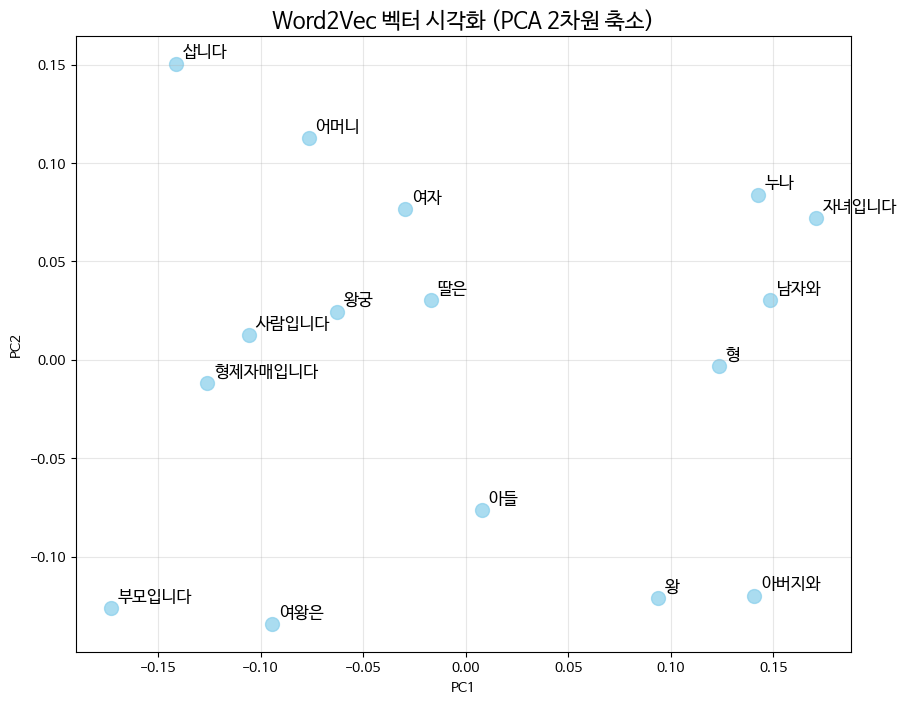


üí° Word2Vec ÌïµÏã¨ ÏõêÎ¶¨:
  ‚úÖ ÎπÑÏä∑Ìïú Îß•ÎùΩÏóêÏÑú ÎÇòÌÉÄÎÇòÎäî Îã®Ïñ¥Îì§ÏùÄ ÎπÑÏä∑Ìïú Î≤°ÌÑ∞Î•º Í∞ÄÏßëÎãàÎã§
  ‚úÖ Î≤°ÌÑ∞ Í∞Ñ Í±∞Î¶¨Í∞Ä Í∞ÄÍπåÏö∞Î©¥ ÏùòÎØ∏Í∞Ä Ïú†ÏÇ¨Ìï©ÎãàÎã§
  ‚úÖ Î≤°ÌÑ∞ Ïó∞ÏÇ∞ÏúºÎ°ú Îã®Ïñ¥ Í¥ÄÍ≥ÑÎ•º ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§

2Ô∏è‚É£ Gensim Word2Vec Ïã§Ïäµ...

üî¨ Gensim Word2Vec Ïã§Ïäµ
‚ùå GensimÏù¥ ÏÑ§ÏπòÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.
ÏÑ§Ïπò: pip install gensim

3Ô∏è‚É£ Ïã§Ï†Ñ ÏùëÏö© ÏòàÏ†ú...

üöÄ Word2Vec Ïã§Ï†Ñ ÏùëÏö©
‚ùå ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Í∞Ä ÏÑ§ÏπòÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.
ÏÑ§Ïπò: pip install gensim scikit-learn

üéâ Word2Vec Í∏∞Î≥∏Í∏∞ ÌïôÏäµ ÏôÑÎ£å!
üí° ÌïµÏã¨ Ìè¨Ïù∏Ìä∏:
   ‚úÖ Skip-gram: Ï§ëÏã¨Îã®Ïñ¥ ‚Üí Ï£ºÎ≥ÄÎã®Ïñ¥ ÏòàÏ∏°
   ‚úÖ CBOW: Ï£ºÎ≥ÄÎã®Ïñ¥ ‚Üí Ï§ëÏã¨Îã®Ïñ¥ ÏòàÏ∏°
   ‚úÖ Î≤°ÌÑ∞ Í≥µÍ∞Ñ: Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Îäî Í∞ÄÍπåÏù¥ ÏúÑÏπò
   ‚úÖ ÏùëÏö©: Î∂ÑÎ•ò, ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ, Ï∂îÏ≤ú ÏãúÏä§ÌÖú


In [ ]:
# Word2Vec Í∞ÑÎã® ÌÖåÏä§Ìä∏
import numpy as np
from collections import Counter, defaultdict
import matplotlib.pyplot as plt


def simple_word2vec_demo():
    """
    Word2Vec Í∏∞Î≥∏ Í∞úÎÖêÏùÑ Î≥¥Ïó¨Ï£ºÎäî Í∞ÑÎã®Ìïú ÏòàÏ†ú
    """
    print("üß† Word2Vec Í∏∞Î≥∏ Í∞úÎÖê Ïù¥Ìï¥ÌïòÍ∏∞")
    print("=" * 50)

    # ÏòàÏ†ú Î¨∏ÏÑúÎì§
    sentences = [
        "ÏôïÍ≥º Ïó¨ÏôïÏùÄ ÏôïÍ∂ÅÏóê ÏÇΩÎãàÎã§",
        "ÎÇ®ÏûêÏôÄ Ïó¨ÏûêÎäî ÏÇ¨ÎûåÏûÖÎãàÎã§",
        "ÏïÑÎ≤ÑÏßÄÏôÄ Ïñ¥Î®∏ÎãàÎäî Î∂ÄÎ™®ÏûÖÎãàÎã§",
        "ÏïÑÎì§Í≥º Îî∏ÏùÄ ÏûêÎÖÄÏûÖÎãàÎã§",
        "ÌòïÍ≥º ÎàÑÎÇòÎäî ÌòïÏ†úÏûêÎß§ÏûÖÎãàÎã§"
    ]

    print("üìÑ Î∂ÑÏÑùÌï† Î¨∏Ïû•Îì§:")
    for i, sentence in enumerate(sentences):
        print(f"  Î¨∏Ïû•{i+1}: {sentence}")

    #-------------------------------------
    # 1Îã®Í≥Ñ: Ïñ¥Ìúò Íµ¨Ï∂ï
    #-------------------------------------
    all_words = set()
    processed_sentences = []

    for sentence in sentences:
        # Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨
        words = sentence.replace('Í≥º', '').replace('Îäî', '').replace('Ïóê', '').split()
        processed_sentences.append(words)
        all_words.update(words)

    vocab = sorted(list(all_words))
    word_to_idx = {word: idx for idx, word in enumerate(vocab)}

    print(f"\nüìö Íµ¨Ï∂ïÎêú Ïñ¥Ìúò ({len(vocab)}Í∞ú):")
    print(f"  {vocab}")

    #-------------------------------------
    # 2Îã®Í≥Ñ: Skip-gram ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    #-------------------------------------
    print(f"\nüéØ Skip-gram ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞: 2):")

    training_pairs = []
    for sentence_words in processed_sentences:
        for i, target_word in enumerate(sentence_words):
            # ÏúàÎèÑÏö∞ Î≤îÏúÑ ÏÑ§Ï†ï
            start = max(0, i - 2)
            end = min(len(sentence_words), i + 3)

            for j in range(start, end):
                if j != i:  # ÌÉÄÍ≤ü Îã®Ïñ¥ Ï†úÏô∏
                    context_word = sentence_words[j]
                    training_pairs.append((target_word, context_word))

    print(f"  Ï¥ù {len(training_pairs)}Í∞úÏùò ÌïôÏäµ Ïåç ÏÉùÏÑ±")
    print("  ÏòàÏãú ÌïôÏäµ ÏåçÎì§:")
    for i, (target, context) in enumerate(training_pairs[:8]):
        print(f"    {target} ‚Üí {context}")
    if len(training_pairs) > 8:
        print(f"    ... Ïô∏ {len(training_pairs)-8}Í∞ú")

    #-------------------------------------
    # 3Îã®Í≥Ñ: Í∞ÑÎã®Ìïú Î≤°ÌÑ∞ Ï¥àÍ∏∞Ìôî Î∞è ÌïôÏäµ ÏãúÎÆ¨Î†àÏù¥ÏÖò
    #-------------------------------------
    print(f"\n‚ö° Î≤°ÌÑ∞ ÌïôÏäµ ÏãúÎÆ¨Î†àÏù¥ÏÖò:")

    vector_size = 4  # Í∞ÑÎã®Ìïú ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ 4Ï∞®Ïõê
    word_vectors = {}

    # ÎûúÎç§ Ï¥àÍ∏∞Ìôî
    np.random.seed(42)  # Ïû¨ÌòÑ Í∞ÄÎä•Ìïú Í≤∞Í≥º
    for word in vocab:
        word_vectors[word] = np.random.normal(0, 0.1, vector_size)

    print("  Ï¥àÍ∏∞ Î≤°ÌÑ∞ (ÏùºÎ∂Ä):")
    for word in vocab[:5]:
        print(f"    {word}: [{', '.join([f'{x:.3f}' for x in word_vectors[word]])}]")

    # Í∞ÑÎã®Ìïú ÌïôÏäµ ÏãúÎÆ¨Î†àÏù¥ÏÖò (Ïã§Ï†ú Ïó≠Ï†ÑÌååÎäî Î≥µÏû°ÌïòÎØÄÎ°ú Í∞úÎÖêÏ†Å ÏÑ§Î™Ö)
    print(f"\nüìà ÌïôÏäµ Í≥ºÏ†ï ÏãúÎÆ¨Î†àÏù¥ÏÖò:")
    print("  (Ïã§Ï†úÎ°úÎäî Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÍ≥º Ïó≠Ï†ÑÌååÎ•º ÌÜµÌï¥ Î≤°ÌÑ∞Í∞Ä ÏóÖÎç∞Ïù¥Ìä∏Îê©ÎãàÎã§)")

    # Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Îì§ÏùÑ Í∞ÄÍπåÏù¥ Î∞∞ÏπòÌïòÎäî ÏãúÎÆ¨Î†àÏù¥ÏÖò
    similar_pairs = [
        ("Ïôï", "Ïó¨Ïôï"), ("ÎÇ®Ïûê", "Ïó¨Ïûê"), ("ÏïÑÎ≤ÑÏßÄ", "Ïñ¥Î®∏Îãà"), ("ÏïÑÎì§", "Îî∏"), ("Ìòï", "ÎàÑÎÇò")
    ]

    for word1, word2 in similar_pairs:
        if word1 in word_vectors and word2 in word_vectors:
            # Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Îì§Ïùò Î≤°ÌÑ∞Î•º Ï†êÏßÑÏ†ÅÏúºÎ°ú Í∞ÄÍπùÍ≤å ÎßåÎì§Í∏∞
            avg_vector = (word_vectors[word1] + word_vectors[word2]) / 2
            word_vectors[word1] = 0.7 * word_vectors[word1] + 0.3 * avg_vector
            word_vectors[word2] = 0.7 * word_vectors[word2] + 0.3 * avg_vector

    print("  ÌïôÏäµ ÌõÑ Î≤°ÌÑ∞ (ÏùºÎ∂Ä):")
    for word in vocab[:5]:
        print(f"    {word}: [{', '.join([f'{x:.3f}' for x in word_vectors[word]])}]")

    #-------------------------------------
    # 4Îã®Í≥Ñ: Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
    #-------------------------------------
    def cosine_similarity(vec1, vec2):
        dot_product = np.dot(vec1, vec2)
        norm1 = np.linalg.norm(vec1)
        norm2 = np.linalg.norm(vec2)
        return dot_product / (norm1 * norm2) if norm1 > 0 and norm2 > 0 else 0

    print(f"\nüîó Îã®Ïñ¥ Í∞Ñ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞:")

    test_pairs = [
        ("Ïôï", "Ïó¨Ïôï"),
        ("ÎÇ®Ïûê", "Ïó¨Ïûê"),
        ("ÏïÑÎ≤ÑÏßÄ", "Ïñ¥Î®∏Îãà"),
        ("Ïôï", "ÎÇ®Ïûê"),
        ("Ïôï", "Îî∏")
    ]

    for word1, word2 in test_pairs:
        if word1 in word_vectors and word2 in word_vectors:
            similarity = cosine_similarity(word_vectors[word1], word_vectors[word2])
            print(f"  {word1} - {word2}: {similarity:.4f}")

    #-------------------------------------
    # 5Îã®Í≥Ñ: ÏãúÍ∞ÅÌôî (2Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜå)
    #-------------------------------------
    from sklearn.decomposition import PCA

    # Î≤°ÌÑ∞Îì§ÏùÑ Î∞∞Ïó¥Î°ú Î≥ÄÌôò
    vectors = np.array([word_vectors[word] for word in vocab])

    # PCAÎ°ú 2Ï∞®Ïõê Ï∂ïÏÜå
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=100, alpha=0.7, c='skyblue')

    # Îã®Ïñ¥ ÎùºÎ≤® Ï∂îÍ∞Ä
    for i, word in enumerate(vocab):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=12)

    plt.title('Word2Vec Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî (PCA 2Ï∞®Ïõê Ï∂ïÏÜå)', fontsize=16)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"\nüí° Word2Vec ÌïµÏã¨ ÏõêÎ¶¨:")
    print("  ‚úÖ ÎπÑÏä∑Ìïú Îß•ÎùΩÏóêÏÑú ÎÇòÌÉÄÎÇòÎäî Îã®Ïñ¥Îì§ÏùÄ ÎπÑÏä∑Ìïú Î≤°ÌÑ∞Î•º Í∞ÄÏßëÎãàÎã§")
    print("  ‚úÖ Î≤°ÌÑ∞ Í∞Ñ Í±∞Î¶¨Í∞Ä Í∞ÄÍπåÏö∞Î©¥ ÏùòÎØ∏Í∞Ä Ïú†ÏÇ¨Ìï©ÎãàÎã§")
    print("  ‚úÖ Î≤°ÌÑ∞ Ïó∞ÏÇ∞ÏúºÎ°ú Îã®Ïñ¥ Í¥ÄÍ≥ÑÎ•º ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§")

    return word_vectors


def gensim_word2vec_example():
    """
    GensimÏùÑ ÏÇ¨Ïö©Ìïú Ïã§Ï†ú Word2Vec ÏòàÏ†ú
    """
    print(f"\n" + "=" * 50)
    print("üî¨ Gensim Word2Vec Ïã§Ïäµ")
    print("=" * 50)

    try:
        from gensim.models import Word2Vec

        # ÌïúÍµ≠Ïñ¥ Î¨∏Ïû•Îì§ (ÌÜ†ÌÅ∞ÌôîÎêú ÌòïÌÉú)
        sentences = [
            ['ÏÇ¨Í≥º', 'Î∞îÎÇòÎÇò', 'Í≥ºÏùº', 'ÎßõÏûàÎã§'],
            ['Îî∏Í∏∞', 'Ìè¨ÎèÑ', 'Í≥ºÏùº', 'Îã¨Îã§'],
            ['Í≥ºÏùº', 'Í±¥Í∞ï', 'Ï¢ãÎã§', 'ÎπÑÌÉÄÎØº'],
            ['Í∞ú', 'Í≥†ÏñëÏù¥', 'ÎèôÎ¨º', 'Í∑ÄÏóΩÎã§'],
            ['ÌÜ†ÎÅº', 'ÌñÑÏä§ÌÑ∞', 'ÎèôÎ¨º', 'ÏûëÎã§'],
            ['ÎèôÎ¨º', 'ÏÉùÎ™Ö', 'ÏÜåÏ§ëÌïòÎã§', 'Î≥¥Ìò∏'],
            ['ÏûêÎèôÏ∞®', 'Í∏∞Ï∞®', 'ÍµêÌÜµÏàòÎã®', 'Îπ†Î•¥Îã§'],
            ['Î≤ÑÏä§', 'ÏßÄÌïòÏ≤†', 'ÍµêÌÜµÏàòÎã®', 'Ìé∏Î¶¨ÌïòÎã§'],
            ['ÍµêÌÜµÏàòÎã®', 'Ïù¥Îèô', 'ÌïÑÏöîÌïòÎã§', 'Ï§ëÏöî'],
            ['Ïª¥Ìì®ÌÑ∞', 'Ïä§ÎßàÌä∏Ìè∞', 'Ï†ÑÏûêÍ∏∞Í∏∞', 'Ïú†Ïö©ÌïòÎã§'],
            ['ÌÉúÎ∏îÎ¶ø', 'ÎÖ∏Ìä∏Î∂Å', 'Ï†ÑÏûêÍ∏∞Í∏∞', 'Ìé∏Î¶¨ÌïòÎã§'],
            ['Ï†ÑÏûêÍ∏∞Í∏∞', 'Í∏∞Ïà†', 'Î∞úÏ†Ñ', 'ÎÜÄÎûçÎã§']
        ]

        print("üìö ÌïôÏäµ Îç∞Ïù¥ÌÑ∞:")
        for i, sentence in enumerate(sentences[:5]):
            print(f"  Î¨∏Ïû•{i+1}: {' '.join(sentence)}")
        print(f"  ... Ï¥ù {len(sentences)}Í∞ú Î¨∏Ïû•")

        # Word2Vec Î™®Îç∏ ÌïôÏäµ
        model = Word2Vec(
            sentences=sentences,
            vector_size=50,      # Î≤°ÌÑ∞ Ï∞®Ïõê
            window=3,           # ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞
            min_count=1,        # ÏµúÏÜå ÎπàÎèÑ
            workers=1,          # Î≥ëÎ†¨ Ï≤òÎ¶¨ Ïàò
            sg=1,              # Skip-gram (0Ïù¥Î©¥ CBOW)
            epochs=100
        )

        print(f"\n‚úÖ Word2Vec Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!")
        print(f"   Ïñ¥Ìúò ÌÅ¨Í∏∞: {len(model.wv.key_to_index)}")
        print(f"   Î≤°ÌÑ∞ Ï∞®Ïõê: {model.wv.vector_size}")

        # 1. Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ Ï∞æÍ∏∞
        print(f"\nüîç Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ Ï∞æÍ∏∞:")
        test_words = ['Í≥ºÏùº', 'ÎèôÎ¨º', 'ÍµêÌÜµÏàòÎã®', 'Ï†ÑÏûêÍ∏∞Í∏∞']

        for word in test_words:
            if word in model.wv:
                try:
                    similar_words = model.wv.most_similar(word, topn=3)
                    print(f"  '{word}' Ïú†ÏÇ¨ Îã®Ïñ¥: {similar_words}")
                except:
                    print(f"  '{word}': Ïú†ÏÇ¨ Îã®Ïñ¥ Í≥ÑÏÇ∞ Ïã§Ìå®")

        # 2. Îã®Ïñ¥ Í∞Ñ Ïú†ÏÇ¨ÎèÑ
        print(f"\nüéØ Îã®Ïñ¥ Í∞Ñ Ïú†ÏÇ¨ÎèÑ:")
        word_pairs = [
            ('ÏÇ¨Í≥º', 'Î∞îÎÇòÎÇò'),      # Í∞ôÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨
            ('Í∞ú', 'Í≥†ÏñëÏù¥'),        # Í∞ôÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨
            ('ÏûêÎèôÏ∞®', 'Ïª¥Ìì®ÌÑ∞'),    # Îã§Î•∏ Ïπ¥ÌÖåÍ≥†Î¶¨
            ('Í≥ºÏùº', 'ÎèôÎ¨º')         # Îã§Î•∏ Ïπ¥ÌÖåÍ≥†Î¶¨
        ]

        for word1, word2 in word_pairs:
            if word1 in model.wv and word2 in model.wv:
                similarity = model.wv.similarity(word1, word2)
                print(f"  {word1} - {word2}: {similarity:.4f}")

        # 3. Îã®Ïñ¥ Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî
        print(f"\nüìä Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî:")

        # Ï£ºÏöî Îã®Ïñ¥Îì§Ïùò Î≤°ÌÑ∞ Ï∂îÏ∂ú
        words_to_plot = ['Í≥ºÏùº', 'ÏÇ¨Í≥º', 'Î∞îÎÇòÎÇò', 'ÎèôÎ¨º', 'Í∞ú', 'Í≥†ÏñëÏù¥',
                        'ÍµêÌÜµÏàòÎã®', 'ÏûêÎèôÏ∞®', 'Ï†ÑÏûêÍ∏∞Í∏∞', 'Ïª¥Ìì®ÌÑ∞']

        vectors = []
        labels = []

        for word in words_to_plot:
            if word in model.wv:
                vectors.append(model.wv[word])
                labels.append(word)

        # PCAÎ°ú 2Ï∞®Ïõê Ï∂ïÏÜå
        from sklearn.decomposition import PCA

        vectors = np.array(vectors)
        pca = PCA(n_components=2)
        vectors_2d = pca.fit_transform(vectors)

        # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅ
        categories = {
            'Í≥ºÏùº': ['Í≥ºÏùº', 'ÏÇ¨Í≥º', 'Î∞îÎÇòÎÇò'],
            'ÎèôÎ¨º': ['ÎèôÎ¨º', 'Í∞ú', 'Í≥†ÏñëÏù¥'],
            'ÍµêÌÜµÏàòÎã®': ['ÍµêÌÜµÏàòÎã®', 'ÏûêÎèôÏ∞®'],
            'Ï†ÑÏûêÍ∏∞Í∏∞': ['Ï†ÑÏûêÍ∏∞Í∏∞', 'Ïª¥Ìì®ÌÑ∞']
        }

        colors = {'Í≥ºÏùº': 'red', 'ÎèôÎ¨º': 'blue', 'ÍµêÌÜµÏàòÎã®': 'green', 'Ï†ÑÏûêÍ∏∞Í∏∞': 'orange'}

        plt.figure(figsize=(12, 8))

        for category, words_in_cat in categories.items():
            indices = [i for i, word in enumerate(labels) if word in words_in_cat]
            if indices:
                plt.scatter(vectors_2d[indices, 0], vectors_2d[indices, 1],
                           c=colors[category], label=category, s=100, alpha=0.7)

        # Îã®Ïñ¥ ÎùºÎ≤® Ï∂îÍ∞Ä
        for i, word in enumerate(labels):
            plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]),
                        xytext=(5, 5), textcoords='offset points', fontsize=10)

        plt.title('Gensim Word2Vec Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî', fontsize=16)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        print("‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å! Í∞ôÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Îã®Ïñ¥Îì§Ïù¥ Í∞ÄÍπåÏù¥ Î™®Ïó¨ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")

        return model

    except ImportError:
        print("‚ùå GensimÏù¥ ÏÑ§ÏπòÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
        print("ÏÑ§Ïπò: pip install gensim")
        return None


def word2vec_applications_demo():
    """
    Word2Vec Ïã§Ï†Ñ ÏùëÏö© ÏòàÏ†ú
    """
    print(f"\n" + "=" * 50)
    print("üöÄ Word2Vec Ïã§Ï†Ñ ÏùëÏö©")
    print("=" * 50)

    try:
        from gensim.models import Word2Vec
        from sklearn.cluster import KMeans

        # Îçî ÌÅ∞ Îç∞Ïù¥ÌÑ∞ÏÖã
        extended_sentences = [
            # ÏùåÏãù Í¥ÄÎ†®
            ['ÌïúÏãù', 'ÍπÄÏπò', 'ÎêúÏû•Ï∞åÍ∞ú', 'ÎßõÏûàÎã§', 'Ï†ÑÌÜµ', 'ÏùåÏãù'],
            ['Ï§ëÏãù', 'ÏßúÏû•Î©¥', 'ÌÉïÏàòÏú°', 'ÎßõÏûàÎã§', 'Ï§ëÍµ≠', 'ÏùåÏãù'],
            ['ÏùºÏãù', 'Ï¥àÎ∞•', 'ÎùºÎ©ò', 'Ïã†ÏÑ†ÌïòÎã§', 'ÏùºÎ≥∏', 'ÏùåÏãù'],
            ['ÏñëÏãù', 'ÌååÏä§ÌÉÄ', 'ÌîºÏûê', 'ÎßõÏûàÎã§', 'ÏÑúÏñë', 'ÏùåÏãù'],
            ['ÏùåÏãù', 'ÏöîÎ¶¨', 'Îßõ', 'Í±¥Í∞ï', 'ÏòÅÏñë', 'Ï§ëÏöî'],

            # Ïä§Ìè¨Ï∏† Í¥ÄÎ†®
            ['Ï∂ïÍµ¨', 'ÏõîÎìúÏªµ', 'ÏÑ†Ïàò', 'Í≤ΩÍ∏∞', 'Í≥®', 'ÏäπÎ∂Ä'],
            ['ÏïºÍµ¨', 'ÌôàÎü∞', 'Ìà¨Ïàò', 'ÌÉÄÏûê', 'Í≤ΩÍ∏∞Ïû•', 'ÏùëÏõê'],
            ['ÎÜçÍµ¨', 'Îç©ÌÅ¨Ïäõ', 'ÏÑ†Ïàò', 'ÏΩîÌä∏', 'ÌåÄÏõåÌÅ¨', 'Ï†ÑÎûµ'],
            ['ÌÖåÎãàÏä§', 'ÎùºÏºì', 'ÏÑ†Ïàò', 'ÏΩîÌä∏', 'ÏÑúÎ∏å', 'Í≤ΩÍ∏∞'],
            ['Ïä§Ìè¨Ï∏†', 'Ïö¥Îèô', 'Í±¥Í∞ï', 'Ï≤¥Î†•', 'ÌåÄÏõåÌÅ¨', 'Ï§ëÏöî'],

            # Í∏∞Ïà† Í¥ÄÎ†®
            ['Ïª¥Ìì®ÌÑ∞', 'ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç', 'ÏÜåÌîÑÌä∏Ïõ®Ïñ¥', 'Í∞úÎ∞ú', 'Í∏∞Ïà†', 'ÌòÅÏã†'],
            ['Ïä§ÎßàÌä∏Ìè∞', 'Ïï±', 'Î™®Î∞îÏùº', 'Ìé∏Î¶¨', 'ÌÜµÏã†', 'Í∏∞Ïà†'],
            ['Ïù∏ÌÑ∞ÎÑ∑', 'ÏõπÏÇ¨Ïù¥Ìä∏', 'Ï†ïÎ≥¥', 'Í≤ÄÏÉâ', 'Ïó∞Í≤∞', 'ÎÑ§Ìä∏ÏõåÌÅ¨'],
            ['Ïù∏Í≥µÏßÄÎä•', 'Î®∏Ïã†Îü¨Îãù', 'Îç∞Ïù¥ÌÑ∞', 'ÌïôÏäµ', 'ÎØ∏Îûò', 'Í∏∞Ïà†'],
            ['Í∏∞Ïà†', 'Î∞úÏ†Ñ', 'ÌòÅÏã†', 'ÎØ∏Îûò', 'ÏÇ¨Ìöå', 'Î≥ÄÌôî']
        ]

        print(f"üìö ÌôïÏû• Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌïôÏäµ (Ï¥ù {len(extended_sentences)}Í∞ú Î¨∏Ïû•)")

        # Î™®Îç∏ ÌïôÏäµ
        app_model = Word2Vec(
            sentences=extended_sentences,
            vector_size=100,
            window=4,
            min_count=1,
            workers=1,
            sg=1,
            epochs=200
        )

        print("‚úÖ ÌôïÏû• Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!")

        # 1. Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò
        print(f"\nüìÇ ÏûêÎèô Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò:")

        # Ï£ºÏöî Îã®Ïñ¥Îì§Ïùò Î≤°ÌÑ∞ Ï∂îÏ∂ú
        food_words = ['ÌïúÏãù', 'Ï§ëÏãù', 'ÏùºÏãù', 'ÏñëÏãù', 'ÍπÄÏπò', 'ÏßúÏû•Î©¥', 'Ï¥àÎ∞•', 'ÌååÏä§ÌÉÄ']
        sports_words = ['Ï∂ïÍµ¨', 'ÏïºÍµ¨', 'ÎÜçÍµ¨', 'ÌÖåÎãàÏä§', 'ÏÑ†Ïàò', 'Í≤ΩÍ∏∞', 'Í≥®', 'ÌôàÎü∞']
        tech_words = ['Ïª¥Ìì®ÌÑ∞', 'Ïä§ÎßàÌä∏Ìè∞', 'Ïù∏ÌÑ∞ÎÑ∑', 'Ïù∏Í≥µÏßÄÎä•', 'ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç', 'Ïï±']

        all_words = food_words + sports_words + tech_words
        vectors = []
        labels = []
        categories = []

        for word in all_words:
            if word in app_model.wv:
                vectors.append(app_model.wv[word])
                labels.append(word)
                if word in food_words:
                    categories.append('ÏùåÏãù')
                elif word in sports_words:
                    categories.append('Ïä§Ìè¨Ï∏†')
                else:
                    categories.append('Í∏∞Ïà†')

        # K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
        vectors = np.array(vectors)
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(vectors)

        print("  ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º:")
        cluster_words = defaultdict(list)
        for word, cluster, true_cat in zip(labels, clusters, categories):
            cluster_words[cluster].append(f"{word}({true_cat})")

        for cluster_id, words in cluster_words.items():
            print(f"    ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}: {words}")

        # 2. Î¨∏ÏÑú Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
        print(f"\nüìÑ Î¨∏ÏÑú Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞:")

        test_documents = [
            "ÌïúÏãù ÍπÄÏπò ÎêúÏû•Ï∞åÍ∞ú ÎßõÏûàÎã§",
            "Ï∂ïÍµ¨ ÏÑ†Ïàò ÏõîÎìúÏªµ Í≤ΩÍ∏∞",
            "Ïª¥Ìì®ÌÑ∞ ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÏÜåÌîÑÌä∏Ïõ®Ïñ¥",
            "Ï§ëÏãù ÏßúÏû•Î©¥ ÎßõÏûàÎã§"
        ]

        def document_vector(doc, model):
            """Î¨∏ÏÑúÎ•º Î≤°ÌÑ∞Î°ú Î≥ÄÌôò (Îã®Ïñ¥ Î≤°ÌÑ∞Îì§Ïùò ÌèâÍ∑†)"""
            words = doc.split()
            vectors = []
            for word in words:
                if word in model.wv:
                    vectors.append(model.wv[word])

            if vectors:
                return np.mean(vectors, axis=0)
            else:
                return np.zeros(model.wv.vector_size)

        doc_vectors = [document_vector(doc, app_model) for doc in test_documents]

        # Î¨∏ÏÑú Í∞Ñ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
        from sklearn.metrics.pairwise import cosine_similarity
        doc_similarity = cosine_similarity(doc_vectors)

        print("  Î¨∏ÏÑú Í∞Ñ Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§:")
        for i, doc in enumerate(test_documents):
            print(f"  Î¨∏ÏÑú{i+1}: {doc}")

        print(f"\n  Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§:")
        for i in range(len(test_documents)):
            for j in range(len(test_documents)):
                print(f"  {doc_similarity[i][j]:.3f}", end="")
            print()

        # 3. ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(15, 5))

        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
        plt.subplot(1, 3, 1)

        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        vectors_2d = pca.fit_transform(vectors)

        colors = ['red', 'blue', 'green']
        for i, cluster in enumerate(set(clusters)):
            indices = [j for j, c in enumerate(clusters) if c == cluster]
            plt.scatter(vectors_2d[indices, 0], vectors_2d[indices, 1],
                       c=colors[i], label=f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster}', s=100, alpha=0.7)

        plt.title('Word2Vec ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅ
        plt.subplot(1, 3, 2)

        category_colors = {'ÏùåÏãù': 'red', 'Ïä§Ìè¨Ï∏†': 'blue', 'Í∏∞Ïà†': 'green'}
        for category in category_colors.keys():
            indices = [i for i, cat in enumerate(categories) if cat == category]
            if indices:
                plt.scatter(vectors_2d[indices, 0], vectors_2d[indices, 1],
                           c=category_colors[category], label=category, s=100, alpha=0.7)

        plt.title('Ïã§Ï†ú Ïπ¥ÌÖåÍ≥†Î¶¨', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Î¨∏ÏÑú Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ
        plt.subplot(1, 3, 3)
        import seaborn as sns

        sns.heatmap(doc_similarity, annot=True, fmt='.2f', cmap='Blues',
                    xticklabels=[f'Î¨∏ÏÑú{i+1}' for i in range(len(test_documents))],
                    yticklabels=[f'Î¨∏ÏÑú{i+1}' for i in range(len(test_documents))])
        plt.title('Î¨∏ÏÑú Ïú†ÏÇ¨ÎèÑ', fontsize=12)

        plt.tight_layout()
        plt.show()

        return app_model

    except ImportError:
        print("‚ùå ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Í∞Ä ÏÑ§ÏπòÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
        print("ÏÑ§Ïπò: pip install gensim scikit-learn")
        return None


# Ï†ÑÏ≤¥ Ïã§Ìñâ Ìï®Ïàò
def run_simple_word2vec_tests():
    """
    Í∞ÑÎã®Ìïú Word2Vec ÌÖåÏä§Ìä∏Îì§ Ïã§Ìñâ
    """
    try:
        print("üß† Word2Vec ÎßàÏä§ÌÑ∞ÌïòÍ∏∞!")
        print("=" * 60)

        # 1. Í∏∞Î≥∏ Í∞úÎÖê Ïù¥Ìï¥
        print("1Ô∏è‚É£ Í∏∞Î≥∏ Í∞úÎÖê ÏãúÏó∞...")
        word_vectors = simple_word2vec_demo()

        # 2. Gensim Ïã§Ïäµ
        print("\n2Ô∏è‚É£ Gensim Word2Vec Ïã§Ïäµ...")
        gensim_model = gensim_word2vec_example()

        # 3. Ïã§Ï†Ñ ÏùëÏö©
        print("\n3Ô∏è‚É£ Ïã§Ï†Ñ ÏùëÏö© ÏòàÏ†ú...")
        app_model = word2vec_applications_demo()

        print(f"\n" + "=" * 60)
        print("üéâ Word2Vec Í∏∞Î≥∏Í∏∞ ÌïôÏäµ ÏôÑÎ£å!")
        print("üí° ÌïµÏã¨ Ìè¨Ïù∏Ìä∏:")
        print("   ‚úÖ Skip-gram: Ï§ëÏã¨Îã®Ïñ¥ ‚Üí Ï£ºÎ≥ÄÎã®Ïñ¥ ÏòàÏ∏°")
        print("   ‚úÖ CBOW: Ï£ºÎ≥ÄÎã®Ïñ¥ ‚Üí Ï§ëÏã¨Îã®Ïñ¥ ÏòàÏ∏°")
        print("   ‚úÖ Î≤°ÌÑ∞ Í≥µÍ∞Ñ: Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Îäî Í∞ÄÍπåÏù¥ ÏúÑÏπò")
        print("   ‚úÖ ÏùëÏö©: Î∂ÑÎ•ò, ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ, Ï∂îÏ≤ú ÏãúÏä§ÌÖú")
        print("=" * 60)

    except Exception as e:
        print(f"‚ùå Ïò§Î•ò Î∞úÏÉù: {e}")
        print("‚ö†Ô∏è ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò ÌïÑÏöî:")
        print("   pip install gensim scikit-learn matplotlib seaborn")


# Ïã§Ìñâ
if __name__ == "__main__":
    run_simple_word2vec_tests()

- t-SNE (t-distributed Stochastic Neighbor Embedding)
    - Í≥†Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Ïùò Ïú†ÏÇ¨ÏÑ±ÏùÑ Ï†ÄÏ∞®Ïõê(2D/3D) Í≥µÍ∞ÑÏóê Î≥¥Ï°¥ÌïòÏó¨ ÏãúÍ∞ÅÌôîÌïòÎäî ÎπÑÏÑ†Ìòï Ï∞®Ïõê Ï∂ïÏÜå Í∏∞Î≤ï

In [ ]:
# ---------------------------------------------------------------------
# 6) t-SNEÎ°ú Îã®Ïñ¥ Î≤°ÌÑ∞ 2D ÏãúÍ∞ÅÌôî
# ---------------------------------------------------------------------

# ÎπàÎèÑÍ∞Ä 2Ìöå Ïù¥ÏÉÅÏù∏ Îã®Ïñ¥Îßå ÏãúÍ∞ÅÌôî (Ïû°Ïùå Ï†úÍ±∞)
freq = Counter([w for sent in corpus for w in sent])
vocab_tsne = [w for w,c in freq.items() if c >= 2 and w in w2v_sg.wv]

if len(vocab_tsne) >= 10:
    X = np.vstack([w2v_sg.wv[w] for w in vocab_tsne])
    tsne = TSNE(n_components=2, perplexity=min(30, max(5, len(vocab_tsne)//3)), random_state=42, n_iter=1000)
    X2 = tsne.fit_transform(X)

    plt.figure(figsize=(9,7))
    # plt.rcParams["font.family"] = 'NanumBarunGothic'
    plt.scatter(X2[:,0], X2[:,1])
    for i, w in enumerate(vocab_tsne):
        plt.annotate(w, (X2[i,0], X2[i,1]), fontsize=9, alpha=0.9)
    plt.title('t-SNE visualization of Word2Vec (Skip-gram)')
    plt.tight_layout()
    plt.show()
else:
    print("Îã®Ïñ¥ ÏàòÍ∞Ä Ï†ÅÏñ¥ t-SNE ÏãúÍ∞ÅÌôîÎ•º ÏÉùÎûµÌï©ÎãàÎã§. (ÎπàÎèÑ‚â•2 Îã®Ïñ¥Í∞Ä 10Í∞ú ÎØ∏Îßå)")

# Îã§ÏùåÏùÑ ÏãúÎèÑÌï¥Î≥¥ÏÑ∏Ïöî
# - sg=0(CBOW) Î™®Îç∏Î°ú ÎèôÏùºÌïú Î∂ÑÏÑù ÎπÑÍµê
# - window, vector_size, epochs Î≥ÄÍ≤ΩÌï¥ ÏÑ±Îä• ÎπÑÍµê
# - ÎèÑÎ©îÏù∏Î≥Ñ(Í∏∞Ïà†/ÎπÑÏ¶àÎãàÏä§/Í±¥Í∞ï) ÎßêÎ≠âÏπòÎ°ú Îî∞Î°ú ÌïôÏäµÌï¥ Íµ∞Ïßë Ï∞®Ïù¥ Í¥ÄÏ∞∞

NameError: name 'corpus' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
import math
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Í∞ïÌôî
import matplotlib.font_manager as fm

def ensure_korean_font():
    """ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÌôïÏù∏ Î∞è Ïû¨ÏÑ§Ï†ï"""
    try:
        plt.rcParams['font.family'] = 'NanumBarunGothic'
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic'
        except:
            plt.rcParams['font.family'] = 'DejaVu Sans'

    plt.rcParams['axes.unicode_minus'] = False

    # ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÌïúÍ∏Ä Ìè∞Ìä∏ Ï∞æÍ∏∞
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    korean_fonts = [f for f in available_fonts if any(keyword in f for keyword in
                   ['Nanum', 'Malgun', 'Dotum', 'Gulim', 'Batang', 'Gungsuh'])]

    if korean_fonts:
        plt.rcParams['font.family'] = korean_fonts[0]

# Ï¥àÍ∏∞ Ìè∞Ìä∏ ÏÑ§Ï†ï
ensure_korean_font()

class Word2VecImplementation:
    def __init__(self, vector_size=100, window_size=3, min_count=1,
                 epochs=100, learning_rate=0.025, model_type='skipgram'):
        """
        Word2Vec Íµ¨ÌòÑ ÌÅ¥ÎûòÏä§

        Args:
            vector_size: Î≤°ÌÑ∞ Ï∞®Ïõê Ïàò
            window_size: Ïª®ÌÖçÏä§Ìä∏ ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞
            min_count: ÏµúÏÜå Îã®Ïñ¥ ÎπàÎèÑ
            epochs: ÌïôÏäµ ÏóêÌè¨ÌÅ¨ Ïàò
            learning_rate: ÌïôÏäµÎ•†
            model_type: 'skipgram' ÎòêÎäî 'cbow'
        """
        self.vector_size = vector_size
        self.window_size = window_size
        self.min_count = min_count
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.model_type = model_type

        self.vocab = {}
        self.word_to_idx = {}
        self.idx_to_word = {}
        self.word_vectors = None
        self.context_vectors = None
        self.vocab_size = 0

    def preprocess_text(self, text):
        """ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨"""
        # ÌïúÍ∏ÄÍ≥º ÏòÅÎ¨∏, Ïà´ÏûêÎßå Ïú†ÏßÄ
        text = re.sub(r'[^\w\sÍ∞Ä-Ìû£]', '', text.lower())
        return [word for word in text.split() if word.strip()]

    def build_vocabulary(self, sentences):
        """Ïñ¥Ìúò Íµ¨Ï∂ï"""
        word_counts = Counter()

        # Î™®Îì† Î¨∏Ïû•ÏóêÏÑú Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
        for sentence in sentences:
            words = self.preprocess_text(sentence)
            word_counts.update(words)

        # ÏµúÏÜå ÎπàÎèÑ ÌïÑÌÑ∞ÎßÅ
        filtered_words = {word: count for word, count in word_counts.items()
                         if count >= self.min_count}

        # Ïñ¥Ìúò Îß§Ìïë ÏÉùÏÑ±
        self.vocab = filtered_words
        self.word_to_idx = {word: idx for idx, word in enumerate(filtered_words.keys())}
        self.idx_to_word = {idx: word for word, idx in self.word_to_idx.items()}
        self.vocab_size = len(self.vocab)

        print(f"Íµ¨Ï∂ïÎêú Ïñ¥Ìúò ÌÅ¨Í∏∞: {self.vocab_size}")
        return filtered_words

    def generate_training_data(self, sentences):
        """ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±"""
        training_data = []

        for sentence in sentences:
            words = self.preprocess_text(sentence)
            words = [w for w in words if w in self.word_to_idx]

            for i, target_word in enumerate(words):
                # Ïª®ÌÖçÏä§Ìä∏ ÏúàÎèÑÏö∞ ÎÇ¥Ïùò Îã®Ïñ¥Îì§
                start = max(0, i - self.window_size)
                end = min(len(words), i + self.window_size + 1)

                context_words = []
                for j in range(start, end):
                    if j != i:  # ÌÉÄÍ≤ü Îã®Ïñ¥ Ï†úÏô∏
                        context_words.append(words[j])

                if len(context_words) >= 1:
                    if self.model_type == 'skipgram':
                        # Skip-gram: Ï§ëÏã¨ Îã®Ïñ¥ ‚Üí Ï£ºÎ≥Ä Îã®Ïñ¥Îì§
                        for context_word in context_words:
                            training_data.append((target_word, context_word))
                    else:  # CBOW
                        # CBOW: Ï£ºÎ≥Ä Îã®Ïñ¥Îì§ ‚Üí Ï§ëÏã¨ Îã®Ïñ¥
                        training_data.append((context_words, target_word))

        return training_data

    def sigmoid(self, x):
        """ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò"""
        x = np.clip(x, -500, 500)  # Ïò§Î≤ÑÌîåÎ°úÏö∞ Î∞©ÏßÄ
        return 1 / (1 + np.exp(-x))

    def train(self, sentences):
        """Î™®Îç∏ ÌïôÏäµ"""
        print(f"{self.model_type.upper()} Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...")

        # Ïñ¥Ìúò Íµ¨Ï∂ï
        self.build_vocabulary(sentences)

        if self.vocab_size < 2:
            print("Ïñ¥ÌúòÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÏäµÎãàÎã§.")
            return

        # Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî
        self.word_vectors = np.random.uniform(-0.5, 0.5,
                                            (self.vocab_size, self.vector_size))
        self.context_vectors = np.random.uniform(-0.5, 0.5,
                                               (self.vocab_size, self.vector_size))

        # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
        training_data = self.generate_training_data(sentences)
        print(f"ÌïôÏäµ ÏÉòÌîå Ïàò: {len(training_data)}")

        if not training_data:
            print("ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
            return

        # ÌïôÏäµ Î£®ÌîÑ
        for epoch in range(self.epochs):
            total_loss = 0

            for sample in training_data:
                if self.model_type == 'skipgram':
                    loss = self._train_skipgram(sample)
                else:
                    loss = self._train_cbow(sample)
                total_loss += loss

            if epoch % 20 == 0:
                avg_loss = total_loss / len(training_data)
                print(f"Epoch {epoch}, Average Loss: {avg_loss:.4f}")

        print("ÌïôÏäµ ÏôÑÎ£å!")

    def _train_skipgram(self, sample):
        """Skip-gram ÌïôÏäµ"""
        target_word, context_word = sample

        if target_word not in self.word_to_idx or context_word not in self.word_to_idx:
            return 0

        target_idx = self.word_to_idx[target_word]
        context_idx = self.word_to_idx[context_word]

        # Forward pass
        target_vector = self.word_vectors[target_idx]
        context_vector = self.context_vectors[context_idx]

        # ÎÇ¥Ï†Å Í≥ÑÏÇ∞
        score = np.dot(target_vector, context_vector)
        pred = self.sigmoid(score)

        # Loss Í≥ÑÏÇ∞ (Ïù¥ÏßÑ Î∂ÑÎ•ò)
        loss = -np.log(pred + 1e-10)

        # Backward pass
        error = pred - 1  # Ï†ïÎãµÏù¥ 1Ïù¥ÎØÄÎ°ú

        # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ Î∞è ÏóÖÎç∞Ïù¥Ìä∏
        word_grad = error * context_vector
        context_grad = error * target_vector

        self.word_vectors[target_idx] -= self.learning_rate * word_grad
        self.context_vectors[context_idx] -= self.learning_rate * context_grad

        return loss

    def _train_cbow(self, sample):
        """CBOW ÌïôÏäµ"""
        context_words, target_word = sample

        if target_word not in self.word_to_idx:
            return 0

        # Ïª®ÌÖçÏä§Ìä∏ Î≤°ÌÑ∞Îì§Ïùò ÌèâÍ∑†
        context_indices = [self.word_to_idx[w] for w in context_words
                          if w in self.word_to_idx]

        if not context_indices:
            return 0

        context_vector = np.mean([self.context_vectors[idx] for idx in context_indices], axis=0)
        target_idx = self.word_to_idx[target_word]

        # Forward pass
        scores = np.dot(self.word_vectors, context_vector)
        scores = scores - np.max(scores)  # ÏàòÏπò ÏïàÏ†ïÏÑ±

        # Softmax
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores)

        # Loss Í≥ÑÏÇ∞
        loss = -np.log(probs[target_idx] + 1e-10)

        # Backward pass
        grad_output = probs.copy()
        grad_output[target_idx] -= 1.0

        # Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏
        word_grad = np.outer(grad_output, context_vector)
        self.word_vectors -= self.learning_rate * word_grad

        context_grad = np.dot(grad_output, self.word_vectors)
        for idx in context_indices:
            self.context_vectors[idx] -= self.learning_rate * context_grad / len(context_indices)

        return loss

    def get_vector(self, word):
        """Îã®Ïñ¥ Î≤°ÌÑ∞ Î∞òÌôò"""
        if word in self.word_to_idx:
            idx = self.word_to_idx[word]
            return self.word_vectors[idx]
        return None

    def similarity(self, word1, word2):
        """Îëê Îã®Ïñ¥ Í∞Ñ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ"""
        vec1 = self.get_vector(word1)
        vec2 = self.get_vector(word2)

        if vec1 is None or vec2 is None:
            return 0.0

        # ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ
        norm1 = np.linalg.norm(vec1)
        norm2 = np.linalg.norm(vec2)

        if norm1 == 0 or norm2 == 0:
            return 0.0

        return np.dot(vec1, vec2) / (norm1 * norm2)

    def most_similar(self, word, top_k=5):
        """Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Îì§ Ï∞æÍ∏∞"""
        if word not in self.word_to_idx:
            return []

        target_vector = self.get_vector(word)
        similarities = []

        for other_word in self.word_to_idx.keys():
            if other_word != word:
                sim = self.similarity(word, other_word)
                similarities.append((other_word, sim))

        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:top_k]

    def analogy(self, word_a, word_b, word_c, top_k=1):
        """Îã®Ïñ¥ Ïú†Ï∂î: A is to B as C is to ?"""
        try:
            vec_a = self.get_vector(word_a)
            vec_b = self.get_vector(word_b)
            vec_c = self.get_vector(word_c)

            if any(v is None for v in [vec_a, vec_b, vec_c]):
                return []

            # Î≤°ÌÑ∞ Ïó∞ÏÇ∞: B - A + C
            result_vector = vec_b - vec_a + vec_c

            # Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ Ï∞æÍ∏∞
            similarities = []
            for word in self.word_to_idx.keys():
                if word not in [word_a, word_b, word_c]:
                    word_vec = self.get_vector(word)
                    if word_vec is not None:
                        sim = cosine_similarity([result_vector], [word_vec])[0][0]
                        similarities.append((word, sim))

            similarities.sort(key=lambda x: x[1], reverse=True)
            return similarities[:top_k]

        except:
            return []


def demonstrate_basic_word2vec():
    """Í∏∞Î≥∏ Word2Vec Íµ¨ÌòÑ ÏãúÏó∞"""
    print("=" * 60)
    print("1. Í∏∞Î≥∏ Word2Vec Íµ¨ÌòÑ ÏãúÏó∞")
    print("=" * 60)

    # ÏòàÏ†ú Î¨∏ÏÑúÎì§ (Îçî ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏû•)
    sentences = [
        "ÏôïÏùÄ ÏôïÍ∂ÅÏóêÏÑú ÏÉùÌôúÌï©ÎãàÎã§",
        "Ïó¨ÏôïÏùÄ ÏôïÍ∂ÅÏóêÏÑú ÏÉùÌôúÌï©ÎãàÎã§",
        "ÎÇ®ÏûêÎäî ÎÇ®ÏÑ±Ïù¥ÎùºÍ≥†ÎèÑ Î∂ÄÎ¶ÖÎãàÎã§",
        "Ïó¨ÏûêÎäî Ïó¨ÏÑ±Ïù¥ÎùºÍ≥†ÎèÑ Î∂ÄÎ¶ÖÎãàÎã§",
        "ÏôïÍ≥º Ïó¨ÏôïÏùÄ ÏôïÏã§ Í∞ÄÏ°±ÏûÖÎãàÎã§",
        "ÎÇ®ÏûêÏôÄ Ïó¨ÏûêÎäî ÏÇ¨ÎûåÏûÖÎãàÎã§",
        "ÏïÑÎ≤ÑÏßÄÎäî Í∞ÄÏ°±Ïùò Í∞ÄÏû•ÏûÖÎãàÎã§",
        "Ïñ¥Î®∏ÎãàÎäî Í∞ÄÏ°±ÏùÑ ÎèåÎ¥ÖÎãàÎã§",
        "ÏïÑÎì§ÏùÄ ÏïÑÎ≤ÑÏßÄÏùò ÏûêÎÖÄÏûÖÎãàÎã§",
        "Îî∏ÏùÄ Ïñ¥Î®∏ÎãàÏùò ÏûêÎÖÄÏûÖÎãàÎã§",
        "Ïª¥Ìì®ÌÑ∞Îäî Ï†ÑÏûê Í∏∞Í∏∞ÏûÖÎãàÎã§",
        "ÎÖ∏Ìä∏Î∂ÅÏùÄ Ìú¥ÎåÄÏö© Ïª¥Ìì®ÌÑ∞ÏûÖÎãàÎã§",
        "Ïä§ÎßàÌä∏Ìè∞ÏùÄ Ìú¥ÎåÄÏö© Ï†ÑÌôîÍ∏∞ÏûÖÎãàÎã§",
        "ÌÉúÎ∏îÎ¶øÏùÄ Ìú¥ÎåÄÏö© Í∏∞Í∏∞ÏûÖÎãàÎã§",
        "Ïù∏Í≥µÏßÄÎä•ÏùÄ Ïª¥Ìì®ÌÑ∞ Í∏∞Ïà†ÏûÖÎãàÎã§",
        "Î®∏Ïã†Îü¨ÎãùÏùÄ Ïù∏Í≥µÏßÄÎä• Î∂ÑÏïºÏûÖÎãàÎã§",
        "Îî•Îü¨ÎãùÏùÄ Î®∏Ïã†Îü¨Îãù Î∞©Î≤ïÏûÖÎãàÎã§",
        "Îç∞Ïù¥ÌÑ∞Îäî Ï†ïÎ≥¥Ïùò ÏßëÌï©ÏûÖÎãàÎã§"
    ]

    # Skip-gram Î™®Îç∏ ÌïôÏäµ
    print("\nüß† Skip-gram Î™®Îç∏ ÌïôÏäµ:")
    skipgram_model = Word2VecImplementation(
        vector_size=50,
        window_size=2,
        epochs=200,
        model_type='skipgram',
        learning_rate=0.1
    )
    skipgram_model.train(sentences)

    # CBOW Î™®Îç∏ ÌïôÏäµ
    print(f"\nüß† CBOW Î™®Îç∏ ÌïôÏäµ:")
    cbow_model = Word2VecImplementation(
        vector_size=50,
        window_size=2,
        epochs=200,
        model_type='cbow',
        learning_rate=0.1
    )
    cbow_model.train(sentences)

    # Í≤∞Í≥º ÎπÑÍµê
    test_words = ["Ïôï", "Ïó¨Ïôï", "ÎÇ®Ïûê", "Ïó¨Ïûê", "Ïª¥Ìì®ÌÑ∞"]

    print(f"\nüìä Î™®Îç∏ Í≤∞Í≥º ÎπÑÍµê:")
    for word in test_words:
        if word in skipgram_model.word_to_idx:
            print(f"\nüîç '{word}'ÏôÄ Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Îì§:")

            # Skip-gram Í≤∞Í≥º
            skipgram_similar = skipgram_model.most_similar(word, top_k=3)
            print(f"  Skip-gram: {skipgram_similar}")

            # CBOW Í≤∞Í≥º
            cbow_similar = cbow_model.most_similar(word, top_k=3)
            print(f"  CBOW: {cbow_similar}")

    return skipgram_model, cbow_model


def demonstrate_gensim_word2vec():
    """Gensim Word2VecÍ≥º ÎπÑÍµê"""
    print("\n" + "=" * 60)
    print("2. Gensim Word2VecÍ≥º ÏÑ±Îä• ÎπÑÍµê")
    print("=" * 60)

    try:
        from gensim.models import Word2Vec

        # ÌïúÍµ≠Ïñ¥ Î¨∏Ïû•Îì§
        korean_sentences = [
            ['Ïù∏Í≥µÏßÄÎä•', 'Í∏∞Ïà†', 'Î∞úÏ†Ñ', 'Îπ†Î•¥Îã§'],
            ['Î®∏Ïã†Îü¨Îãù', 'ÏïåÍ≥†Î¶¨Ï¶ò', 'ÌïôÏäµ', 'Îç∞Ïù¥ÌÑ∞'],
            ['Îî•Îü¨Îãù', 'Ïã†Í≤ΩÎßù', 'Î≥µÏû°Ìïú', 'Î¨∏Ï†ú', 'Ìï¥Í≤∞'],
            ['ÏûêÏó∞Ïñ∏Ïñ¥', 'Ï≤òÎ¶¨', 'NLP', 'Ï§ëÏöîÌïòÎã§'],
            ['Ïª¥Ìì®ÌÑ∞', 'ÎπÑÏ†Ñ', 'Ïù¥ÎØ∏ÏßÄ', 'Ïù∏Ïãù'],
            ['ÎπÖÎç∞Ïù¥ÌÑ∞', 'Î∂ÑÏÑù', 'Ìå®ÌÑ¥', 'Î∞úÍ≤¨'],
            ['ÌÅ¥ÎùºÏö∞Îìú', 'Ïª¥Ìì®ÌåÖ', 'ÏÑúÎπÑÏä§', 'Ï†úÍ≥µ'],
            ['Î°úÎ¥á', 'ÏûêÎèôÌôî', 'ÎØ∏Îûò', 'ÏÇ∞ÏóÖ'],
            ['Î∏îÎ°ùÏ≤¥Ïù∏', 'ÏïîÌò∏Ìôî', 'Î≥¥Ïïà', 'Í∏∞Ïà†'],
            ['ÏÇ¨Î¨ºÏù∏ÌÑ∞ÎÑ∑', 'IoT', 'Ïó∞Í≤∞', 'ÎÑ§Ìä∏ÏõåÌÅ¨']
        ]

        # Gensim Word2Vec Î™®Îç∏
        gensim_model = Word2Vec(
            sentences=korean_sentences,
            vector_size=100,
            window=3,
            min_count=1,
            workers=1,
            sg=1,  # Skip-gram
            epochs=100
        )

        print("‚úÖ Gensim Word2Vec Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å")
        print(f"Ïñ¥Ìúò ÌÅ¨Í∏∞: {len(gensim_model.wv.key_to_index)}")

        # Îã®Ïñ¥ Ïú†ÏÇ¨ÎèÑ ÌÖåÏä§Ìä∏
        test_words = ['Ïù∏Í≥µÏßÄÎä•', 'Î®∏Ïã†Îü¨Îãù', 'Ïª¥Ìì®ÌÑ∞', 'Îç∞Ïù¥ÌÑ∞']

        print(f"\nüìä Gensim Î™®Îç∏ Í≤∞Í≥º:")
        for word in test_words:
            if word in gensim_model.wv:
                try:
                    similar_words = gensim_model.wv.most_similar(word, topn=3)
                    print(f"  '{word}' Ïú†ÏÇ¨ Îã®Ïñ¥: {similar_words}")
                except:
                    print(f"  '{word}': Ïú†ÏÇ¨ Îã®Ïñ¥Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

        # Îã®Ïñ¥ Í∞Ñ Ïú†ÏÇ¨ÎèÑ
        print(f"\nüîó Îã®Ïñ¥ Í∞Ñ Ïú†ÏÇ¨ÎèÑ:")
        word_pairs = [
            ('Ïù∏Í≥µÏßÄÎä•', 'Î®∏Ïã†Îü¨Îãù'),
            ('Ïª¥Ìì®ÌÑ∞', 'Îç∞Ïù¥ÌÑ∞'),
            ('Ïã†Í≤ΩÎßù', 'Îî•Îü¨Îãù')
        ]

        for word1, word2 in word_pairs:
            if word1 in gensim_model.wv and word2 in gensim_model.wv:
                similarity = gensim_model.wv.similarity(word1, word2)
                print(f"  {word1} - {word2}: {similarity:.4f}")

        return gensim_model

    except ImportError:
        print("‚ùå GensimÏù¥ ÏÑ§ÏπòÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
        print("ÏÑ§Ïπò: pip install gensim")
        return None


def demonstrate_word2vec_visualization():
    """Word2Vec Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî"""
    print("\n" + "=" * 60)
    print("3. Word2Vec Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî")
    print("=" * 60)

    # Îçî ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ
    extended_sentences = [
        "ÏÇ¨Í≥ºÎäî Îπ®Í∞Ñ Í≥ºÏùºÏûÖÎãàÎã§", "Î∞îÎÇòÎÇòÎäî ÎÖ∏ÎûÄ Í≥ºÏùºÏûÖÎãàÎã§", "Ïò§Î†åÏßÄÎäî Ïò§Î†åÏßÄÏÉâ Í≥ºÏùºÏûÖÎãàÎã§",
        "Ìè¨ÎèÑÎäî Î≥¥ÎùºÏÉâ Í≥ºÏùºÏûÖÎãàÎã§", "Í≥ºÏùºÏùÄ Îã¨Í≥† ÎßõÏûàÏäµÎãàÎã§", "Í≥ºÏùºÏùÄ Í±¥Í∞ïÏóê Ï¢ãÏäµÎãàÎã§",
        "Í∞úÎäî Ï∂©Ïã§Ìïú ÎèôÎ¨ºÏûÖÎãàÎã§", "Í≥†ÏñëÏù¥Îäî Í∑ÄÏó¨Ïö¥ ÎèôÎ¨ºÏûÖÎãàÎã§", "ÌÜ†ÎÅºÎäî Îπ†Î•∏ ÎèôÎ¨ºÏûÖÎãàÎã§",
        "ÏÇ¨ÏûêÎäî Í∞ïÌïú ÎèôÎ¨ºÏûÖÎãàÎã§", "ÎèôÎ¨ºÏùÄ ÏÉùÎ™ÖÏ≤¥ÏûÖÎãàÎã§", "ÎèôÎ¨ºÏùÄ ÏûêÏó∞Ïóê ÏÇΩÎãàÎã§",
        "ÏûêÎèôÏ∞®Îäî Îπ†Î•∏ ÍµêÌÜµÏàòÎã®ÏûÖÎãàÎã§", "Í∏∞Ï∞®Îäî Í∏¥ ÍµêÌÜµÏàòÎã®ÏûÖÎãàÎã§", "ÎπÑÌñâÍ∏∞Îäî ÎÜíÏùÄ ÍµêÌÜµÏàòÎã®ÏûÖÎãàÎã§",
        "Î∞∞Îäî Î¨ºÏúÑÏùò ÍµêÌÜµÏàòÎã®ÏûÖÎãàÎã§", "ÍµêÌÜµÏàòÎã®ÏùÄ Ïù¥ÎèôÏóê ÏÇ¨Ïö©Îê©ÎãàÎã§", "ÍµêÌÜµÏàòÎã®ÏùÄ Ìé∏Î¶¨Ìï©ÎãàÎã§",
        "Ï±ÖÏùÄ ÏßÄÏãùÏùò Î≥¥Í≥†ÏûÖÎãàÎã§", "Ïã†Î¨∏ÏùÄ Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌï©ÎãàÎã§", "Ïû°ÏßÄÎäî Ïû¨ÎØ∏ÏûàÎäî ÏùΩÏùÑÍ±∞Î¶¨ÏûÖÎãàÎã§",
        "Ïª¥Ìì®ÌÑ∞Îäî Ïú†Ïö©Ìïú ÎèÑÍµ¨ÏûÖÎãàÎã§", "Ïä§ÎßàÌä∏Ìè∞ÏùÄ Ìé∏Î¶¨Ìïú ÎèÑÍµ¨ÏûÖÎãàÎã§", "ÎèÑÍµ¨Îäî ÏùºÏùÑ ÎèïÏäµÎãàÎã§"
    ]

    # Î™®Îç∏ ÌïôÏäµ
    viz_model = Word2VecImplementation(
        vector_size=50,
        window_size=3,
        epochs=300,
        model_type='skipgram',
        learning_rate=0.1
    )
    viz_model.train(extended_sentences)

    # Î≤°ÌÑ∞ Ï∂îÏ∂ú
    words = list(viz_model.word_to_idx.keys())
    vectors = []
    word_labels = []

    for word in words:
        vector = viz_model.get_vector(word)
        if vector is not None:
            vectors.append(vector)
            word_labels.append(word)

    if len(vectors) < 2:
        print("‚ùå ÏãúÍ∞ÅÌôîÌï† Î≤°ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        return

    vectors = np.array(vectors)

    # PCAÎ°ú 2Ï∞®Ïõê Ï∂ïÏÜå
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(15, 10))

    # ÌïúÍ∏Ä Ìè∞Ìä∏ Ïû¨ÏÑ§Ï†ï
    ensure_korean_font()

    # 1. PCA ÏãúÍ∞ÅÌôî
    plt.subplot(2, 2, 1)
    scatter = plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1],
                         c=np.arange(len(word_labels)),
                         cmap='tab20', s=100, alpha=0.7)

    # Îã®Ïñ¥ ÎùºÎ≤® Ï∂îÍ∞Ä
    for i, word in enumerate(word_labels):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.title('Word2Vec Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî (PCA)', fontsize=14)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True, alpha=0.3)

    # 2. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅ Íµ¨Î∂Ñ
    plt.subplot(2, 2, 2)

    # Îã®Ïñ¥ Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò (Í∞ÑÎã®Ìïú Í∑úÏπô Í∏∞Î∞ò)
    categories = {
        'Í≥ºÏùº': ['ÏÇ¨Í≥º', 'Î∞îÎÇòÎÇò', 'Ïò§Î†åÏßÄ', 'Ìè¨ÎèÑ', 'Í≥ºÏùº'],
        'ÎèôÎ¨º': ['Í∞ú', 'Í≥†ÏñëÏù¥', 'ÌÜ†ÎÅº', 'ÏÇ¨Ïûê', 'ÎèôÎ¨º'],
        'ÍµêÌÜµ': ['ÏûêÎèôÏ∞®', 'Í∏∞Ï∞®', 'ÎπÑÌñâÍ∏∞', 'Î∞∞', 'ÍµêÌÜµÏàòÎã®'],
        'ÎèÑÍµ¨': ['Ïª¥Ìì®ÌÑ∞', 'Ïä§ÎßàÌä∏Ìè∞', 'ÎèÑÍµ¨', 'Ï±Ö', 'Ïã†Î¨∏', 'Ïû°ÏßÄ']
    }

    colors = ['red', 'blue', 'green', 'orange', 'purple']
    category_colors = {}

    for i, (cat, words_in_cat) in enumerate(categories.items()):
        for word in words_in_cat:
            if word in word_labels:
                category_colors[word] = colors[i % len(colors)]

    # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅÏúºÎ°ú ÌîåÎ°Ø
    for i, word in enumerate(word_labels):
        color = category_colors.get(word, 'gray')
        plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1],
                   c=color, s=100, alpha=0.7)
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Îã®Ïñ¥ Î∂ÑÌè¨', fontsize=14)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True, alpha=0.3)

    # Î≤îÎ°Ä Ï∂îÍ∞Ä
    for cat, color in zip(categories.keys(), colors):
        plt.scatter([], [], c=color, s=100, label=cat, alpha=0.7)
    plt.legend()

    # 3. Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ
    plt.subplot(2, 2, 3)

    # Ï£ºÏöî Îã®Ïñ¥Îì§Îßå ÏÑ†ÌÉù
    main_words = [w for w in word_labels if len(w) > 1][:10]
    similarity_matrix = np.zeros((len(main_words), len(main_words)))

    for i, word1 in enumerate(main_words):
        for j, word2 in enumerate(main_words):
            similarity_matrix[i, j] = viz_model.similarity(word1, word2)

    sns.heatmap(similarity_matrix,
                xticklabels=main_words,
                yticklabels=main_words,
                annot=True, fmt='.2f', cmap='Blues')
    plt.title('Îã®Ïñ¥ Í∞Ñ Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # 4. Î≤°ÌÑ∞ ÌÅ¨Í∏∞ Î∂ÑÌè¨
    plt.subplot(2, 2, 4)
    vector_norms = [np.linalg.norm(viz_model.get_vector(word)) for word in word_labels]

    plt.hist(vector_norms, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Î≤°ÌÑ∞ ÌÅ¨Í∏∞ Î∂ÑÌè¨', fontsize=14)
    plt.xlabel('Î≤°ÌÑ∞ ÌÅ¨Í∏∞')
    plt.ylabel('ÎπàÎèÑ')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(vectors)

    print(f"\nüéØ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º:")
    cluster_words = defaultdict(list)
    for word, cluster in zip(word_labels, clusters):
        cluster_words[cluster].append(word)

    for cluster_id, words in cluster_words.items():
        print(f"  ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}: {words}")

    return viz_model


def demonstrate_word_analogies():
    """Îã®Ïñ¥ Ïú†Ï∂î ÏòàÏ†ú"""
    print("\n" + "=" * 60)
    print("4. Word2Vec Îã®Ïñ¥ Ïú†Ï∂î (Word Analogies)")
    print("=" * 60)

    # Í¥ÄÍ≥ÑÍ∞Ä Î™ÖÌôïÌïú Î¨∏Ïû•Îì§Î°ú ÌïôÏäµ
    analogy_sentences = [
        "ÎÇ®ÏûêÎäî ÏïÑÎ≤ÑÏßÄÍ∞Ä Îê©ÎãàÎã§", "Ïó¨ÏûêÎäî Ïñ¥Î®∏ÎãàÍ∞Ä Îê©ÎãàÎã§",
        "ÎÇ®ÏûêÎäî ÏôïÏù¥ Îê©ÎãàÎã§", "Ïó¨ÏûêÎäî Ïó¨ÏôïÏù¥ Îê©ÎãàÎã§",
        "ÎÇ®ÏûêÎäî ÏïÑÎì§ÏûÖÎãàÎã§", "Ïó¨ÏûêÎäî Îî∏ÏûÖÎãàÎã§",
        "ÎÇ®ÏûêÎäî ÌòïÏù¥ Îê©ÎãàÎã§", "Ïó¨ÏûêÎäî ÎàÑÎÇòÍ∞Ä Îê©ÎãàÎã§",
        "ÎÇ®ÏûêÎäî ÎÇ®Ìé∏ÏûÖÎãàÎã§", "Ïó¨ÏûêÎäî ÏïÑÎÇ¥ÏûÖÎãàÎã§",
        "Ïñ¥Î¶∞ ÎÇ®ÏûêÎäî ÏÜåÎÖÑÏûÖÎãàÎã§", "Ïñ¥Î¶∞ Ïó¨ÏûêÎäî ÏÜåÎÖÄÏûÖÎãàÎã§",
        "ÏÑúÏö∏ÏùÄ ÌïúÍµ≠Ïùò ÏàòÎèÑÏûÖÎãàÎã§", "ÎèÑÏøÑÎäî ÏùºÎ≥∏Ïùò ÏàòÎèÑÏûÖÎãàÎã§",
        "ÏõåÏã±ÌÑ¥ÏùÄ ÎØ∏Íµ≠Ïùò ÏàòÎèÑÏûÖÎãàÎã§", "Îü∞ÎçòÏùÄ ÏòÅÍµ≠Ïùò ÏàòÎèÑÏûÖÎãàÎã§",
        "ÌïúÍµ≠ ÏÇ¨ÎûåÏùÄ ÌïúÍµ≠Ïñ¥Î•º ÏîÅÎãàÎã§", "ÏùºÎ≥∏ ÏÇ¨ÎûåÏùÄ ÏùºÎ≥∏Ïñ¥Î•º ÏîÅÎãàÎã§",
        "ÎØ∏Íµ≠ ÏÇ¨ÎûåÏùÄ ÏòÅÏñ¥Î•º ÏîÅÎãàÎã§", "Ï§ëÍµ≠ ÏÇ¨ÎûåÏùÄ Ï§ëÍµ≠Ïñ¥Î•º ÏîÅÎãàÎã§",
        "Í∞úÎäî Î©çÎ©çÌïòÍ≥† ÏõÅÎãàÎã§", "Í≥†ÏñëÏù¥Îäî ÏïºÏòπÌïòÍ≥† ÏõÅÎãàÎã§",
        "ÏÜåÎäî ÏùåÎ©îÌïòÍ≥† ÏõÅÎãàÎã§", "ÎèºÏßÄÎäî ÍøÄÍøÄÌïòÍ≥† ÏõÅÎãàÎã§",
        "ÌÅ¨Îã§Ïùò Î∞òÎåÄÎäî ÏûëÎã§ÏûÖÎãàÎã§", "ÎÜíÎã§Ïùò Î∞òÎåÄÎäî ÎÇÆÎã§ÏûÖÎãàÎã§",
        "Îú®Í≤ÅÎã§Ïùò Î∞òÎåÄÎäî Ï∞®Í∞ëÎã§ÏûÖÎãàÎã§", "Î∞ùÎã§Ïùò Î∞òÎåÄÎäî Ïñ¥Îë°Îã§ÏûÖÎãàÎã§"
    ]

    # Î™®Îç∏ ÌïôÏäµ
    analogy_model = Word2VecImplementation(
        vector_size=100,
        window_size=3,
        epochs=500,
        model_type='skipgram',
        learning_rate=0.1
    )
    analogy_model.train(analogy_sentences)

    # Îã®Ïñ¥ Ïú†Ï∂î ÌÖåÏä§Ìä∏
    print(f"\nüß© Îã®Ïñ¥ Ïú†Ï∂î ÌÖåÏä§Ìä∏:")

    analogy_tests = [
        ("ÎÇ®Ïûê", "ÏïÑÎ≤ÑÏßÄ", "Ïó¨Ïûê"),  # ÎÇ®Ïûê:ÏïÑÎ≤ÑÏßÄ = Ïó¨Ïûê:?
        ("ÎÇ®Ïûê", "Ïôï", "Ïó¨Ïûê"),      # ÎÇ®Ïûê:Ïôï = Ïó¨Ïûê:?
        ("ÏÑúÏö∏", "ÌïúÍµ≠", "ÎèÑÏøÑ"),    # ÏÑúÏö∏:ÌïúÍµ≠ = ÎèÑÏøÑ:?
        ("ÌÅ¨Îã§", "ÏûëÎã§", "ÎÜíÎã§"),    # ÌÅ¨Îã§:ÏûëÎã§ = ÎÜíÎã§:?
        ("Í∞ú", "Î©çÎ©ç", "Í≥†ÏñëÏù¥")     # Í∞ú:Î©çÎ©ç = Í≥†ÏñëÏù¥:?
    ]

    for word_a, word_b, word_c in analogy_tests:
        print(f"\n  {word_a} : {word_b} = {word_c} : ?")

        results = analogy_model.analogy(word_a, word_b, word_c, top_k=3)
        if results:
            print(f"    ÏòàÏ∏° Í≤∞Í≥º:")
            for word, score in results:
                print(f"      {word} (Ïú†ÏÇ¨ÎèÑ: {score:.4f})")
        else:
            print(f"    Í≤∞Í≥ºÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")


def demonstrate_practical_applications():
    """Word2Vec Ïã§Ï†Ñ ÏùëÏö©"""
    print("\n" + "=" * 60)
    print("5. Word2Vec Ïã§Ï†Ñ ÏùëÏö© - Î¨∏ÏÑú Î∂ÑÎ•ò Î∞è Ï∂îÏ≤ú")
    print("=" * 60)

    # Îâ¥Ïä§ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Î¨∏ÏÑúÎì§
    news_data = {
        'Í∏∞Ïà†': [
            "Ïù∏Í≥µÏßÄÎä• Í∏∞Ïà†Ïù¥ Îπ†Î•¥Í≤å Î∞úÏ†ÑÌïòÎ©¥ÏÑú Îã§ÏñëÌïú ÏÇ∞ÏóÖ Î∂ÑÏïºÏóê ÌòÅÏã†ÏùÑ Í∞ÄÏ†∏Ïò§Í≥† ÏûàÏäµÎãàÎã§",
            "Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©Ìïú ÏûêÎèôÌôî ÏãúÏä§ÌÖúÏù¥ ÎèÑÏûÖÎêòÍ≥† ÏûàÏäµÎãàÎã§",
            "ÎπÖÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í∏∞Ïà†Î°ú Í≥†Í∞ù ÌñâÎèô Ìå®ÌÑ¥ÏùÑ ÏòàÏ∏°ÌïòÎäî ÏÑúÎπÑÏä§Í∞Ä Îì±Ïû•ÌñàÏäµÎãàÎã§",
            "ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌåÖ ÌîåÎû´ÌèºÏù¥ Í∏∞ÏóÖÏùò ÎîîÏßÄÌÑ∏ Ï†ÑÌôòÏùÑ Í∞ÄÏÜçÌôîÌïòÍ≥† ÏûàÏäµÎãàÎã§",
            "ÏÇ¨Î¨ºÏù∏ÌÑ∞ÎÑ∑Í≥º Ïä§ÎßàÌä∏ÏãúÌã∞ Í∏∞Ïà†Ïù¥ ÎèÑÏãú Ïù∏ÌîÑÎùºÎ•º ÌòÅÏã†ÌïòÍ≥† ÏûàÏäµÎãàÎã§"
        ],
        'Ïä§Ìè¨Ï∏†': [
            "ÏõîÎìúÏªµ Ï∂ïÍµ¨ ÎåÄÌöåÏóêÏÑú ÌïúÍµ≠ ÌåÄÏù¥ Îõ∞Ïñ¥ÎÇú Í≤ΩÍ∏∞Î†•ÏùÑ Î≥¥Ïó¨Ï£ºÏóàÏäµÎãàÎã§",
            "Ïò¨Î¶ºÌîΩ ÏàòÏòÅ ÏÑ†ÏàòÍ∞Ä ÏÉàÎ°úÏö¥ ÏÑ∏Í≥Ñ Í∏∞Î°ùÏùÑ Í≤ΩÏã†ÌñàÏäµÎãàÎã§",
            "ÌîÑÎ°úÏïºÍµ¨ ÏãúÏ¶åÏù¥ ÏãúÏûëÎêòÎ©¥ÏÑú Ìå¨Îì§Ïùò Í¥ÄÏã¨Ïù¥ ÎÜíÏïÑÏßÄÍ≥† ÏûàÏäµÎãàÎã§",
            "ÌÖåÎãàÏä§ Í∑∏ÎûúÎìúÏä¨Îû® ÎåÄÌöåÏóêÏÑú ÌïúÍµ≠ ÏÑ†ÏàòÍ∞Ä Ïö∞ÏäπÏùÑ Ï∞®ÏßÄÌñàÏäµÎãàÎã§",
            "ÎßàÎùºÌÜ§ ÎåÄÌöåÏóê ÏàòÎßéÏùÄ ÏãúÎØºÎì§Ïù¥ Ï∞∏Ïó¨ÌïòÏó¨ Í±¥Í∞ïÌïú Ï∂ïÏ†úÍ∞Ä ÎêòÏóàÏäµÎãàÎã§"
        ],
        'Í≤ΩÏ†ú': [
            "Íµ≠ÎÇ¥ Í≤ΩÏ†ú ÏÑ±Ïû•Î•†Ïù¥ Ï†ÑÎÖÑ ÎåÄÎπÑ ÏÉÅÏäπÏÑ∏Î•º Î≥¥Ïù¥Í≥† ÏûàÏäµÎãàÎã§",
            "Ï£ºÏãùÏãúÏû•ÏóêÏÑú Í∏∞Ïà†Ï£ºÎ•º Ï§ëÏã¨ÏúºÎ°ú ÏÉÅÏäπ Îû†Î¶¨Í∞Ä Ïù¥Ïñ¥ÏßÄÍ≥† ÏûàÏäµÎãàÎã§",
            "Î∂ÄÎèôÏÇ∞ ÏãúÏû•Ïùò ÏïàÏ†ïÌôî Ï†ïÏ±ÖÏù¥ ÏãúÌñâÎêòÎ©¥ÏÑú Í±∞ÎûòÎüâÏù¥ Ï°∞Ï†ïÎêòÍ≥† ÏûàÏäµÎãàÎã§",
            "Ï§ëÏÜåÍ∏∞ÏóÖ ÏßÄÏõê Ï†ïÏ±ÖÏúºÎ°ú Ï∞ΩÏóÖ ÏÉùÌÉúÍ≥ÑÍ∞Ä ÌôúÏÑ±ÌôîÎêòÍ≥† ÏûàÏäµÎãàÎã§",
            "Í∏ÄÎ°úÎ≤å Í≥µÍ∏âÎßù Ïù¥ÏäàÍ∞Ä Íµ≠ÎÇ¥ Ï†úÏ°∞ÏóÖÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÍ≥† ÏûàÏäµÎãàÎã§"
        ]
    }

    # Î™®Îì† Î¨∏ÏÑúÏôÄ ÎùºÎ≤® ÏÉùÏÑ±
    all_documents = []
    all_labels = []

    for category, documents in news_data.items():
        all_documents.extend(documents)
        all_labels.extend([category] * len(documents))

    # Word2Vec Î™®Îç∏ ÌïôÏäµ
    app_model = Word2VecImplementation(
        vector_size=100,
        window_size=4,
        epochs=300,
        model_type='skipgram',
        learning_rate=0.1
    )
    app_model.train(all_documents)

    print(f"‚úÖ Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å (Ïñ¥Ìúò ÌÅ¨Í∏∞: {app_model.vocab_size})")

    # Î¨∏ÏÑú Î≤°ÌÑ∞Ìôî (Îã®Ïñ¥ Î≤°ÌÑ∞Îì§Ïùò ÌèâÍ∑†)
    def document_to_vector(doc, model):
        words = model.preprocess_text(doc)
        vectors = []
        for word in words:
            vec = model.get_vector(word)
            if vec is not None:
                vectors.append(vec)

        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(model.vector_size)

    # Î¨∏ÏÑú Î≤°ÌÑ∞Îì§ ÏÉùÏÑ±
    doc_vectors = []
    for doc in all_documents:
        doc_vec = document_to_vector(doc, app_model)
        doc_vectors.append(doc_vec)

    doc_vectors = np.array(doc_vectors)

    # Î¨∏ÏÑú Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù
    print(f"\nüìä Î¨∏ÏÑú Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù:")

    # Ïπ¥ÌÖåÍ≥†Î¶¨ ÎÇ¥/Í∞Ñ ÌèâÍ∑† Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
    category_similarities = defaultdict(list)

    for i in range(len(all_documents)):
        for j in range(i+1, len(all_documents)):
            sim = cosine_similarity([doc_vectors[i]], [doc_vectors[j]])[0][0]

            if all_labels[i] == all_labels[j]:
                category_similarities['Í∞ôÏùÄ_Ïπ¥ÌÖåÍ≥†Î¶¨'].append(sim)
            else:
                category_similarities['Îã§Î•∏_Ïπ¥ÌÖåÍ≥†Î¶¨'].append(sim)

    same_cat_avg = np.mean(category_similarities['Í∞ôÏùÄ_Ïπ¥ÌÖåÍ≥†Î¶¨'])
    diff_cat_avg = np.mean(category_similarities['Îã§Î•∏_Ïπ¥ÌÖåÍ≥†Î¶¨'])

    print(f"  Í∞ôÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨ Î¨∏ÏÑú Í∞Ñ ÌèâÍ∑† Ïú†ÏÇ¨ÎèÑ: {same_cat_avg:.4f}")
    print(f"  Îã§Î•∏ Ïπ¥ÌÖåÍ≥†Î¶¨ Î¨∏ÏÑú Í∞Ñ ÌèâÍ∑† Ïú†ÏÇ¨ÎèÑ: {diff_cat_avg:.4f}")
    print(f"  Íµ¨Î≥Ñ ÏÑ±Îä•: {same_cat_avg - diff_cat_avg:.4f}")

    # Î¨∏ÏÑú Ï∂îÏ≤ú ÏãúÏä§ÌÖú
    print(f"\nüéØ Î¨∏ÏÑú Ï∂îÏ≤ú ÏãúÏä§ÌÖú ÌÖåÏä§Ìä∏:")

    test_queries = [
        "Ïù∏Í≥µÏßÄÎä•Í≥º Î®∏Ïã†Îü¨Îãù Í∏∞Ïà† ÎèôÌñ•",
        "Ï∂ïÍµ¨ Í≤ΩÍ∏∞ Í≤∞Í≥ºÏôÄ ÏÑ†Ïàò Î∂ÑÏÑù",
        "Í≤ΩÏ†ú ÏÑ±Ïû•Í≥º Ï£ºÏãùÏãúÏû• Ï†ÑÎßù"
    ]

    for query in test_queries:
        print(f"\n  ÏøºÎ¶¨: '{query}'")
        query_vector = document_to_vector(query, app_model)

        # Î™®Îì† Î¨∏ÏÑúÏôÄÏùò Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
        similarities = []
        for i, doc_vec in enumerate(doc_vectors):
            sim = cosine_similarity([query_vector], [doc_vec])[0][0]
            similarities.append((i, sim, all_labels[i]))

        # Ïú†ÏÇ¨ÎèÑ ÏàúÏúºÎ°ú Ï†ïÎ†¨
        similarities.sort(key=lambda x: x[1], reverse=True)

        print(f"    Ï∂îÏ≤ú Î¨∏ÏÑú (ÏÉÅÏúÑ 3Í∞ú):")
        for i, (doc_idx, sim, category) in enumerate(similarities[:3]):
            print(f"      {i+1}. [{category}] Ïú†ÏÇ¨ÎèÑ: {sim:.4f}")
            print(f"         {all_documents[doc_idx][:50]}...")

    # ÏãúÍ∞ÅÌôî
    ensure_korean_font()

    # PCAÎ°ú Î¨∏ÏÑú Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî
    pca = PCA(n_components=2)
    doc_vectors_2d = pca.fit_transform(doc_vectors)

    plt.figure(figsize=(12, 8))

    colors = {'Í∏∞Ïà†': 'red', 'Ïä§Ìè¨Ï∏†': 'blue', 'Í≤ΩÏ†ú': 'green'}

    for category in colors.keys():
        indices = [i for i, label in enumerate(all_labels) if label == category]
        plt.scatter(doc_vectors_2d[indices, 0], doc_vectors_2d[indices, 1],
                   c=colors[category], label=category, s=100, alpha=0.7)

    plt.title('Word2Vec Í∏∞Î∞ò Î¨∏ÏÑú Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî', fontsize=16, pad=20)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return app_model, doc_vectors


def analyze_word2vec_properties():
    """Word2Vec ÏÜçÏÑ± Î∞è ÌäπÏÑ± Î∂ÑÏÑù"""
    print("\n" + "=" * 60)
    print("6. Word2Vec ÏÜçÏÑ± Î∞è ÌäπÏÑ± Î∂ÑÏÑù")
    print("=" * 60)

    # Î∂ÑÏÑùÏö© Î¨∏ÏÑú - Î™ÖÌôïÌïú Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Îã®Ïñ¥Îì§
    analysis_sentences = [
        "ÏÇ¨Í≥º Î∞îÎÇòÎÇò Ïò§Î†åÏßÄÎäî Îã¨ÏΩ§Ìïú Í≥ºÏùºÏûÖÎãàÎã§",
        "Ìè¨ÎèÑ Îî∏Í∏∞ Î≥µÏà≠ÏïÑÎèÑ ÎßõÏûàÎäî Í≥ºÏùºÏûÖÎãàÎã§",
        "Í∞ú Í≥†ÏñëÏù¥ ÌÜ†ÎÅºÎäî Í∑ÄÏó¨Ïö¥ ÎèôÎ¨ºÏûÖÎãàÎã§",
        "ÏÇ¨Ïûê Ìò∏ÎûëÏù¥ ÏΩîÎÅºÎ¶¨Îäî ÌÅ∞ ÎèôÎ¨ºÏûÖÎãàÎã§",
        "Îπ®Í∞ÑÏÉâ ÌååÎûÄÏÉâ ÎÖ∏ÎûÄÏÉâÏùÄ ÏïÑÎ¶ÑÎã§Ïö¥ ÏÉâÍπîÏûÖÎãàÎã§",
        "Í≤ÄÏùÄÏÉâ ÌïòÏñÄÏÉâ ÌöåÏÉâÎèÑ Ï§ëÏöîÌïú ÏÉâÍπîÏûÖÎãàÎã§",
        "ÌÅ∞ ÏûëÏùÄ ÎÜíÏùÄ ÎÇÆÏùÄÏùÄ ÌÅ¨Í∏∞Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§",
        "Îπ†Î•∏ ÎäêÎ¶∞ Í∞ïÌïú ÏïΩÌïúÏùÄ Ï†ïÎèÑÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§"
    ]

    # Î™®Îç∏ ÌïôÏäµ
    analysis_model = Word2VecImplementation(
        vector_size=50,
        window_size=3,
        epochs=400,
        model_type='skipgram',
        learning_rate=0.1
    )
    analysis_model.train(analysis_sentences)

    # 1. Î≤°ÌÑ∞ Í≥µÍ∞ÑÏóêÏÑúÏùò Í±∞Î¶¨ÏôÄ Ïú†ÏÇ¨ÎèÑ Í¥ÄÍ≥Ñ
    print(f"\nüìê Î≤°ÌÑ∞ Í±∞Î¶¨ÏôÄ Ïú†ÏÇ¨ÎèÑ Í¥ÄÍ≥Ñ:")

    test_pairs = [
        ("ÏÇ¨Í≥º", "Î∞îÎÇòÎÇò"),    # Í∞ôÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨
        ("ÏÇ¨Í≥º", "Í∞ú"),       # Îã§Î•∏ Ïπ¥ÌÖåÍ≥†Î¶¨
        ("ÌÅ∞", "ÏûëÏùÄ"),       # Î∞òÎåÄ Í¥ÄÍ≥Ñ
        ("Îπ®Í∞ÑÏÉâ", "ÌååÎûÄÏÉâ")  # Í∞ôÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨, Îã§Î•∏ ÌäπÏÑ±
    ]

    for word1, word2 in test_pairs:
        if word1 in analysis_model.word_to_idx and word2 in analysis_model.word_to_idx:
            vec1 = analysis_model.get_vector(word1)
            vec2 = analysis_model.get_vector(word2)

            # Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨
            euclidean_dist = np.linalg.norm(vec1 - vec2)

            # ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ
            cosine_sim = analysis_model.similarity(word1, word2)

            print(f"  {word1} - {word2}:")
            print(f"    Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨: {euclidean_dist:.4f}")
            print(f"    ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ: {cosine_sim:.4f}")

    # 2. Ï∞®Ïõê ÏàòÏóê Îî∞Î•∏ ÏÑ±Îä• ÎπÑÍµê
    print(f"\nüìä Ï∞®Ïõê ÏàòÏóê Îî∞Î•∏ ÏÑ±Îä• ÎπÑÍµê:")

    dimensions = [10, 30, 50, 100]
    results = []

    for dim in dimensions:
        model = Word2VecImplementation(
            vector_size=dim,
            window_size=3,
            epochs=200,
            model_type='skipgram',
            learning_rate=0.1
        )
        model.train(analysis_sentences)

        # Í∞ôÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨ Îã®Ïñ¥Îì§Ïùò ÌèâÍ∑† Ïú†ÏÇ¨ÎèÑ
        fruit_words = ["ÏÇ¨Í≥º", "Î∞îÎÇòÎÇò", "Ìè¨ÎèÑ"]
        similarities = []

        for i in range(len(fruit_words)):
            for j in range(i+1, len(fruit_words)):
                if fruit_words[i] in model.word_to_idx and fruit_words[j] in model.word_to_idx:
                    sim = model.similarity(fruit_words[i], fruit_words[j])
                    similarities.append(sim)

        avg_sim = np.mean(similarities) if similarities else 0
        results.append(avg_sim)
        print(f"  {dim}Ï∞®Ïõê: Í≥ºÏùº Îã®Ïñ¥ ÌèâÍ∑† Ïú†ÏÇ¨ÎèÑ = {avg_sim:.4f}")

    # 3. Skip-gram vs CBOW ÏÑ±Îä• ÎπÑÍµê
    print(f"\n‚öîÔ∏è Skip-gram vs CBOW ÏÑ±Îä• ÎπÑÍµê:")

    # Skip-gram Î™®Îç∏
    sg_model = Word2VecImplementation(
        vector_size=50, window_size=3, epochs=300,
        model_type='skipgram', learning_rate=0.1
    )
    sg_model.train(analysis_sentences)

    # CBOW Î™®Îç∏
    cbow_model = Word2VecImplementation(
        vector_size=50, window_size=3, epochs=300,
        model_type='cbow', learning_rate=0.1
    )
    cbow_model.train(analysis_sentences)

    # ÏÑ±Îä• ÎπÑÍµê: Ïú†ÏÇ¨ Îã®Ïñ¥ Ï∞æÍ∏∞
    test_word = "ÏÇ¨Í≥º"
    if test_word in sg_model.word_to_idx and test_word in cbow_model.word_to_idx:
        sg_similar = sg_model.most_similar(test_word, top_k=3)
        cbow_similar = cbow_model.most_similar(test_word, top_k=3)

        print(f"  '{test_word}'Ïùò Ïú†ÏÇ¨ Îã®Ïñ¥:")
        print(f"    Skip-gram: {sg_similar}")
        print(f"    CBOW: {cbow_similar}")

    # 4. ÏãúÍ∞ÅÌôî - ÌïôÏäµ Í≥ºÏ†ï ÏãúÎÆ¨Î†àÏù¥ÏÖò
    ensure_korean_font()

    plt.figure(figsize=(15, 10))

    # Ï∞®ÏõêÎ≥Ñ ÏÑ±Îä• Í∑∏ÎûòÌîÑ
    plt.subplot(2, 2, 1)
    plt.plot(dimensions, results, 'bo-', linewidth=2, markersize=8)
    plt.title('Î≤°ÌÑ∞ Ï∞®Ïõê ÏàòÏóê Îî∞Î•∏ ÏÑ±Îä•', fontsize=14)
    plt.xlabel('Ï∞®Ïõê Ïàò')
    plt.ylabel('ÌèâÍ∑† Ïú†ÏÇ¨ÎèÑ')
    plt.grid(True, alpha=0.3)

    # Îã®Ïñ¥ Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî (PCA)
    plt.subplot(2, 2, 2)

    # Ï£ºÏöî Îã®Ïñ¥Îì§Ïùò Î≤°ÌÑ∞
    target_words = ["ÏÇ¨Í≥º", "Î∞îÎÇòÎÇò", "Í∞ú", "Í≥†ÏñëÏù¥", "Îπ®Í∞ÑÏÉâ", "ÌååÎûÄÏÉâ"]
    vectors = []
    labels = []

    for word in target_words:
        if word in analysis_model.word_to_idx:
            vec = analysis_model.get_vector(word)
            if vec is not None:
                vectors.append(vec)
                labels.append(word)

    if len(vectors) >= 2:
        pca = PCA(n_components=2)
        vectors_2d = pca.fit_transform(vectors)

        colors = ['red', 'red', 'blue', 'blue', 'green', 'green']

        for i, (word, color) in enumerate(zip(labels, colors)):
            plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1],
                       c=color, s=150, alpha=0.7)
            plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]),
                        xytext=(5, 5), textcoords='offset points', fontsize=10)

    plt.title('Îã®Ïñ¥ Î≤°ÌÑ∞ Í≥µÍ∞Ñ (PCA)', fontsize=14)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True, alpha=0.3)

    # Ïú†ÏÇ¨ÎèÑ Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
    plt.subplot(2, 2, 3)

    all_similarities = []
    words = list(analysis_model.word_to_idx.keys())

    for i in range(len(words)):
        for j in range(i+1, min(len(words), i+10)):  # Í≥ÑÏÇ∞Îüâ Ï†úÌïú
            sim = analysis_model.similarity(words[i], words[j])
            all_similarities.append(sim)

    plt.hist(all_similarities, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Îã®Ïñ¥ Í∞Ñ Ïú†ÏÇ¨ÎèÑ Î∂ÑÌè¨', fontsize=14)
    plt.xlabel('Ïú†ÏÇ¨ÎèÑ')
    plt.ylabel('ÎπàÎèÑ')
    plt.grid(True, alpha=0.3)

    # Î≤°ÌÑ∞ ÌÅ¨Í∏∞ Î∂ÑÌè¨
    plt.subplot(2, 2, 4)

    vector_norms = []
    for word in words:
        vec = analysis_model.get_vector(word)
        if vec is not None:
            norm = np.linalg.norm(vec)
            vector_norms.append(norm)

    plt.hist(vector_norms, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.title('Î≤°ÌÑ∞ ÌÅ¨Í∏∞ Î∂ÑÌè¨', fontsize=14)
    plt.xlabel('Î≤°ÌÑ∞ ÌÅ¨Í∏∞')
    plt.ylabel('ÎπàÎèÑ')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return analysis_model


def run_complete_word2vec_demo():
    """Ï†ÑÏ≤¥ Word2Vec Îç∞Î™® Ïã§Ìñâ"""
    print("üöÄ Word2Vec ÏôÑÏ†Ñ Í∞ÄÏù¥Îìú - Ïã§Ïäµ ÏãúÏûë!")
    print("=" * 80)

    try:
        # 1. Í∏∞Î≥∏ Íµ¨ÌòÑ
        print("1Ô∏è‚É£ Í∏∞Î≥∏ Word2Vec Íµ¨ÌòÑ...")
        skipgram_model, cbow_model = demonstrate_basic_word2vec()

        # 2. Gensim ÎπÑÍµê
        print("\n2Ô∏è‚É£ Gensim Word2Vec ÎπÑÍµê...")
        gensim_model = demonstrate_gensim_word2vec()

        # 3. ÏãúÍ∞ÅÌôî
        print("\n3Ô∏è‚É£ Word2Vec Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî...")
        viz_model = demonstrate_word2vec_visualization()

        # 4. Îã®Ïñ¥ Ïú†Ï∂î
        print("\n4Ô∏è‚É£ Îã®Ïñ¥ Ïú†Ï∂î ÌÖåÏä§Ìä∏...")
        demonstrate_word_analogies()

        # 5. Ïã§Ï†Ñ ÏùëÏö©
        print("\n5Ô∏è‚É£ Ïã§Ï†Ñ ÏùëÏö©...")
        app_model, doc_vectors = demonstrate_practical_applications()

        # 6. ÏÜçÏÑ± Î∂ÑÏÑù
        print("\n6Ô∏è‚É£ Word2Vec ÏÜçÏÑ± Î∂ÑÏÑù...")
        analysis_model = analyze_word2vec_properties()

        print("\n" + "=" * 80)
        print("üéâ Word2Vec ÏôÑÏ†Ñ Í∞ÄÏù¥Îìú Ïã§Ïäµ ÏôÑÎ£å!")
        print("üìö ÌïôÏäµÌïú ÎÇ¥Ïö©:")
        print("  ‚úÖ Word2Vec Í∏∞Î≥∏ ÏõêÎ¶¨ Î∞è Íµ¨ÌòÑ (Skip-gram & CBOW)")
        print("  ‚úÖ GensimÍ≥ºÏùò ÏÑ±Îä• ÎπÑÍµê")
        print("  ‚úÖ Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî Î∞è ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ")
        print("  ‚úÖ Îã®Ïñ¥ Ïú†Ï∂î (Word Analogies)")
        print("  ‚úÖ Î¨∏ÏÑú Î∂ÑÎ•ò Î∞è Ï∂îÏ≤ú ÏãúÏä§ÌÖú")
        print("  ‚úÖ Word2Vec ÌäπÏÑ± Î∂ÑÏÑù")
        print("=" * 80)

    except Exception as e:
        print(f"‚ùå Ïã§Ìñâ Ï§ë Ïò§Î•ò Î∞úÏÉù: {str(e)}")
        print("Í∏∞Î≥∏ ÏòàÏ†úÎßå Ïã§ÌñâÌï©ÎãàÎã§.")

        # Í∏∞Î≥∏ ÏòàÏ†úÎßå Ïã§Ìñâ
        sentences = [
            "Ïù∏Í≥µÏßÄÎä•ÏùÄ ÎØ∏Îûò Í∏∞Ïà†ÏûÖÎãàÎã§",
            "Î®∏Ïã†Îü¨ÎãùÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌï©ÎãàÎã§",
            "Îî•Îü¨ÎãùÏùÄ Î≥µÏû°Ìïú Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌï©ÎãàÎã§"
        ]

        basic_model = Word2VecImplementation(vector_size=50, epochs=100)
        basic_model.train(sentences)

        print("‚úÖ Í∏∞Î≥∏ Word2Vec Î™®Îç∏ ÏÉùÏÑ± ÏôÑÎ£å")
        print(f"Ïñ¥Ìúò ÌÅ¨Í∏∞: {basic_model.vocab_size}")


# Ïã§ÌñâÎ∂Ä
if __name__ == "__main__":
    # Ï†ÑÏ≤¥ Îç∞Î™® Ïã§Ìñâ
    run_complete_word2vec_demo()



---



## **4. Îã§ÏñëÌïú ÏûÑÎ≤†Îî© Ï¢ÖÎ•ò**


### **ÏòàÏ†ú : Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî©**

In [ ]:
!pip install opencv-python scikit-learn matplotlib seaborn numpy pandas

- Ïù¥ÎØ∏ÏßÄ ÌååÏùº Ï§ÄÎπÑ(dog.jpg)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

# 1. Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ (ImageNet ÏÇ¨Ï†ÑÌïôÏäµ)
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# 2. Ïù¥ÎØ∏ÏßÄ Î°úÎìú & Ï†ÑÏ≤òÎ¶¨ (Ïù¥ÎØ∏ÏßÄ ÌååÏùº Ï§ÄÎπÑ)
img_path = "dog.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 3. ÏûÑÎ≤†Îî© Ï∂îÏ∂ú
embedding = model.predict(x)
print("ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ shape:", embedding.shape)  # (1, 2048)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6s/step
ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ shape: (1, 2048)


TensorFlow: 2.19.0
170498071/170498071 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 0us/step
Ï†ÄÏû•Îêú ÌååÏùº: {'car': 'sample_images/car.jpg', 'cat': 'sample_images/cat.jpg', 'dog': 'sample_images/dog.jpg'}

üìä Ï†ÑÏ≤¥ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨



‚úÖ 'dog.jpg'ÏôÄ Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄ Ïàú
  cat.jpg    : 0.5696
  car.jpg    : 0.4769


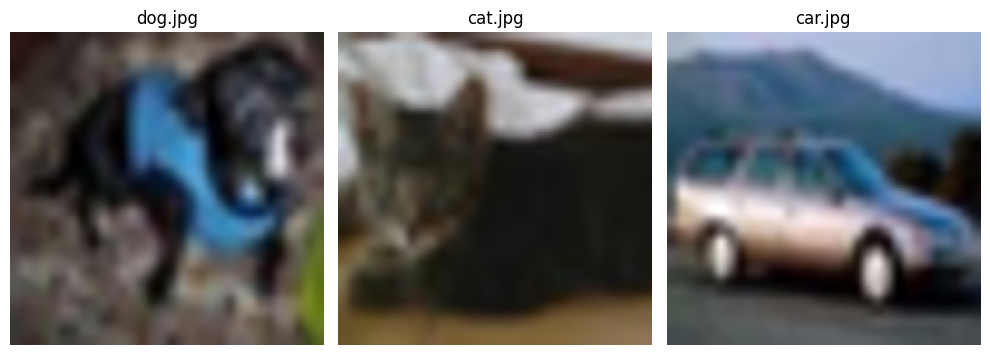

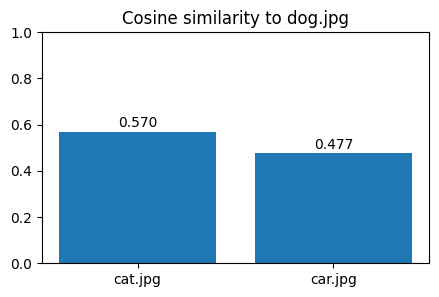

In [ ]:
# ===============================================
# URL ÏóÜÏù¥ ÎèôÏûë: CIFAR-10ÏóêÏÑú dog/cat/car Ï∂îÏ∂ú ‚Üí ResNet50 ÏûÑÎ≤†Îî© ‚Üí ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ
# ===============================================
import os, pathlib
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar10

print("TensorFlow:", tf.__version__)


# 0) Ï†ÄÏû• Ìè¥Îçî
IMG_DIR = "sample_images"
os.makedirs(IMG_DIR, exist_ok=True)


# 1) CIFAR-10 Î°úÎìú (ÏûêÎèô Îã§Ïö¥Î°úÎìú) ‚Äî ÌÅ¥ÎûòÏä§ ÎùºÎ≤® Îß§Ìïë
# CIFAR-10 label names: 0 airplane, 1 automobile, 2 bird, 3 cat, 4 deer, 5 dog, 6 frog, 7 horse, 8 ship, 9 truck
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()

label_to_name = {
    1: "car",   # automobile
    3: "cat",
    5: "dog"
}

picked_paths = {}
for label, name in label_to_name.items():
    # Ìï¥Îãπ ÌÅ¥ÎûòÏä§Î•º Í∞ÄÏßÑ Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ†ÌÉù
    idx = np.where(y_train == label)[0][0]
    img_arr = x_train[idx]  # (32,32,3) uint8
    # Ï†ÄÏû• ÌååÏùºÎ™Ö
    fname = f"{name}.jpg"
    fpath = os.path.join(IMG_DIR, fname)
    # 224x224Î°ú ÏóÖÏä§ÏºÄÏùº Ï†ÄÏû• (ResNet ÏûÖÎ†• ÌÅ¨Í∏∞)
    Image.fromarray(img_arr).resize((224, 224), Image.BICUBIC).save(fpath, format="JPEG", quality=95)
    picked_paths[name] = fpath

print("Ï†ÄÏû•Îêú ÌååÏùº:", picked_paths)


# 2) ResNet50 (ImageNet ÏÇ¨Ï†ÑÌïôÏäµ, Î∂ÑÎ•òÌó§Îìú Ï†úÍ±∞)
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')  # (1, 2048) ÏûÑÎ≤†Îî©

def get_embedding(img_path):
    img = image.load_img(img_path, target_size=(224, 224))   # ÌòπÏãú Î™®Î•º ÌÅ¨Í∏∞ Î≥¥Ï†ï
    x = image.img_to_array(img)[None, ...]                   # (1,224,224,3)
    x = preprocess_input(x)
    emb = model.predict(x, verbose=0)                        # (1,2048)
    return emb


# 3) ÏûÑÎ≤†Îî© Ï∂îÏ∂ú
image_files = [picked_paths["dog"], picked_paths["cat"], picked_paths["car"]]
embeddings = {p: get_embedding(p) for p in image_files}


# 4) ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨
paths = list(embeddings.keys())
mat = np.vstack([embeddings[p] for p in paths])              # (N,2048)
sim = cosine_similarity(mat, mat)

df_sim = pd.DataFrame(sim,
                      index=[pathlib.Path(p).name for p in paths],
                      columns=[pathlib.Path(p).name for p in paths])
print("\nüìä Ï†ÑÏ≤¥ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨")
try:
    display(df_sim.style.format("{:.4f}"))
except NameError:
    print(df_sim.round(4))



# 5) dog.jpg Í∏∞Ï§Ä Ïú†ÏÇ¨ÎèÑ Ï†ïÎ†¨
target_name = "dog.jpg"
target_path = os.path.join(IMG_DIR, target_name)
target_idx = paths.index(target_path)
scores = sim[target_idx]

ranked = sorted(
    [(pathlib.Path(p).name, float(scores[i])) for i, p in enumerate(paths) if i != target_idx],
    key=lambda x: x[1], reverse=True
)

print(f"\n‚úÖ '{target_name}'ÏôÄ Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄ Ïàú")
for name, s in ranked:
    print(f"  {name:10s} : {s:.4f}")



# 6) ÎØ∏Îãà Í∞§Îü¨Î¶¨ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for ax, p in zip(axes, image_files):
    ax.imshow(Image.open(p))
    ax.set_title(pathlib.Path(p).name)
    ax.axis("off")
plt.tight_layout()
plt.show()



# 7) Î∞î Ï∞®Ìä∏
plt.figure(figsize=(5,3))
names = [n for n, _ in ranked]
vals  = [s for _, s in ranked]
plt.bar(names, vals)
plt.ylim(0, 1.0)
for i, v in enumerate(vals):
    plt.text(i, v+0.02, f"{v:.3f}", ha="center")
plt.title(f"Cosine similarity to {target_name}")
plt.show()


In [ ]:
embedding

üñºÔ∏è Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© Í∏∞Î≥∏ Í∞úÎÖê Ïù¥Ìï¥ÌïòÍ∏∞
üìÑ ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÎì§:
  Ïù¥ÎØ∏ÏßÄ1: Îπ®Í∞Ñ ÏÇ¨Í∞ÅÌòï
  Ïù¥ÎØ∏ÏßÄ2: ÌååÎûÄ Ïõê
  Ïù¥ÎØ∏ÏßÄ3: ÎÖπÏÉâ ÏÑ†Îì§

üî¢ ÌäπÏßï Ï∂îÏ∂ú Í≥ºÏ†ï:

  Îπ®Í∞Ñ ÏÇ¨Í∞ÅÌòï:
    RGB ÌèâÍ∑†: R=63.8, G=0.0, B=0.0
    Î∞ùÍ∏∞: 19.0
    ÎåÄÎπÑ: 32.9
    ÏóêÏßÄ Î∞ÄÎèÑ: 0.0303

  ÌååÎûÄ Ïõê:
    RGB ÌèâÍ∑†: R=0.0, G=0.0, B=49.6
    Î∞ùÍ∏∞: 5.6
    ÎåÄÎπÑ: 11.5
    ÏóêÏßÄ Î∞ÄÎèÑ: 0.0254

  ÎÖπÏÉâ ÏÑ†Îì§:
    RGB ÌèâÍ∑†: R=0.0, G=91.6, B=0.0
    Î∞ùÍ∏∞: 53.9
    ÎåÄÎπÑ: 72.0
    ÏóêÏßÄ Î∞ÄÎèÑ: 0.2344

üîó Ïù¥ÎØ∏ÏßÄ Í∞Ñ Ïú†ÏÇ¨ÎèÑ (ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ):
  Îπ®Í∞Ñ ÏÇ¨Í∞ÅÌòï - ÌååÎûÄ Ïõê: 0.1275
  Îπ®Í∞Ñ ÏÇ¨Í∞ÅÌòï - ÎÖπÏÉâ ÏÑ†Îì§: 0.3561
  ÌååÎûÄ Ïõê - ÎÖπÏÉâ ÏÑ†Îì§: 0.1718


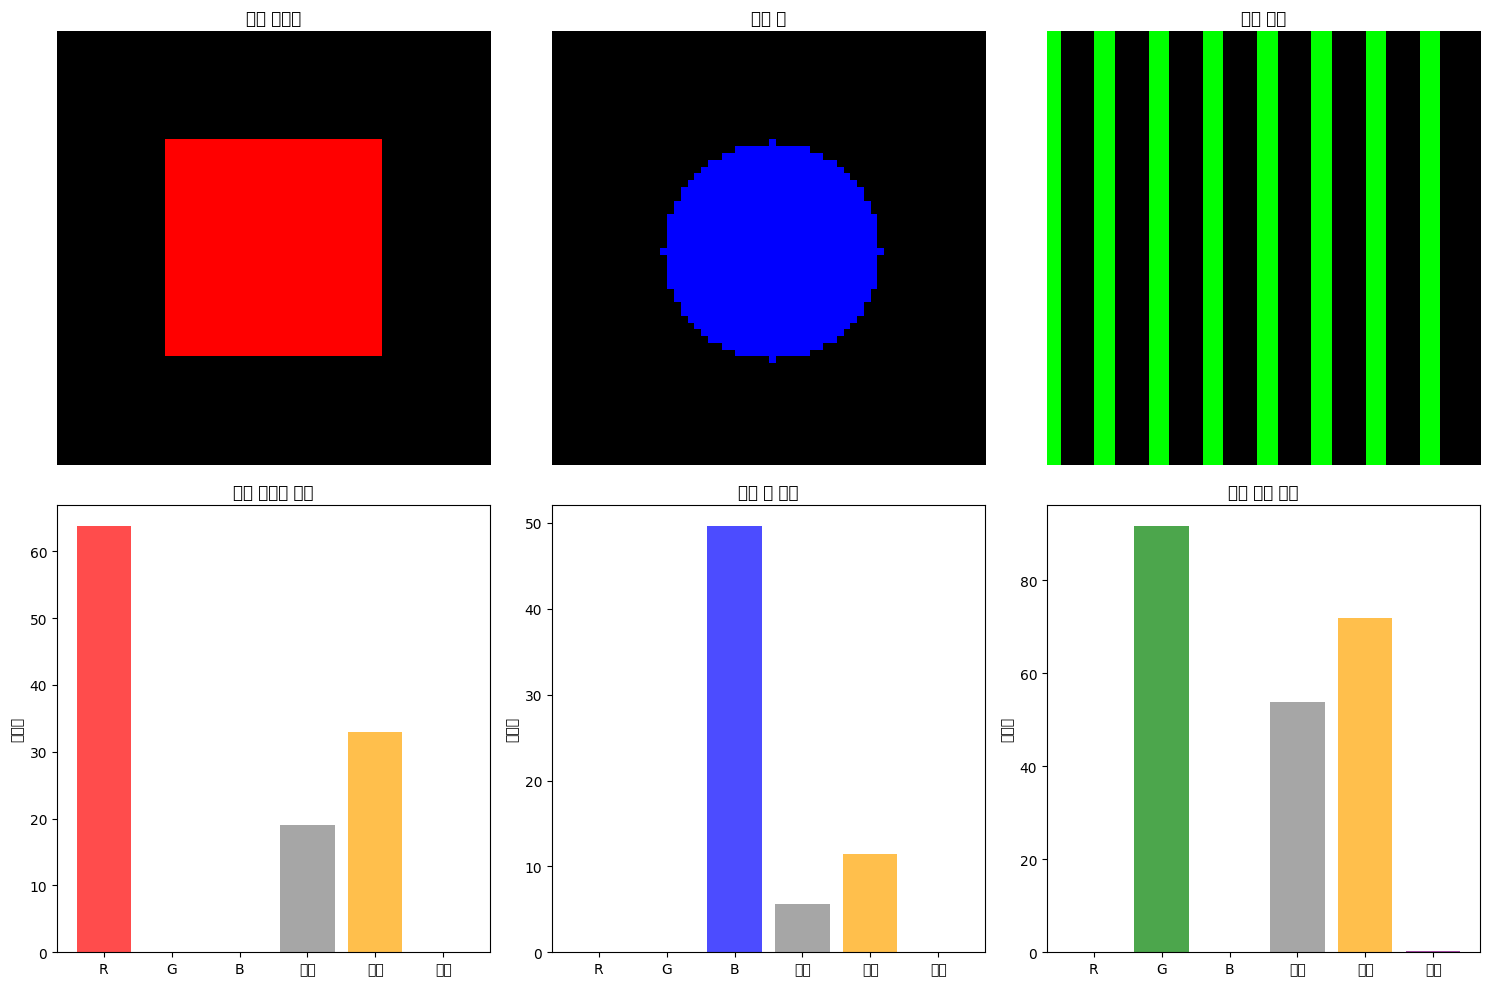

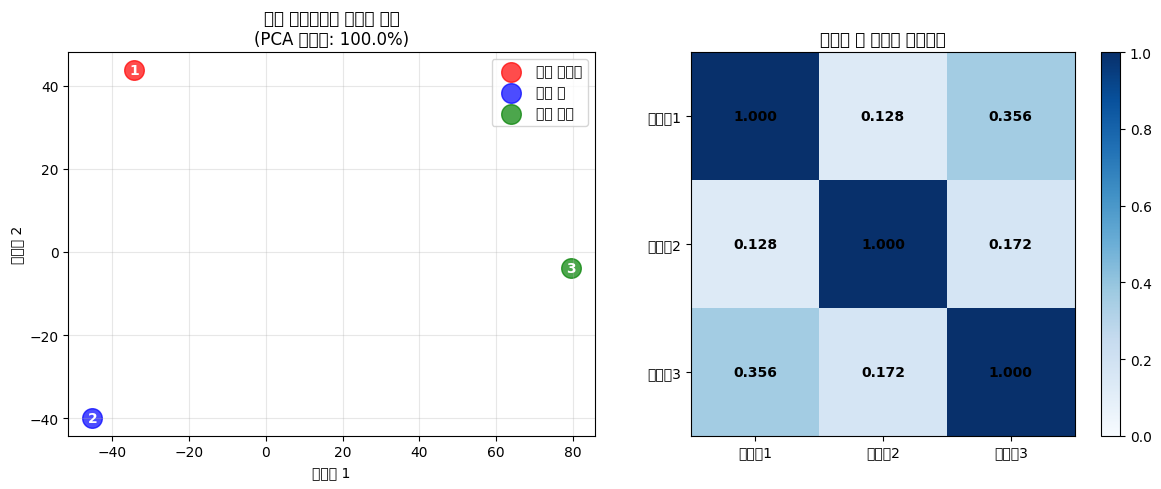


üí° Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© ÌïµÏã¨ ÏõêÎ¶¨:
  ‚úÖ Ïù¥ÎØ∏ÏßÄÎ•º ÏàòÏπò Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
  ‚úÖ ÎπÑÏä∑Ìïú Ïù¥ÎØ∏ÏßÄÎäî ÎπÑÏä∑Ìïú Î≤°ÌÑ∞Î•º Í∞ÄÏßê
  ‚úÖ Î≤°ÌÑ∞ Í∞Ñ Í±∞Î¶¨Î°ú Ïú†ÏÇ¨ÎèÑ Ï∏°Ï†ï
  ‚úÖ ÌäπÏßï ÏÑ†ÌÉùÏù¥ ÏÑ±Îä•Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•


(array([[6.37500000e+01, 0.00000000e+00, 0.00000000e+00, 1.90000000e+01,
         3.29089653e+01, 3.02734375e-02],
        [0.00000000e+00, 0.00000000e+00, 4.96179199e+01, 5.64282227e+00,
         1.14804356e+01, 2.53906250e-02],
        [0.00000000e+00, 9.16406250e+01, 0.00000000e+00, 5.39062500e+01,
         7.19725900e+01, 2.34375000e-01]]),
 ['Îπ®Í∞Ñ ÏÇ¨Í∞ÅÌòï', 'ÌååÎûÄ Ïõê', 'ÎÖπÏÉâ ÏÑ†Îì§'])

In [ ]:
# Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© Í∞ÑÎã® ÌÖåÏä§Ìä∏ - Î∞îÎ°ú Ïã§Ìñâ Í∞ÄÎä•
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumBarunGothic'


def simple_image_embedding_demo():
    """
    Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© Í∏∞Î≥∏ Í∞úÎÖêÏùÑ Î≥¥Ïó¨Ï£ºÎäî Í∞ÑÎã®Ìïú ÏòàÏ†ú
    """
    print("üñºÔ∏è Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© Í∏∞Î≥∏ Í∞úÎÖê Ïù¥Ìï¥ÌïòÍ∏∞")
    print("=" * 50)

    # 1Îã®Í≥Ñ: Í∞ÑÎã®Ìïú Ïù¥ÎØ∏ÏßÄÎì§ ÏÉùÏÑ±
    def create_simple_images():
        images = []
        labels = []

        # Îπ®Í∞Ñ ÏÇ¨Í∞ÅÌòï
        red_square = np.zeros((64, 64, 3), dtype=np.uint8)
        red_square[16:48, 16:48] = [0, 0, 255]  # BGR ÌòïÏãù
        images.append(red_square)
        labels.append('Îπ®Í∞Ñ ÏÇ¨Í∞ÅÌòï')

        # ÌååÎûÄ Ïõê
        blue_circle = np.zeros((64, 64, 3), dtype=np.uint8)
        cv2.circle(blue_circle, (32, 32), 16, (255, 0, 0), -1)
        images.append(blue_circle)
        labels.append('ÌååÎûÄ Ïõê')

        # ÎÖπÏÉâ ÏÑ†
        green_lines = np.zeros((64, 64, 3), dtype=np.uint8)
        for i in range(0, 64, 8):
            cv2.line(green_lines, (i, 0), (i, 64), (0, 255, 0), 2)
        images.append(green_lines)
        labels.append('ÎÖπÏÉâ ÏÑ†Îì§')

        return images, labels

    images, image_labels = create_simple_images()

    print("üìÑ ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÎì§:")
    for i, label in enumerate(image_labels):
        print(f"  Ïù¥ÎØ∏ÏßÄ{i+1}: {label}")

    # 2Îã®Í≥Ñ: Í∞ÑÎã®Ìïú ÌäπÏßï Ï∂îÏ∂ú
    def extract_simple_features(image):
        """Í∞ÑÎã®Ìïú Ïù¥ÎØ∏ÏßÄ ÌäπÏßï Ï∂îÏ∂ú"""
        # RGB Ï±ÑÎÑêÎ≥Ñ ÌèâÍ∑†Í∞í
        b_mean = np.mean(image[:, :, 0])  # Blue
        g_mean = np.mean(image[:, :, 1])  # Green
        r_mean = np.mean(image[:, :, 2])  # Red

        # Í∑∏Î†àÏù¥Ïä§ÏºÄÏùºÎ°ú Î≥ÄÌôò
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Í∏∞Î≥∏ ÌÜµÍ≥Ñ
        brightness = np.mean(gray)
        contrast = np.std(gray)

        # ÏóêÏßÄ Î∞ÄÎèÑ (Í∞ÑÎã®Ìïú Î≤ÑÏ†Ñ)
        edges = cv2.Canny(gray, 50, 150)
        edge_density = np.sum(edges > 0) / edges.size

        # ÌäπÏßï Î≤°ÌÑ∞ ÏÉùÏÑ±
        features = np.array([r_mean, g_mean, b_mean, brightness, contrast, edge_density])

        return features


    print(f"\nüî¢ ÌäπÏßï Ï∂îÏ∂ú Í≥ºÏ†ï:")

    all_features = []
    for i, (image, label) in enumerate(zip(images, image_labels)):
        features = extract_simple_features(image)
        all_features.append(features)

        print(f"\n  {label}:")
        print(f"    RGB ÌèâÍ∑†: R={features[0]:.1f}, G={features[1]:.1f}, B={features[2]:.1f}")
        print(f"    Î∞ùÍ∏∞: {features[3]:.1f}")
        print(f"    ÎåÄÎπÑ: {features[4]:.1f}")
        print(f"    ÏóêÏßÄ Î∞ÄÎèÑ: {features[5]:.4f}")

    all_features = np.array(all_features)


    # 3Îã®Í≥Ñ: Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
    print(f"\nüîó Ïù¥ÎØ∏ÏßÄ Í∞Ñ Ïú†ÏÇ¨ÎèÑ (ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ):")

    similarity_matrix = cosine_similarity(all_features)

    for i in range(len(image_labels)):
        for j in range(i+1, len(image_labels)):
            sim = similarity_matrix[i][j]
            print(f"  {image_labels[i]} - {image_labels[j]}: {sim:.4f}")


    # 4Îã®Í≥Ñ: ÏãúÍ∞ÅÌôî
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÎì§
    for i, (image, label) in enumerate(zip(images, image_labels)):
        # BGRÏùÑ RGBÎ°ú Î≥ÄÌôò
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[0, i].imshow(rgb_image)
        axes[0, i].set_title(f'{label}')
        axes[0, i].axis('off')

    # ÌäπÏßï Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî
    axes[1, 0].bar(['R', 'G', 'B', 'Î∞ùÍ∏∞', 'ÎåÄÎπÑ', 'ÏóêÏßÄ'], all_features[0],
                   color=['red', 'green', 'blue', 'gray', 'orange', 'purple'], alpha=0.7)
    axes[1, 0].set_title('Îπ®Í∞Ñ ÏÇ¨Í∞ÅÌòï ÌäπÏßï')
    axes[1, 0].set_ylabel('ÌäπÏßïÍ∞í')

    axes[1, 1].bar(['R', 'G', 'B', 'Î∞ùÍ∏∞', 'ÎåÄÎπÑ', 'ÏóêÏßÄ'], all_features[1],
                   color=['red', 'green', 'blue', 'gray', 'orange', 'purple'], alpha=0.7)
    axes[1, 1].set_title('ÌååÎûÄ Ïõê ÌäπÏßï')
    axes[1, 1].set_ylabel('ÌäπÏßïÍ∞í')

    axes[1, 2].bar(['R', 'G', 'B', 'Î∞ùÍ∏∞', 'ÎåÄÎπÑ', 'ÏóêÏßÄ'], all_features[2],
                   color=['red', 'green', 'blue', 'gray', 'orange', 'purple'], alpha=0.7)
    axes[1, 2].set_title('ÎÖπÏÉâ ÏÑ†Îì§ ÌäπÏßï')
    axes[1, 2].set_ylabel('ÌäπÏßïÍ∞í')

    plt.tight_layout()
    plt.show()


    # 5Îã®Í≥Ñ: ÌäπÏßï Í≥µÍ∞ÑÏóêÏÑú ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 5))

    # PCAÎ°ú 2Ï∞®Ïõê Ï∂ïÏÜå
    if all_features.shape[1] > 2:
        pca = PCA(n_components=2)
        features_2d = pca.fit_transform(all_features)
        explained_variance = pca.explained_variance_ratio_.sum()
    else:
        features_2d = all_features[:, :2]
        explained_variance = 1.0

    plt.subplot(1, 2, 1)
    colors = ['red', 'blue', 'green']

    for i, (point, label, color) in enumerate(zip(features_2d, image_labels, colors)):
        plt.scatter(point[0], point[1], c=color, s=200, alpha=0.7, label=label)
        plt.annotate(f'{i+1}', (point[0], point[1]),
                    ha='center', va='center', fontweight='bold', color='white')

    plt.title(f'ÌäπÏßï Í≥µÍ∞ÑÏóêÏÑúÏùò Ïù¥ÎØ∏ÏßÄ ÏúÑÏπò\n(PCA ÏÑ§Î™ÖÎ†•: {explained_variance:.1%})')
    plt.xlabel('Ï£ºÏÑ±Î∂Ñ 1')
    plt.ylabel('Ï£ºÏÑ±Î∂Ñ 2')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ
    plt.subplot(1, 2, 2)
    im = plt.imshow(similarity_matrix, cmap='Blues', vmin=0, vmax=1)
    plt.colorbar(im)

    # Ïú†ÏÇ¨ÎèÑ Í∞í ÌëúÏãú
    for i in range(len(image_labels)):
        for j in range(len(image_labels)):
            plt.text(j, i, f'{similarity_matrix[i, j]:.3f}',
                    ha='center', va='center', fontweight='bold')

    plt.title('Ïù¥ÎØ∏ÏßÄ Í∞Ñ Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§')
    plt.xticks(range(len(image_labels)), [f'Ïù¥ÎØ∏ÏßÄ{i+1}' for i in range(len(image_labels))])
    plt.yticks(range(len(image_labels)), [f'Ïù¥ÎØ∏ÏßÄ{i+1}' for i in range(len(image_labels))])

    plt.tight_layout()
    plt.show()

    print(f"\nüí° Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© ÌïµÏã¨ ÏõêÎ¶¨:")
    print("  ‚úÖ Ïù¥ÎØ∏ÏßÄÎ•º ÏàòÏπò Î≤°ÌÑ∞Î°ú Î≥ÄÌôò")
    print("  ‚úÖ ÎπÑÏä∑Ìïú Ïù¥ÎØ∏ÏßÄÎäî ÎπÑÏä∑Ìïú Î≤°ÌÑ∞Î•º Í∞ÄÏßê")
    print("  ‚úÖ Î≤°ÌÑ∞ Í∞Ñ Í±∞Î¶¨Î°ú Ïú†ÏÇ¨ÎèÑ Ï∏°Ï†ï")
    print("  ‚úÖ ÌäπÏßï ÏÑ†ÌÉùÏù¥ ÏÑ±Îä•Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•")

    return all_features, image_labels


def practical_image_search_demo():
    """
    Ïã§Ïö©Ï†ÅÏù∏ Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÉâ ÏòàÏ†ú
    """
    print(f"\n" + "=" * 50)
    print("üîç Ïã§Ïö©Ï†Å Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÉâ ÏãúÏä§ÌÖú")
    print("=" * 50)

    # Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÉùÏÑ±
    def create_image_db():
        db_images = []
        db_descriptions = []

        # Îã§ÏñëÌïú Ìå®ÌÑ¥Ïùò Ïù¥ÎØ∏ÏßÄÎì§
        patterns = [
            {'desc': 'Îπ®Í∞Ñ_ÏÇ¨Í∞ÅÌòï', 'shape': 'rect', 'color': (0, 0, 255)},
            {'desc': 'ÌååÎûÄ_ÏÇ¨Í∞ÅÌòï', 'shape': 'rect', 'color': (255, 0, 0)},
            {'desc': 'ÎÖπÏÉâ_Ïõê', 'shape': 'circle', 'color': (0, 255, 0)},
            {'desc': 'ÎÖ∏ÎûÄ_Ïõê', 'shape': 'circle', 'color': (0, 255, 255)},
            {'desc': 'ÏàòÏßÅ_ÏÑ†', 'shape': 'v_lines', 'color': (128, 128, 128)},
            {'desc': 'ÏàòÌèâ_ÏÑ†', 'shape': 'h_lines', 'color': (128, 128, 128)},
            {'desc': 'Ï≤¥ÌÅ¨_Ìå®ÌÑ¥', 'shape': 'checker', 'color': (255, 255, 255)},
            {'desc': 'ÎåÄÍ∞Å_ÏÑ†', 'shape': 'diagonal', 'color': (0, 128, 255)}
        ]

        for pattern in patterns:
            img = np.zeros((64, 64, 3), dtype=np.uint8)

            if pattern['shape'] == 'rect':
                cv2.rectangle(img, (16, 16), (48, 48), pattern['color'], -1)
            elif pattern['shape'] == 'circle':
                cv2.circle(img, (32, 32), 16, pattern['color'], -1)
            elif pattern['shape'] == 'v_lines':
                for x in range(8, 64, 8):
                    cv2.line(img, (x, 0), (x, 64), pattern['color'], 2)
            elif pattern['shape'] == 'h_lines':
                for y in range(8, 64, 8):
                    cv2.line(img, (0, y), (64, y), pattern['color'], 2)
            elif pattern['shape'] == 'checker':
                for i in range(0, 64, 16):
                    for j in range(0, 64, 16):
                        if (i//16 + j//16) % 2 == 0:
                            img[i:i+16, j:j+16] = pattern['color']
            elif pattern['shape'] == 'diagonal':
                cv2.line(img, (0, 0), (64, 64), pattern['color'], 3)
                cv2.line(img, (0, 64), (64, 0), pattern['color'], 3)

            db_images.append(img)
            db_descriptions.append(pattern['desc'])

        return db_images, db_descriptions

    # Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÉùÏÑ±
    db_images, db_descriptions = create_image_db()

    print(f"Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÌÅ¨Í∏∞: {len(db_images)}Í∞ú Ïù¥ÎØ∏ÏßÄ")

    # Í∞ÑÎã®Ìïú ÌäπÏßï Ï∂îÏ∂ú Ìï®Ïàò
    def extract_features(image):
        # RGB ÌèâÍ∑†
        r_mean = np.mean(image[:, :, 2])
        g_mean = np.mean(image[:, :, 1])
        b_mean = np.mean(image[:, :, 0])

        # Í∑∏Î†àÏù¥Ïä§ÏºÄÏùº Î≥ÄÌôò Î∞è ÌÜµÍ≥Ñ
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        brightness = np.mean(gray)
        contrast = np.std(gray)

        # ÏóêÏßÄ ÌäπÏßï
        edges = cv2.Canny(gray, 50, 150)
        edge_density = np.sum(edges > 0) / edges.size

        # Î∞©Ìñ•ÏÑ± ÌäπÏßï (Í∞ÑÎã®Ìïú Î≤ÑÏ†Ñ)
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        horizontal_edges = np.sum(np.abs(sobel_x)) / gray.size
        vertical_edges = np.sum(np.abs(sobel_y)) / gray.size

        return np.array([r_mean, g_mean, b_mean, brightness, contrast,
                        edge_density, horizontal_edges, vertical_edges])

    # Î™®Îì† DB Ïù¥ÎØ∏ÏßÄÏùò ÌäπÏßï Ï∂îÏ∂ú
    db_features = []
    for img in db_images:
        features = extract_features(img)
        db_features.append(features)
    db_features = np.array(db_features)

    # ÏøºÎ¶¨ Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ± (ÌååÎûÄ ÏõêÍ≥º Ïú†ÏÇ¨)
    query_img = np.zeros((64, 64, 3), dtype=np.uint8)
    cv2.circle(query_img, (32, 32), 14, (200, 50, 50), -1)  # ÏïΩÍ∞Ñ Îã§Î•∏ ÌååÎûÄ Ïõê

    query_features = extract_features(query_img)

    # Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
    similarities = cosine_similarity([query_features], db_features)[0]

    # Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Ïù¥ÎØ∏ÏßÄÎì§ Ï∞æÍ∏∞
    top_indices = np.argsort(similarities)[::-1][:3]

    print(f"\nüéØ Í≤ÄÏÉâ Í≤∞Í≥º:")
    print(f"ÏøºÎ¶¨: ÌååÎûÄÏÉâ Ïõê (ÏïΩÍ∞Ñ Îã§Î•∏ ÌÅ¨Í∏∞)")

    for i, idx in enumerate(top_indices):
        print(f"  {i+1}ÏúÑ: {db_descriptions[idx]} (Ïú†ÏÇ¨ÎèÑ: {similarities[idx]:.4f})")

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 8))

    # ÏøºÎ¶¨ Ïù¥ÎØ∏ÏßÄ
    plt.subplot(2, 4, 1)
    query_rgb = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)
    plt.imshow(query_rgb)
    plt.title('ÏøºÎ¶¨ Ïù¥ÎØ∏ÏßÄ')
    plt.axis('off')

    # Í≤ÄÏÉâ Í≤∞Í≥º
    for i, idx in enumerate(top_indices):
        plt.subplot(2, 4, i+2)
        result_rgb = cv2.cvtColor(db_images[idx], cv2.COLOR_BGR2RGB)
        plt.imshow(result_rgb)
        plt.title(f'{i+1}ÏúÑ: {db_descriptions[idx]}\nÏú†ÏÇ¨ÎèÑ: {similarities[idx]:.3f}')
        plt.axis('off')

    # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ (ÌïòÏúÑ 4Í∞ú)
    bottom_indices = np.argsort(similarities)[:4]
    for i, idx in enumerate(bottom_indices):
        plt.subplot(2, 4, i+5)
        img_rgb = cv2.cvtColor(db_images[idx], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f'{db_descriptions[idx]}\nÏú†ÏÇ¨ÎèÑ: {similarities[idx]:.3f}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    return db_features, similarities


def feature_importance_analysis():
    """
    ÌäπÏßïÏùò Ï§ëÏöîÎèÑ Î∂ÑÏÑù
    """
    print(f"\n" + "=" * 50)
    print("üìä ÌäπÏßï Ï§ëÏöîÎèÑ Î∂ÑÏÑù")
    print("=" * 50)

    # Îã§ÏñëÌïú Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
    test_images = []
    image_types = []

    # ÏÉâÏÉÅÏù¥ Ï§ëÏöîÌïú Ïù¥ÎØ∏ÏßÄÎì§
    red_img = np.full((64, 64, 3), [0, 0, 255], dtype=np.uint8)
    blue_img = np.full((64, 64, 3), [255, 0, 0], dtype=np.uint8)

    # ÌòïÌÉúÍ∞Ä Ï§ëÏöîÌïú Ïù¥ÎØ∏ÏßÄÎì§
    circle_img = np.zeros((64, 64, 3), dtype=np.uint8)
    cv2.circle(circle_img, (32, 32), 20, (128, 128, 128), -1)

    square_img = np.zeros((64, 64, 3), dtype=np.uint8)
    cv2.rectangle(square_img, (12, 12), (52, 52), (128, 128, 128), -1)

    # ÌÖçÏä§Ï≤òÍ∞Ä Ï§ëÏöîÌïú Ïù¥ÎØ∏ÏßÄÎì§
    noise_img = np.random.randint(0, 256, (64, 64, 3), dtype=np.uint8)
    lines_img = np.zeros((64, 64, 3), dtype=np.uint8)
    for i in range(0, 64, 4):
        lines_img[i:i+2, :] = 200

    test_images = [red_img, blue_img, circle_img, square_img, noise_img, lines_img]
    image_types = ['Îπ®Í∞ÑÏÉâ', 'ÌååÎûÄÏÉâ', 'Ïõê', 'ÏÇ¨Í∞ÅÌòï', 'ÎÖ∏Ïù¥Ï¶à', 'ÏÑ† Ìå®ÌÑ¥']

    # ÌäπÏßï Ï∂îÏ∂ú
    def detailed_feature_extraction(image):
        # ÏÉâÏÉÅ ÌäπÏßï
        r_mean = np.mean(image[:, :, 2])
        g_mean = np.mean(image[:, :, 1])
        b_mean = np.mean(image[:, :, 0])

        # ÌòïÌÉú ÌäπÏßï
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        edge_density = np.sum(edges > 0) / edges.size

        # ÎëòÎ†à Í∏∏Ïù¥ Ï∂îÏ†ï (Í∞ÑÎã®Ìïú Î∞©Î≤ï)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        perimeter = sum(cv2.arcLength(c, True) for c in contours)

        # ÌÖçÏä§Ï≤ò ÌäπÏßï
        brightness = np.mean(gray)
        contrast = np.std(gray)

        # ÏßÄÏó≠Ï†Å Î≥ÄÌôîÎüâ
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)
        texture_variation = np.var(laplacian)

        return {
            'Îπ®Í∞ÑÏÉâ': r_mean,
            'ÎÖπÏÉâ': g_mean,
            'ÌååÎûÄÏÉâ': b_mean,
            'ÏóêÏßÄÎ∞ÄÎèÑ': edge_density,
            'ÎëòÎ†à': perimeter / 1000,  # Ïä§ÏºÄÏùº Ï°∞Ï†ï
            'Î∞ùÍ∏∞': brightness,
            'ÎåÄÎπÑ': contrast,
            'ÌÖçÏä§Ï≤òÎ≥ÄÌôî': texture_variation / 1000  # Ïä§ÏºÄÏùº Ï°∞Ï†ï
        }

    # Î™®Îì† Ïù¥ÎØ∏ÏßÄÏùò ÌäπÏßï Ï∂îÏ∂ú
    all_features = []
    feature_names = None

    for img in test_images:
        features_dict = detailed_feature_extraction(img)
        if feature_names is None:
            feature_names = list(features_dict.keys())
        all_features.append(list(features_dict.values()))

    all_features = np.array(all_features)

    print(f"Ï∂îÏ∂úÎêú ÌäπÏßïÎì§: {feature_names}")

    # ÌäπÏßïÎ≥Ñ Î∂ÑÏÑù
    plt.figure(figsize=(15, 10))

    # Í∞Å Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
    for i, (img, img_type) in enumerate(zip(test_images, image_types)):
        plt.subplot(3, 6, i+1)
        if img_type in ['ÎÖ∏Ïù¥Ï¶à']:
            plt.imshow(img)
        else:
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(rgb_img)
        plt.title(img_type)
        plt.axis('off')

    # ÌäπÏßïÎ≥Ñ ÌûàÌä∏Îßµ
    plt.subplot(3, 2, 3)
    normalized_features = (all_features - all_features.min(axis=0)) / (all_features.max(axis=0) - all_features.min(axis=0) + 1e-7)

    im = plt.imshow(normalized_features.T, cmap='RdYlBu_r', aspect='auto')
    plt.colorbar(im)
    plt.yticks(range(len(feature_names)), feature_names)
    plt.xticks(range(len(image_types)), image_types, rotation=45)
    plt.title('Ï†ïÍ∑úÌôîÎêú ÌäπÏßï ÌûàÌä∏Îßµ')

    # Í∞Å ÌäπÏßïÎ≥Ñ Î∂ÑÌè¨
    plt.subplot(3, 2, 4)
    feature_variances = np.var(normalized_features, axis=0)
    bars = plt.bar(range(len(feature_names)), feature_variances,
                   color=['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray'])
    plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')


# Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© Í∏∞Î≥∏ Í∞úÎÖê ÏãúÍ∞ÅÌôî
simple_image_embedding_demo()



üîç Ïã§Ïö©Ï†Å Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÉâ ÏãúÏä§ÌÖú
Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÌÅ¨Í∏∞: 8Í∞ú Ïù¥ÎØ∏ÏßÄ

üéØ Í≤ÄÏÉâ Í≤∞Í≥º:
ÏøºÎ¶¨: ÌååÎûÄÏÉâ Ïõê (ÏïΩÍ∞Ñ Îã§Î•∏ ÌÅ¨Í∏∞)
  1ÏúÑ: Ï≤¥ÌÅ¨_Ìå®ÌÑ¥ (Ïú†ÏÇ¨ÎèÑ: 0.8608)
  2ÏúÑ: ÌååÎûÄ_ÏÇ¨Í∞ÅÌòï (Ïú†ÏÇ¨ÎèÑ: 0.8383)
  3ÏúÑ: ÎÖ∏ÎûÄ_Ïõê (Ïú†ÏÇ¨ÎèÑ: 0.6889)


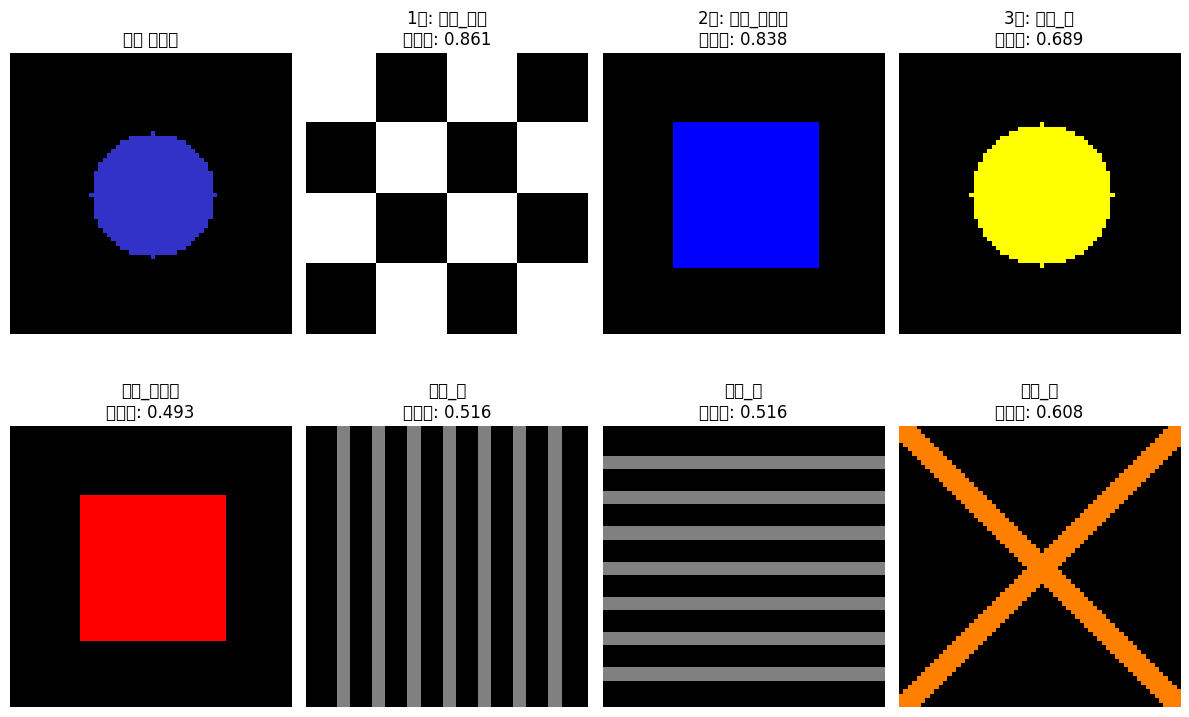

(array([[6.77966309e+01, 0.00000000e+00, 0.00000000e+00, 2.02060547e+01,
         3.35764130e+01, 3.12500000e-02, 9.79687500e+00, 9.79687500e+00],
        [0.00000000e+00, 0.00000000e+00, 6.77966309e+01, 7.71020508e+00,
         1.28120523e+01, 3.12500000e-02, 3.73828125e+00, 3.73828125e+00],
        [0.00000000e+00, 4.96179199e+01, 0.00000000e+00, 2.91870117e+01,
         5.93815637e+01, 2.53906250e-02, 1.87500000e+01, 1.87500000e+01],
        [4.96179199e+01, 4.96179199e+01, 0.00000000e+00, 4.39750977e+01,
         8.94682226e+01, 2.53906250e-02, 2.82500000e+01, 2.82500000e+01],
        [4.20000000e+01, 4.20000000e+01, 4.20000000e+01, 4.20000000e+01,
         6.00999168e+01, 2.18750000e-01, 2.24000000e+02, 0.00000000e+00],
        [4.20000000e+01, 4.20000000e+01, 4.20000000e+01, 4.20000000e+01,
         6.00999168e+01, 2.18750000e-01, 0.00000000e+00, 2.24000000e+02],
        [1.27500000e+02, 1.27500000e+02, 1.27500000e+02, 1.27500000e+02,
         1.27500000e+02, 8.49609375e-02, 9.11

In [ ]:
# Ïã§Ïö©Ï†ÅÏù∏ Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÉâ ÏòàÏ†ú
practical_image_search_demo()




---




üìä ÌäπÏßï Ï§ëÏöîÎèÑ Î∂ÑÏÑù
Ï∂îÏ∂úÎêú ÌäπÏßïÎì§: ['Îπ®Í∞ÑÏÉâ', 'ÎÖπÏÉâ', 'ÌååÎûÄÏÉâ', 'ÏóêÏßÄÎ∞ÄÎèÑ', 'ÎëòÎ†à', 'Î∞ùÍ∏∞', 'ÎåÄÎπÑ', 'ÌÖçÏä§Ï≤òÎ≥ÄÌôî']


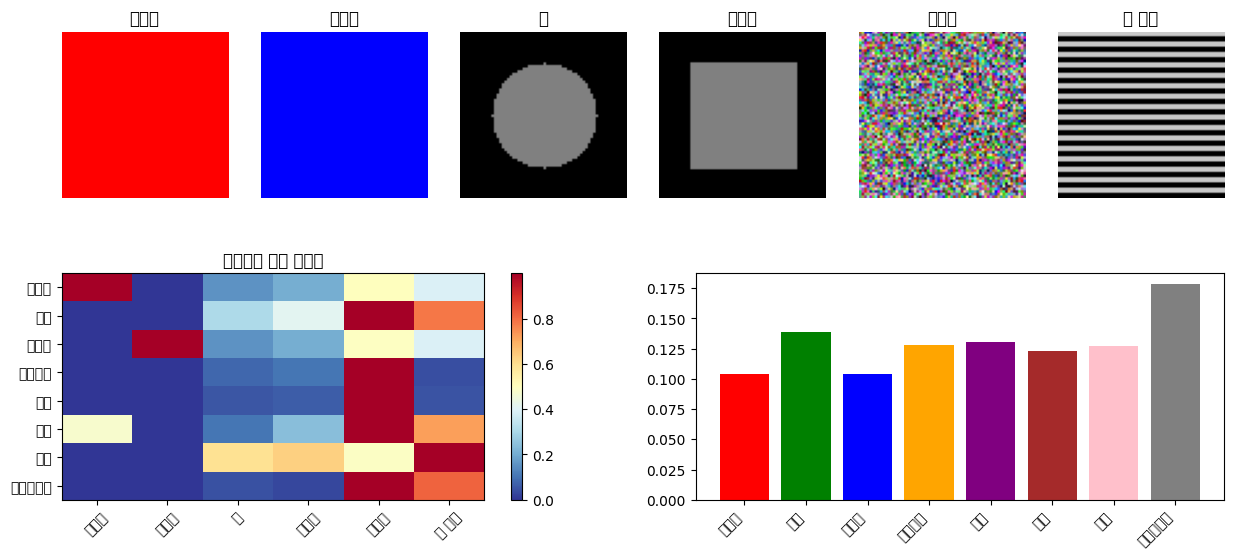

In [ ]:
# Ïù¥ÎØ∏ÏßÄ ÌäπÏßïÏùò Ï§ëÏöîÎèÑ Î∂ÑÏÑù
feature_importance_analysis()


---



### **ÏòàÏ†ú : ÌóàÍπÖÌéòÏù¥Ïä§ ÌïúÍµ≠Ïñ¥ ÏûÑÎ≤†Îî© Î™®Îç∏ ÌôúÏö©**

#### **Í∏∞Î≥∏ ÏòàÏ†ú**

In [ ]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from typing import List, Dict
import warnings
warnings.filterwarnings('ignore')

class KoreanEmbeddingSystem:
    def __init__(self, model_name='jhgan/ko-sroberta-multitask'):
        """
        ÌïúÍµ≠Ïñ¥ ÏûÑÎ≤†Îî© ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî

        Ï∂îÏ≤ú Î™®Îç∏Îì§:
        - 'jhgan/ko-sroberta-multitask': ÌïúÍµ≠Ïñ¥ Sentence-RoBERTa (Î¨∏Ïû• ÏûÑÎ≤†Îî© ÌäπÌôî)
        - 'BM-K/KoSimCSE-roberta-multitask': KoSimCSE (ÏùòÎØ∏ Ïú†ÏÇ¨ÎèÑ ÌäπÌôî)
        - 'klue/roberta-base': KLUE RoBERTa (Î≤îÏö©)
        - 'monologg/kobert': KoBERT (SKT)
        """
        print(f"‚úÖ Î™®Îç∏ Î°úÎî© Ï§ë: {model_name}")

        self.model_name = model_name
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name)
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model.to(self.device)

        print(f"\n‚úÖ Î™®Îç∏ Î°úÎî© ÏôÑÎ£å! ÎîîÎ∞îÏù¥Ïä§: {self.device}")

    def encode_sentences(self, sentences: List[str], max_length: int = 512) -> np.ndarray:
        """Î¨∏Ïû•Îì§ÏùÑ Î≤°ÌÑ∞Î°ú Ïù∏ÏΩîÎî©"""
        embeddings = []

        self.model.eval()
        with torch.no_grad():
            for sentence in sentences:
                # ÌÜ†ÌÅ∞Ìôî
                inputs = self.tokenizer(
                    sentence,
                    padding=True,
                    truncation=True,
                    max_length=max_length,
                    return_tensors='pt'
                ).to(self.device)

                # ÏûÑÎ≤†Îî© ÏÉùÏÑ±
                outputs = self.model(**inputs)

                # [CLS] ÌÜ†ÌÅ∞Ïùò ÏûÑÎ≤†Îî©ÏùÑ Î¨∏Ïû• ÏûÑÎ≤†Îî©ÏúºÎ°ú ÏÇ¨Ïö©
                # ÎòêÎäî ÌèâÍ∑† ÌíÄÎßÅ ÏÇ¨Ïö©
                if hasattr(outputs, 'pooler_output') and outputs.pooler_output is not None:
                    embedding = outputs.pooler_output
                else:
                    # ÌèâÍ∑† ÌíÄÎßÅ
                    embedding = outputs.last_hidden_state.mean(dim=1)

                embeddings.append(embedding.cpu().numpy())

        return np.vstack(embeddings)

    def calculate_similarity(self, sentences1: List[str], sentences2: List[str] = None) -> np.ndarray:
        """Î¨∏Ïû•Îì§ Í∞ÑÏùò ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞"""
        embeddings1 = self.encode_sentences(sentences1)

        if sentences2 is None:
            # ÏûêÍ∏∞ ÏûêÏã†Í≥ºÏùò Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§
            similarity_matrix = cosine_similarity(embeddings1)
        else:
            # Îëê Í∑∏Î£π Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑ
            embeddings2 = self.encode_sentences(sentences2)
            similarity_matrix = cosine_similarity(embeddings1, embeddings2)

        return similarity_matrix

    def find_most_similar(self, query: str, candidates: List[str], top_k: int = 5) -> List[Dict]:
        """ÏßàÏùòÎ¨∏Í≥º Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Î¨∏Ïû•Îì§ Ï∞æÍ∏∞"""
        all_sentences = [query] + candidates
        embeddings = self.encode_sentences(all_sentences)

        query_embedding = embeddings[0:1]
        candidate_embeddings = embeddings[1:]

        similarities = cosine_similarity(query_embedding, candidate_embeddings)[0]

        # ÏÉÅÏúÑ kÍ∞ú Í≤∞Í≥º
        top_indices = similarities.argsort()[-top_k:][::-1]

        results = []
        for i, idx in enumerate(top_indices):
            results.append({
                'rank': i + 1,
                'sentence': candidates[idx],
                'similarity': similarities[idx]
            })

        return results

# Î©îÏù∏ Ïã§Ìñâ Ìï®Ïàò
def main():
    print("\n=== ÌïúÍµ≠Ïñ¥ ÏûÑÎ≤†Îî© Î™®Îç∏ ÌôúÏö© ÏãúÏä§ÌÖú ===\n")

    # ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî (Ïó¨Îü¨ Î™®Îç∏ Ï§ë ÏÑ†ÌÉù Í∞ÄÎä•)
    embedding_system = KoreanEmbeddingSystem('jhgan/ko-sroberta-multitask')

    # ÌÖåÏä§Ìä∏ Î¨∏Ïû•Îì§
    korean_sentences = [
        "Ïò§Îäò ÎÇ†Ïî®Í∞Ä Ï†ïÎßê Ï¢ãÏäµÎãàÎã§.",
        "ÎÇ†Ïî®Í∞Ä Îß§Ïö∞ ÌôîÏ∞ΩÌïòÎÑ§Ïöî.",
        "ÎπÑÍ∞Ä ÎßéÏù¥ ÎÇ¥Î¶¨Í≥† ÏûàÏñ¥Ïöî.",
        "Ïù∏Í≥µÏßÄÎä• Í∏∞Ïà†Ïù¥ Îπ†Î•¥Í≤å Î∞úÏ†ÑÌïòÍ≥† ÏûàÎã§.",
        "Î®∏Ïã†Îü¨ÎãùÏùÄ Ïª¥Ìì®ÌÑ∞Í∞Ä Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ ÌïôÏäµÌïòÎäî Í∏∞Ïà†Ïù¥Îã§.",
        "Ï†êÏã¨Ïóê Î≠ò Î®πÏùÑÏßÄ Í≥†ÎØºÏù¥ÏóêÏöî.",
        "Ïò§Îäò Ï†ÄÎÖÅ Î©îÎâ¥Î•º Ï†ïÌï¥ÏïºÍ≤†Ïñ¥Ïöî.",
        "Ï£ºÏãù ÏãúÏû•Ïù¥ Î∂àÏïàÏ†ïÌï©ÎãàÎã§.",
        "Í≤ΩÏ†ú ÏÉÅÌô©Ïù¥ Ï¢ãÏßÄ ÏïäÏïÑ Î≥¥ÏûÖÎãàÎã§."
    ]

    print("\n‚úÖ ÌÖåÏä§Ìä∏ Î¨∏Ïû•Îì§:")
    for i, sentence in enumerate(korean_sentences, 1):
        print(f"{i}. {sentence}")

    print(f"\n‚úÖ Ï¥ù {len(korean_sentences)}Í∞ú Î¨∏Ïû•Ïùò ÏûÑÎ≤†Îî©ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§...")

    # 1. Î¨∏Ïû• ÏûÑÎ≤†Îî© ÏÉùÏÑ±
    embeddings = embedding_system.encode_sentences(korean_sentences)
    print(f"ÏûÑÎ≤†Îî© shape: {embeddings.shape}")
    print(f"Í∞Å Î¨∏Ïû•ÏùÄ {embeddings.shape[1]}Ï∞®Ïõê Î≤°ÌÑ∞Î°ú ÌëúÌòÑÎê©ÎãàÎã§.")

    # 2. Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§ Í≥ÑÏÇ∞
    print("\n‚úÖ === Î¨∏Ïû• Í∞Ñ Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù ===")
    similarity_matrix = embedding_system.calculate_similarity(korean_sentences)

    # Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄ Î¨∏Ïû• Ïåç Ï∞æÍ∏∞
    print("\nÍ∞ÄÏû• Ïú†ÏÇ¨Ìïú Î¨∏Ïû• ÏåçÎì§ (Top 5):")
    similar_pairs = []

    for i in range(len(korean_sentences)):
        for j in range(i+1, len(korean_sentences)):
            similarity = similarity_matrix[i][j]
            similar_pairs.append({
                'sentence1': korean_sentences[i],
                'sentence2': korean_sentences[j],
                'similarity': similarity
            })

    # Ïú†ÏÇ¨ÎèÑ ÏàúÏúºÎ°ú Ï†ïÎ†¨
    similar_pairs.sort(key=lambda x: x['similarity'], reverse=True)

    for i, pair in enumerate(similar_pairs[:5], 1):
        print(f"{i}. Ïú†ÏÇ¨ÎèÑ: {pair['similarity']:.4f}")
        print(f"   Î¨∏Ïû•1: {pair['sentence1']}")
        print(f"   Î¨∏Ïû•2: {pair['sentence2']}")
        print()

    # 3. ÏßàÏùò Í∏∞Î∞ò Ïú†ÏÇ¨ Î¨∏Ïû• Í≤ÄÏÉâ
    print("\n‚úÖ === ÏßàÏùò Í∏∞Î∞ò Î¨∏Ïû• Í≤ÄÏÉâ ===")
    query = "ÎÇ†Ïî®Ïóê Í¥ÄÌïú Ïù¥ÏïºÍ∏∞"
    print(f"ÏßàÏùò: '{query}'")

    results = embedding_system.find_most_similar(query, korean_sentences, top_k=3)

    print(f"\n'{query}'ÏôÄ Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Î¨∏Ïû•Îì§:")
    for result in results:
        print(f"{result['rank']}ÏúÑ. {result['sentence']} (Ïú†ÏÇ¨ÎèÑ: {result['similarity']:.4f})")

if __name__ == "__main__":
    main()


=== ÌïúÍµ≠Ïñ¥ ÏûÑÎ≤†Îî© Î™®Îç∏ ÌôúÏö© ÏãúÏä§ÌÖú ===

‚úÖ Î™®Îç∏ Î°úÎî© Ï§ë: jhgan/ko-sroberta-multitask

‚úÖ Î™®Îç∏ Î°úÎî© ÏôÑÎ£å! ÎîîÎ∞îÏù¥Ïä§: cuda

‚úÖ ÌÖåÏä§Ìä∏ Î¨∏Ïû•Îì§:
1. Ïò§Îäò ÎÇ†Ïî®Í∞Ä Ï†ïÎßê Ï¢ãÏäµÎãàÎã§.
2. ÎÇ†Ïî®Í∞Ä Îß§Ïö∞ ÌôîÏ∞ΩÌïòÎÑ§Ïöî.
3. ÎπÑÍ∞Ä ÎßéÏù¥ ÎÇ¥Î¶¨Í≥† ÏûàÏñ¥Ïöî.
4. Ïù∏Í≥µÏßÄÎä• Í∏∞Ïà†Ïù¥ Îπ†Î•¥Í≤å Î∞úÏ†ÑÌïòÍ≥† ÏûàÎã§.
5. Î®∏Ïã†Îü¨ÎãùÏùÄ Ïª¥Ìì®ÌÑ∞Í∞Ä Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ ÌïôÏäµÌïòÎäî Í∏∞Ïà†Ïù¥Îã§.
6. Ï†êÏã¨Ïóê Î≠ò Î®πÏùÑÏßÄ Í≥†ÎØºÏù¥ÏóêÏöî.
7. Ïò§Îäò Ï†ÄÎÖÅ Î©îÎâ¥Î•º Ï†ïÌï¥ÏïºÍ≤†Ïñ¥Ïöî.
8. Ï£ºÏãù ÏãúÏû•Ïù¥ Î∂àÏïàÏ†ïÌï©ÎãàÎã§.
9. Í≤ΩÏ†ú ÏÉÅÌô©Ïù¥ Ï¢ãÏßÄ ÏïäÏïÑ Î≥¥ÏûÖÎãàÎã§.

‚úÖ Ï¥ù 9Í∞ú Î¨∏Ïû•Ïùò ÏûÑÎ≤†Îî©ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§...
ÏûÑÎ≤†Îî© shape: (9, 768)
Í∞Å Î¨∏Ïû•ÏùÄ 768Ï∞®Ïõê Î≤°ÌÑ∞Î°ú ÌëúÌòÑÎê©ÎãàÎã§.

‚úÖ === Î¨∏Ïû• Í∞Ñ Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù ===

Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Î¨∏Ïû• ÏåçÎì§ (Top 5):
1. Ïú†ÏÇ¨ÎèÑ: 0.8796
   Î¨∏Ïû•1: Ïò§Îäò ÎÇ†Ïî®Í∞Ä Ï†ïÎßê Ï¢ãÏäµÎãàÎã§.
   Î¨∏Ïû•2: ÎÇ†Ïî®Í∞Ä Îß§Ïö∞ ÌôîÏ∞ΩÌïòÎÑ§Ïöî.

2. Ïú†ÏÇ¨ÎèÑ: 0.6551
   Î¨∏Ïû•1: Ïù∏Í≥µÏßÄÎä• Í∏∞Ïà†Ïù¥ Îπ†Î

#### **Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê**

In [ ]:
def compare_korean_models():
    """Ïó¨Îü¨ ÌïúÍµ≠Ïñ¥ Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê"""
    print("=== ÌïúÍµ≠Ïñ¥ Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê ===")

    models = [
        'jhgan/ko-sroberta-multitask',
        'BM-K/KoSimCSE-roberta-multitask',
        'klue/roberta-base'
    ]

    test_sentences = [
        "ÌïúÍµ≠Ïñ¥ ÏûêÏó∞Ïñ¥Ï≤òÎ¶¨Îäî Ïñ¥Î†§Ïö¥ Î∂ÑÏïºÏûÖÎãàÎã§.",
        "ÏûêÏó∞Ïñ¥Ï≤òÎ¶¨ Í∏∞Ïà†ÏùÄ Î≥µÏû°Ìïú ÏòÅÏó≠Ïù¥ÏóêÏöî.",
        "Ïò§ÎäòÏùÄ ÎπÑÍ∞Ä ÏôÄÏÑú Ïö∞Ïö∏Ìï¥Ïöî.",
        "ÎÇ†Ïî®Í∞Ä ÌùêÎ†§ÏÑú Í∏∞Î∂ÑÏù¥ Ïïà Ï¢ãÎÑ§Ïöî."
    ]

    results = {}

    for model_name in models:
        try:
            print(f"\n{model_name} ÌÖåÏä§Ìä∏ Ï§ë...")
            system = KoreanEmbeddingSystem(model_name)

            # Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
            similarity_matrix = system.calculate_similarity(test_sentences)

            # Í¥ÄÎ†® Î¨∏Ïû• ÏåçÏùò Ïú†ÏÇ¨ÎèÑ Ï∏°Ï†ï
            related_similarity = (similarity_matrix[0][1] + similarity_matrix[2][3]) / 2
            unrelated_similarity = (similarity_matrix[0][2] + similarity_matrix[1][3]) / 2

            results[model_name] = {
                'related_similarity': related_similarity,
                'unrelated_similarity': unrelated_similarity,
                'discrimination': related_similarity - unrelated_similarity
            }

            print(f"Í¥ÄÎ†® Î¨∏Ïû• Ïú†ÏÇ¨ÎèÑ: {related_similarity:.4f}")
            print(f"Î¨¥Í¥ÄÌïú Î¨∏Ïû• Ïú†ÏÇ¨ÎèÑ: {unrelated_similarity:.4f}")
            print(f"Íµ¨Î∂ÑÎ†•: {results[model_name]['discrimination']:.4f}")

        except Exception as e:
            print(f"Ïò§Î•ò Î∞úÏÉù: {e}")

    # Í≤∞Í≥º Ï†ïÎ¶¨
    print("\n=== Î™®Îç∏ ÏÑ±Îä• ÏöîÏïΩ ===")
    for model, metrics in results.items():
        print(f"{model.split('/')[-1]}: Íµ¨Î∂ÑÎ†• {metrics['discrimination']:.4f}")

# ÏòàÏ†ú Ïã§Ìñâ
compare_korean_models()

#### **ÌïúÍµ≠Ïñ¥ Í∞êÏ†ï Î∂ÑÏÑù ÏûÑÎ≤†Îî©**

In [ ]:
def analyze_korean_emotions():
    """ÌïúÍµ≠Ïñ¥ Í∞êÏ†ï ÌëúÌòÑ Î∂ÑÏÑù"""
    print("=== ÌïúÍµ≠Ïñ¥ Í∞êÏ†ï ÌëúÌòÑ Î∂ÑÏÑù ===")

    system = KoreanEmbeddingSystem('jhgan/ko-sroberta-multitask')

    emotion_sentences = {
        'Í∏∞ÏÅ®': [
            "Ïò§Îäò Ï†ïÎßê ÌñâÎ≥µÌïú ÌïòÎ£®ÏòÄÏñ¥Ïöî!",
            "Ï¢ãÏùÄ ÏÜåÏãùÏùÑ Îì§Ïñ¥ÏÑú Í∏∞Î∂ÑÏù¥ ÎÇ†ÏïÑÍ∞à Í≤É Í∞ôÏïÑÏöî.",
            "ÎìúÎîîÏñ¥ ÍøàÍæ∏Îçò ÏùºÏù¥ Ïù¥Î£®Ïñ¥Ï°åÏäµÎãàÎã§!"
        ],
        'Ïä¨Ìîî': [
            "Ïò§Îäò ÎÑàÎ¨¥ Ïö∞Ïö∏ÌïòÍ≥† Ïä¨ÌéêÏñ¥Ïöî.",
            "ÌûòÎì† ÏùºÏù¥ ÏûàÏñ¥ÏÑú ÎßàÏùåÏù¥ ÏïÑÌîïÎãàÎã§.",
            "Ïù¥Î≥ÑÏùò ÏïÑÌîîÏù¥ ÎÑàÎ¨¥ Ïª§Ïöî."
        ],
        'Î∂ÑÎÖ∏': [
            "Ï†ïÎßê ÌôîÍ∞Ä ÎÇòÏÑú Ï∞∏ÏùÑ Ïàò ÏóÜÏñ¥Ïöî!",
            "Ïù¥Îü∞ ÏùºÏù¥ ÏûàÏùÑ Ïàò ÏûàÎÇòÏöî? ÎÑàÎ¨¥ ÏñµÏö∏Ìï¥Ïöî.",
            "Î∂ÑÌÜµÏù¥ ÌÑ∞Ïßà Í≤É Í∞ôÏäµÎãàÎã§."
        ],
        'ÎÜÄÎùºÏõÄ': [
            "Ïù¥Îü∞ ÏùºÏù¥! Ï†ïÎßê ÎÜÄÎûçÎÑ§Ïöî.",
            "ÍπúÏßù ÎÜÄÎûêÏñ¥Ïöî. ÏòàÏÉÅÏπò Î™ªÌïú ÏùºÏù¥ÏóêÏöî.",
            "ÎØøÏùÑ Ïàò ÏóÜÏñ¥Ïöî. ÎÑàÎ¨¥ Ïã†Í∏∞Ìï©ÎãàÎã§."
        ]
    }

    # Í∞Å Í∞êÏ†ïÎ≥Ñ ÎåÄÌëú ÏûÑÎ≤†Îî© Í≥ÑÏÇ∞
    emotion_embeddings = {}
    all_sentences = []
    emotion_labels = []

    for emotion, sentences in emotion_sentences.items():
        embeddings = system.encode_sentences(sentences)
        emotion_embeddings[emotion] = np.mean(embeddings, axis=0)
        all_sentences.extend(sentences)
        emotion_labels.extend([emotion] * len(sentences))

    # ÏÉàÎ°úÏö¥ Î¨∏Ïû•Ïùò Í∞êÏ†ï ÏòàÏ∏°
    test_sentences = [
        "ÏãúÌóòÏóê Ìï©Í≤©Ìï¥ÏÑú ÎÑàÎ¨¥ Í∏∞ÎªêÏöî!",
        "ÏπúÍµ¨ÏôÄ Ïã∏ÏõåÏÑú ÎßàÏùåÏù¥ ÏïÑÌååÏöî.",
        "Í∞ëÏûêÍ∏∞ ÎπÑÍ∞Ä ÏôÄÏÑú ÎãπÌô©Ïä§Îü¨ÏõåÏöî."
    ]

    print("Í∞êÏ†ï ÏòàÏ∏° Í≤∞Í≥º:")
    for test_sentence in test_sentences:
        test_embedding = system.encode_sentences([test_sentence])[0]

        similarities = {}
        for emotion, emotion_emb in emotion_embeddings.items():
            similarity = cosine_similarity([test_embedding], [emotion_emb])[0][0]
            similarities[emotion] = similarity

        predicted_emotion = max(similarities, key=similarities.get)
        confidence = similarities[predicted_emotion]

        print(f"\nÎ¨∏Ïû•: '{test_sentence}'")
        print(f"ÏòàÏ∏° Í∞êÏ†ï: {predicted_emotion} (Ïã†Î¢∞ÎèÑ: {confidence:.4f})")

        # Î™®Îì† Í∞êÏ†ïÎ≥Ñ Ï†êÏàò
        print("Í∞êÏ†ïÎ≥Ñ Ïú†ÏÇ¨ÎèÑ:")
        for emotion, score in sorted(similarities.items(), key=lambda x: x[1], reverse=True):
            print(f"  {emotion}: {score:.4f}")

# ÏòàÏ†ú Ïã§Ìñâ
analyze_korean_emotions()

#### **ÌïúÍµ≠Ïñ¥ Î¨∏ÏÑú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ**

In [ ]:
def cluster_korean_documents():
    """ÌïúÍµ≠Ïñ¥ Î¨∏ÏÑú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ"""
    print("=== ÌïúÍµ≠Ïñ¥ Î¨∏ÏÑú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ===")

    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA

    system = KoreanEmbeddingSystem('jhgan/ko-sroberta-multitask')

    # Îã§ÏñëÌïú Ï£ºÏ†úÏùò ÌïúÍµ≠Ïñ¥ Î¨∏ÏÑú
    documents = [
        # Í∏∞Ïà† Í¥ÄÎ†®
        "Ïù∏Í≥µÏßÄÎä•Í≥º Î®∏Ïã†Îü¨Îãù Í∏∞Ïà†Ïù¥ Îπ†Î•¥Í≤å Î∞úÏ†ÑÌïòÍ≥† ÏûàÏäµÎãàÎã§.",
        "Îî•Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Î≥µÏû°Ìïú Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌï† Ïàò ÏûàÏäµÎãàÎã§.",
        "ÏûêÏó∞Ïñ¥Ï≤òÎ¶¨ Í∏∞Ïà†Î°ú ÌÖçÏä§Ìä∏Î•º Î∂ÑÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§.",

        # ÏöîÎ¶¨ Í¥ÄÎ†®
        "ÍπÄÏπòÏ∞åÍ∞úÎäî ÌïúÍµ≠Ïùò ÎåÄÌëúÏ†ÅÏù∏ ÏùåÏãùÏûÖÎãàÎã§.",
        "Î∂àÍ≥†Í∏∞Î•º ÎßåÎì§ ÎïåÎäî ÏñëÎÖêÏù¥ Ï§ëÏöîÌï¥Ïöî.",
        "ÎπÑÎπîÎ∞•ÏóêÎäî Îã§ÏñëÌïú ÎÇòÎ¨ºÏù¥ Îì§Ïñ¥Í∞ëÎãàÎã§.",

        # Ïó¨Ìñâ Í¥ÄÎ†®
        "Ï†úÏ£ºÎèÑÎäî ÏïÑÎ¶ÑÎã§Ïö¥ ÏûêÏó∞Í≤ΩÍ¥ÄÏùÑ ÏûêÎûëÌï©ÎãàÎã§.",
        "Î∂ÄÏÇ∞Ïùò Ìï¥Ïö¥ÎåÄ Î∞îÎã§Îäî Ï†ïÎßê Î©ãÏ†∏Ïöî.",
        "Í≤ΩÏ£ºÏóêÎäî ÎßéÏùÄ Ïó≠ÏÇ¨Ï†Å Ïú†Ï†ÅÏù¥ ÏûàÏäµÎãàÎã§.",

        # ÎÇ†Ïî® Í¥ÄÎ†®
        "Ïò§ÎäòÏùÄ ÎßëÍ≥† ÌôîÏ∞ΩÌïú ÎÇ†Ïî®ÏûÖÎãàÎã§.",
        "ÎπÑÍ∞Ä ÏôÄÏÑú ÏäµÎèÑÍ∞Ä ÎÜíÏïÑÏ°åÏñ¥Ïöî.",
        "Í≤®Ïö∏Ïù¥Îùº ÎÇ†Ïî®Í∞Ä Îß§Ïö∞ Ï∂•ÏäµÎãàÎã§."
    ]

    # Î¨∏ÏÑú ÏûÑÎ≤†Îî© ÏÉùÏÑ±
    embeddings = system.encode_sentences(documents)

    # K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)

    # Í≤∞Í≥º Ï∂úÎ†•
    print(f"{n_clusters}Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú Î∂ÑÎ•ò Í≤∞Í≥º:")
    for i in range(n_clusters):
        print(f"\nÌÅ¥Îü¨Ïä§ÌÑ∞ {i+1}:")
        cluster_docs = [documents[j] for j, label in enumerate(cluster_labels) if label == i]
        for doc in cluster_docs:
            print(f"  - {doc}")

    # ÏãúÍ∞ÅÌôî (PCAÎ°ú 2D Ï∂ïÏÜå)
    try:
        plt.figure(figsize=(10, 8))
        plt.rcParams['font.family'] = 'Malgun Gothic'  # ÌïúÍ∏Ä Ìè∞Ìä∏

        pca = PCA(n_components=2)
        embeddings_2d = pca.fit_transform(embeddings)

        colors = ['red', 'blue', 'green', 'orange', 'purple']
        for i in range(n_clusters):
            mask = cluster_labels == i
            plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1],
                       c=colors[i], label=f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {i+1}', alpha=0.7)

        plt.title('ÌïúÍµ≠Ïñ¥ Î¨∏ÏÑú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º')
        plt.xlabel(f'PC1 (ÏÑ§Î™ÖÎ≥ÄÎüâ: {pca.explained_variance_ratio_[0]:.2%})')
        plt.ylabel(f'PC2 (ÏÑ§Î™ÖÎ≥ÄÎüâ: {pca.explained_variance_ratio_[1]:.2%})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

    except Exception as e:
        print(f"ÏãúÍ∞ÅÌôî Ïò§Î•ò: {e}")
        print("matplotlib ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÏù¥ ÌïÑÏöîÌï† Ïàò ÏûàÏäµÎãàÎã§.")

# ÏòàÏ†ú Ïã§Ìñâ
cluster_korean_documents()

### **ÏòàÏ†ú: Î©ÄÌã∞Î™®Îã¨ ÏûÑÎ≤†Îî©**

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from transformers import (
    CLIPProcessor, CLIPModel,
    AutoProcessor, AutoModel,
    BlipProcessor, BlipModel,
    AutoTokenizer
)
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

class MultimodalEmbeddingSystem:
    def __init__(self, model_type='clip'):
        """
        Î©ÄÌã∞Î™®Îã¨ ÏûÑÎ≤†Îî© ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî

        ÏßÄÏõê Î™®Îç∏Îì§:
        - 'clip': OpenAI CLIP (Í∏∞Î≥∏)
        - 'korean-clip': ÌïúÍµ≠Ïñ¥ CLIP
        - 'siglip': Google SigLIP
        - 'blip': BLIP (Salesforce)
        """
        self.model_type = model_type
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        print(f"Î©ÄÌã∞Î™®Îã¨ Î™®Îç∏ Î°úÎî© Ï§ë: {model_type}")
        self._load_model()
        print(f"‚úÖ Î™®Îç∏ Î°úÎî© ÏôÑÎ£å! ÎîîÎ∞îÏù¥Ïä§: {self.device}")

    def _load_model(self):
        """Î™®Îç∏Î≥Ñ Î°úÎî©"""
        if self.model_type == 'clip':
            model_name = "openai/clip-vit-base-patch32"
            self.processor = CLIPProcessor.from_pretrained(model_name)
            self.model = CLIPModel.from_pretrained(model_name)

        elif self.model_type == 'korean-clip':
            # ÌïúÍµ≠Ïñ¥ CLIP Î™®Îç∏ (ÏòàÏãú)
            model_name = "Bingsu/clip-vit-base-patch32-ko"
            self.processor = CLIPProcessor.from_pretrained(model_name)
            self.model = CLIPModel.from_pretrained(model_name)

        elif self.model_type == 'siglip':
            model_name = "google/siglip-base-patch16-224"
            self.processor = AutoProcessor.from_pretrained(model_name)
            self.model = AutoModel.from_pretrained(model_name)

        elif self.model_type == 'blip':
            model_name = "Salesforce/blip-image-captioning-base"
            self.processor = BlipProcessor.from_pretrained(model_name)
            self.model = BlipModel.from_pretrained(model_name)

        self.model.to(self.device)
        self.model.eval()

    def encode_text(self, texts):
        """ÌÖçÏä§Ìä∏Î•º Î≤°ÌÑ∞Î°ú Ïù∏ÏΩîÎî©"""
        if isinstance(texts, str):
            texts = [texts]

        with torch.no_grad():
            if self.model_type in ['clip', 'korean-clip']:
                inputs = self.processor(text=texts, return_tensors="pt", padding=True, truncation=True)
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
                text_features = self.model.get_text_features(**inputs)
                text_features = F.normalize(text_features, p=2, dim=1)

            elif self.model_type == 'siglip':
                inputs = self.processor(text=texts, return_tensors="pt", padding=True, truncation=True)
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
                outputs = self.model.get_text_features(**inputs)
                text_features = F.normalize(outputs, p=2, dim=1)

            elif self.model_type == 'blip':
                inputs = self.processor(text=texts, return_tensors="pt", padding=True, truncation=True)
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
                text_features = self.model.get_text_features(**inputs)
                text_features = F.normalize(text_features, p=2, dim=1)

        return text_features.cpu().numpy()

    def encode_image(self, images):
        """Ïù¥ÎØ∏ÏßÄÎ•º Î≤°ÌÑ∞Î°ú Ïù∏ÏΩîÎî©"""
        if not isinstance(images, list):
            images = [images]

        with torch.no_grad():
            if self.model_type in ['clip', 'korean-clip']:
                inputs = self.processor(images=images, return_tensors="pt", padding=True)
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
                image_features = self.model.get_image_features(**inputs)
                image_features = F.normalize(image_features, p=2, dim=1)

            elif self.model_type == 'siglip':
                inputs = self.processor(images=images, return_tensors="pt", padding=True)
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
                outputs = self.model.get_image_features(**inputs)
                image_features = F.normalize(outputs, p=2, dim=1)

            elif self.model_type == 'blip':
                inputs = self.processor(images=images, return_tensors="pt", padding=True)
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
                image_features = self.model.get_image_features(**inputs)
                image_features = F.normalize(image_features, p=2, dim=1)

        return image_features.cpu().numpy()

    def calculate_similarity(self, embeddings1, embeddings2=None):
        """ÏûÑÎ≤†Îî© Í∞Ñ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞"""
        if embeddings2 is None:
            return cosine_similarity(embeddings1)
        else:
            return cosine_similarity(embeddings1, embeddings2)

    def text_image_similarity(self, texts, images):
        """ÌÖçÏä§Ìä∏ÏôÄ Ïù¥ÎØ∏ÏßÄ Í∞Ñ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞"""
        text_embeddings = self.encode_text(texts)
        image_embeddings = self.encode_image(images)

        similarity_matrix = self.calculate_similarity(text_embeddings, image_embeddings)
        return similarity_matrix

    def cross_modal_search(self, query, candidates, query_type='text', candidate_type='image', top_k=5):
        """ÍµêÏ∞® Î™®Îã¨ Í≤ÄÏÉâ"""
        if query_type == 'text':
            query_embedding = self.encode_text([query])
        else:
            query_embedding = self.encode_image([query])

        if candidate_type == 'text':
            candidate_embeddings = self.encode_text(candidates)
        else:
            candidate_embeddings = self.encode_image(candidates)

        similarities = cosine_similarity(query_embedding, candidate_embeddings)[0]
        top_indices = similarities.argsort()[-top_k:][::-1]

        results = []
        for i, idx in enumerate(top_indices):
            results.append({
                'rank': i + 1,
                'candidate': candidates[idx] if candidate_type == 'text' else f"Image_{idx}",
                'similarity': similarities[idx]
            })

        return results

# Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú Ïú†Ìã∏Î¶¨Ìã∞
def download_image(url):
    """URLÏóêÏÑú Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú"""
    try:
        response = requests.get(url)
        image = Image.open(BytesIO(response.content)).convert('RGB')
        return image
    except Exception as e:
        print(f"Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú Ïã§Ìå®: {e}")
        return None

def create_sample_images():
    """ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ URL Î™©Î°ù"""
    return {
        'cat': 'https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?w=400',
        'dog': 'https://images.unsplash.com/photo-1552053831-71594a27632d?w=400',
        'car': 'https://images.unsplash.com/photo-1549924231-f129b911e442?w=400',
        'flower': 'https://images.unsplash.com/photo-1441974231531-c6227db76b6e?w=400',
        'mountain': 'https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=400'
    }

# Î©îÏù∏ Ïã§Ìñâ Ìï®Ïàò
def main():
    print("=== Î©ÄÌã∞Î™®Îã¨ ÌÜµÌï© ÏûÑÎ≤†Îî© ÏãúÏä§ÌÖú ===\n")

    # ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî
    embedding_system = MultimodalEmbeddingSystem('clip')

    # ÏÉòÌîå ÌÖçÏä§Ìä∏
    sample_texts = [
        "a cute cat sitting on a chair",
        "a happy dog running in the park",
        "a red sports car on the road",
        "beautiful flowers in the garden",
        "snow-covered mountain peaks"
    ]

    print("ÏÉòÌîå ÌÖçÏä§Ìä∏:")
    for i, text in enumerate(sample_texts, 1):
        print(f"{i}. {text}")

    # ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú
    print("\nÏÉòÌîå Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú Ï§ë...")
    image_urls = create_sample_images()
    sample_images = []
    image_names = []

    for name, url in image_urls.items():
        image = download_image(url)
        if image:
            sample_images.append(image)
            image_names.append(name)
            print(f"‚úì {name} Ïù¥ÎØ∏ÏßÄ Î°úÎìú ÏôÑÎ£å")

    if not sample_images:
        print("Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®. Î°úÏª¨ Ïù¥ÎØ∏ÏßÄÎ•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò URLÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
        return

    # 1. ÌÖçÏä§Ìä∏ ÏûÑÎ≤†Îî© ÏÉùÏÑ±
    print(f"\n=== ÌÖçÏä§Ìä∏ ÏûÑÎ≤†Îî© ÏÉùÏÑ± ===")
    text_embeddings = embedding_system.encode_text(sample_texts)
    print(f"ÌÖçÏä§Ìä∏ ÏûÑÎ≤†Îî© shape: {text_embeddings.shape}")

    # 2. Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© ÏÉùÏÑ±
    print(f"\n=== Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© ÏÉùÏÑ± ===")
    image_embeddings = embedding_system.encode_image(sample_images)
    print(f"Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© shape: {image_embeddings.shape}")

    # 3. ÍµêÏ∞® Î™®Îã¨ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
    print(f"\n=== ÌÖçÏä§Ìä∏-Ïù¥ÎØ∏ÏßÄ ÍµêÏ∞® Î™®Îã¨ Ïú†ÏÇ¨ÎèÑ ===")
    cross_modal_similarity = embedding_system.text_image_similarity(sample_texts, sample_images)

    print("ÌÖçÏä§Ìä∏ ‚Üí Ïù¥ÎØ∏ÏßÄ Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§:")
    print("ÌÖçÏä§Ìä∏ \\ Ïù¥ÎØ∏ÏßÄ", end="")
    for name in image_names:
        print(f"\t{name[:8]}", end="")
    print()

    for i, text in enumerate(sample_texts):
        print(f"{text[:20]}...", end="")
        for j in range(len(sample_images)):
            print(f"\t{cross_modal_similarity[i][j]:.3f}", end="")
        print()

    # 4. ÌÖçÏä§Ìä∏Î°ú Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÉâ
    print(f"\n=== ÌÖçÏä§Ìä∏ ÏøºÎ¶¨Î°ú Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÉâ ===")
    text_query = "cute animal pet"

    results = embedding_system.cross_modal_search(
        query=text_query,
        candidates=image_names,  # Ïã§Ï†úÎ°úÎäî Ïù¥ÎØ∏ÏßÄ Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©
        query_type='text',
        candidate_type='text',  # Í≤∞Í≥º ÌëúÏãúÏö©ÏúºÎ°ú Ïù¥Î¶Ñ ÏÇ¨Ïö©
        top_k=3
    )

    print(f"Í≤ÄÏÉâÏñ¥: '{text_query}'")
    for result in results:
        print(f"{result['rank']}. {result['candidate']} (Ïú†ÏÇ¨ÎèÑ: {result['similarity']:.4f})")

if __name__ == "__main__":
    main()

#### **ÏÇ¨ÏßÑÏóê ÎßûÎäî ÌÖçÏä§Ìä∏ ÏÑ†ÌÉùÌïòÍ∏∞**

- image : Í∞ïÏïÑÏßÄ ÏÇ¨ÏßÑ
- texts = ["a photo of a cat", "a photo of a dog", "a photo of a car"]

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch

# 1. Î™®Îç∏ Î°úÎìú
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 2. ÏÉòÌîå Îç∞Ïù¥ÌÑ∞
url = "https://images.unsplash.com/photo-1552053831-71594a27632d?w=400"  # Í∞ïÏïÑÏßÄ ÏÇ¨ÏßÑ
image = Image.open(requests.get(url, stream=True).raw)

texts = ["a photo of a cat", "a photo of a dog", "a photo of a car"]

# 3. Ï†ÑÏ≤òÎ¶¨
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

# 4. ÏòàÏ∏°
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image   # Ïù¥ÎØ∏ÏßÄ vs ÌÖçÏä§Ìä∏ Ïú†ÏÇ¨ÎèÑ
probs = logits_per_image.softmax(dim=1)

print("ÌÖçÏä§Ìä∏ ÌõÑÎ≥¥:", texts)
print("ÏòàÏ∏° ÌôïÎ•†:", probs.detach().numpy())


In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch
import numpy as np

class CLIPImageTextMatcher:
    def __init__(self):
        """CLIP Î™®Îç∏ Ï¥àÍ∏∞Ìôî"""
        print("CLIP Î™®Îç∏ Î°úÎî© Ï§ë...")
        self.model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
        self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model.to(self.device)
        print(f"Î™®Îç∏ Î°úÎî© ÏôÑÎ£å! ÎîîÎ∞îÏù¥Ïä§: {self.device}")

    def predict_image_text_match(self, image, texts, show_all_probs=True):
        """Ïù¥ÎØ∏ÏßÄÏôÄ ÌÖçÏä§Ìä∏ Í∞Ñ Îß§Ïπ≠ ÏòàÏ∏°"""
        # Ï†ÑÏ≤òÎ¶¨
        inputs = self.processor(text=texts, images=image, return_tensors="pt", padding=True)
        inputs = {k: v.to(self.device) for k, v in inputs.items()}

        # ÏòàÏ∏° ÏàòÌñâ
        with torch.no_grad():
            outputs = self.model(**inputs)
            logits_per_image = outputs.logits_per_image
            probs = logits_per_image.softmax(dim=1)

        # CPUÎ°ú Ïù¥Îèô ÌõÑ numpy Î≥ÄÌôò
        probs_np = probs.cpu().numpy()[0]

        # Í≤∞Í≥º Î∂ÑÏÑù
        max_prob_idx = np.argmax(probs_np)
        max_prob_text = texts[max_prob_idx]
        max_prob_value = probs_np[max_prob_idx]

        print("=" * 60)
        print("üéØ CLIP Ïù¥ÎØ∏ÏßÄ-ÌÖçÏä§Ìä∏ Îß§Ïπ≠ Í≤∞Í≥º")
        print("=" * 60)

        if show_all_probs:
            print("\nüìä Î™®Îì† ÌÖçÏä§Ìä∏ ÌõÑÎ≥¥Î≥Ñ ÏòàÏ∏° ÌôïÎ•†:")
            for i, (text, prob) in enumerate(zip(texts, probs_np)):
                status = "‚úÖ ÏµúÍ≥† ÌôïÎ•†" if i == max_prob_idx else "  "
                print(f"{status} {i+1}. '{text}': {prob:.4f} ({prob*100:.2f}%)")

        print(f"\nüèÜ Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò Îß§Ïπ≠:")
        print(f"   ÌÖçÏä§Ìä∏: '{max_prob_text}'")
        print(f"   ÌôïÎ•†: {max_prob_value:.4f} ({max_prob_value*100:.2f}%)")
        print(f"   Ïã†Î¢∞ÎèÑ: {'ÎÜíÏùå' if max_prob_value > 0.7 else 'Î≥¥ÌÜµ' if max_prob_value > 0.4 else 'ÎÇÆÏùå'}")

        return {
            'best_match': max_prob_text,
            'best_probability': max_prob_value,
            'all_probabilities': list(zip(texts, probs_np)),
            'confidence_level': 'high' if max_prob_value > 0.7 else 'medium' if max_prob_value > 0.4 else 'low'
        }

def download_and_display_image(url):
    """Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú Î∞è Ï†ïÎ≥¥ ÌëúÏãú"""
    try:
        response = requests.get(url, stream=True)
        image = Image.open(response.raw).convert('RGB')
        print(f"‚úÖ Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú ÏÑ±Í≥µ")
        print(f"   URL: {url}")
        print(f"   ÌÅ¨Í∏∞: {image.size}")
        print(f"   Î™®Îìú: {image.mode}")
        return image
    except Exception as e:
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú Ïã§Ìå®: {e}")
        return None

def main():
    """Î©îÏù∏ Ïã§Ìñâ Ìï®Ïàò"""
    print("üöÄ CLIP Ïù¥ÎØ∏ÏßÄ-ÌÖçÏä§Ìä∏ Îß§Ïπ≠ ÏãúÏä§ÌÖú ÏãúÏûë")

    # ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî
    matcher = CLIPImageTextMatcher()

    # ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ URLÎì§
    sample_images = {
        'dog': "https://images.unsplash.com/photo-1552053831-71594a27632d?w=400",
        'cat': "https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?w=400",
        'car': "https://images.unsplash.com/photo-1549924231-f129b911e442?w=400",
        'flower': "https://images.unsplash.com/photo-1441974231531-c6227db76b6e?w=400"
    }

    # ÌÖçÏä§Ìä∏ ÌõÑÎ≥¥Îì§
    text_candidates = ["a photo of a cat", "a photo of a dog", "a photo of a car", "a photo of a flower"]

    print(f"\nüìù ÌÖçÏä§Ìä∏ ÌõÑÎ≥¥Îì§:")
    for i, text in enumerate(text_candidates, 1):
        print(f"   {i}. {text}")

    # Í∞Å Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÏòàÏ∏° ÏàòÌñâ
    results_summary = []

    for img_name, img_url in sample_images.items():
        print(f"\n{'='*80}")
        print(f"üñºÔ∏è  {img_name.upper()} Ïù¥ÎØ∏ÏßÄ Î∂ÑÏÑù")
        print(f"{'='*80}")

        # Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú
        image = download_and_display_image(img_url)

        if image is None:
            continue

        # ÏòàÏ∏° ÏàòÌñâ
        result = matcher.predict_image_text_match(image, text_candidates)

        # Í≤∞Í≥º Ï†ÄÏû•
        results_summary.append({
            'image_name': img_name,
            'predicted_text': result['best_match'],
            'probability': result['best_probability'],
            'confidence': result['confidence_level']
        })

    # Ï†ÑÏ≤¥ Í≤∞Í≥º ÏöîÏïΩ
    print(f"\n{'='*80}")
    print("üìã Ï†ÑÏ≤¥ Í≤∞Í≥º ÏöîÏïΩ")
    print(f"{'='*80}")

    for result in results_summary:
        confidence_emoji = "üî•" if result['confidence'] == 'high' else "üëç" if result['confidence'] == 'medium' else "ü§î"
        print(f"{confidence_emoji} {result['image_name'].upper():8} ‚Üí '{result['predicted_text']}' "
              f"({result['probability']:.4f}, {result['confidence']})")

if __name__ == "__main__":
    main()

- **Îã§ÏñëÌïú Ïñ∏Ïñ¥Î°ú ÌÖåÏä§Ìä∏**

In [ ]:
def multilingual_test():
    """Îã§Íµ≠Ïñ¥ ÌÖçÏä§Ìä∏Î°ú ÌÖåÏä§Ìä∏"""
    print("\nüåç Îã§Íµ≠Ïñ¥ ÌÖçÏä§Ìä∏ Îß§Ïπ≠ ÌÖåÏä§Ìä∏")
    print("="*50)

    matcher = CLIPImageTextMatcher()

    # Í∞ïÏïÑÏßÄ Ïù¥ÎØ∏ÏßÄ
    dog_url = "https://images.unsplash.com/photo-1552053831-71594a27632d?w=400"
    image = download_and_display_image(dog_url)

    if image:
        # Îã§Íµ≠Ïñ¥ ÌÖçÏä§Ìä∏ ÌõÑÎ≥¥
        multilingual_texts = [
            "a photo of a dog",      # ÏòÅÏñ¥
            "un chien",              # ÌîÑÎûëÏä§Ïñ¥
            "ein Hund",              # ÎèÖÏùºÏñ¥
            "un perro",              # Ïä§ÌéòÏù∏Ïñ¥
            "Í∞ú ÏÇ¨ÏßÑ",                # ÌïúÍµ≠Ïñ¥ (Ï†úÌïúÏ†Å ÏßÄÏõê)
            "a cat sleeping",         # Îã§Î•∏ ÎèôÎ¨º
            "a beautiful landscape"   # ÏôÑÏ†ÑÌûà Îã§Î•∏ Í∞úÎÖê
        ]

        result = matcher.predict_image_text_match(image, multilingual_texts)

        print(f"\nüí° Î∂ÑÏÑù: CLIPÏùÄ Ï£ºÎ°ú ÏòÅÏñ¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÎêòÏñ¥ ÏòÅÏñ¥ ÌÖçÏä§Ìä∏ÏóêÏÑú Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏûÖÎãàÎã§.")

multilingual_test()



---



## **5. ÌÖçÏä§Ìä∏ Ïù∏ÏΩîÎî©Í≥º ÎîîÏΩîÎî©ÏùÑ Ïù¥Ïö©Ìïú Í∏∞Í≥ÑÎ≤àÏó≠**

### **ÏòàÏ†ú : ÌÖçÏä§Ìä∏ Ïù∏ÏΩîÎî©Í≥º ÎîîÏΩîÎî©ÏùÑ Ïù¥Ïö©Ìïú Í∏∞Í≥ÑÎ≤àÏó≠**
- RNN / Seq2Seq / Attention / Transformer

In [ ]:
!pip install transformers sentencepiece

Source (KO): ÎÇòÎäî Ï†êÏã¨ ÏãùÏÇ¨Î°ú ÌååÏä§ÌÉÄÎ•º Î®πÏùÑ ÏòàÏ†ïÏûÖÎãàÎã§.
Expected (EN): I am going to eat pasta for lunch.
toks : ['ÎÇòÎäî', 'for', 'lunch', 'ÌååÏä§ÌÉÄÎ•º', 'am', 'going', 'to', 'eat']


/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")



Model              | Output                                        | Time(s) | TokenPrec
------------------------------------------------------------------------------------------
RNN (rule)         | I for lunch pasta am going to eat.            |  0.000 | 1.000
Seq2Seq (rule)     | I am going to eat pasta for lunch.            |  0.000 | 1.000
Attention (rule)   | I am going to eat pasta for lunch.            |  0.000 | 1.000
Transformer (HF)   | I'm going to eat pasta for lunch.             |  1.375 | 0.857


/tmp/ipython-input-523418929.py:211: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-523418929.py:211: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-523418929.py:211: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-523418929.py:211: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-523418929.py:211: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-523418929.py:211: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-523418929.py:211: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


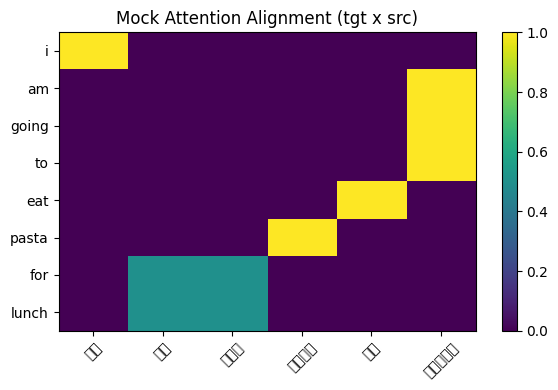

In [ ]:
import re
import time
import math
import numpy as np

# ------------------------------
# Utilities
# ------------------------------
SRC_SENT = "ÎÇòÎäî Ï†êÏã¨ ÏãùÏÇ¨Î°ú ÌååÏä§ÌÉÄÎ•º Î®πÏùÑ ÏòàÏ†ïÏûÖÎãàÎã§."
EXPECTED = "I am going to eat pasta for lunch."


def pretty(s: str) -> str:
    s = re.sub(r"\s+", " ", s).strip()
    s = s[0:1].upper() + s[1:] if s else s
    if not s.endswith("."):
        s += "."
    return s


def timer(func, *args, **kwargs):
    t0 = time.perf_counter()
    out = func(*args, **kwargs)
    t1 = time.perf_counter()
    return out, (t1 - t0)

# ------------------------------
# 1) RNN-style (naive L2R)
# ------------------------------
def tokenize_ko(text: str):
    # Basic whitespace + punctuation split, keep simple for demo
    text = re.sub(r"[^\w\sÍ∞Ä-Ìû£]", " ", text)
    toks = [t for t in text.split() if t.strip()]
    return toks

# Minimal dictionary for demo (phrase & token level)
PHRASES = {
    "Î®πÏùÑ ÏòàÏ†ïÏûÖÎãàÎã§": "am going to eat",
    "Ï†êÏã¨ ÏãùÏÇ¨Î°ú": "for lunch",
}

LEXICON = {
    "ÎÇòÎäî": "i",
    "Ï†êÏã¨": "lunch",
    "ÏãùÏÇ¨Î°ú": "for lunch",
    "ÌååÏä§ÌÉÄÎ•º": "pasta",
    "Î®πÏùÑ": "eat",
    "ÏòàÏ†ïÏûÖÎãàÎã§": "going to",
}

def translate_rnn_rule(text: str) -> str:
    # Left-to-right mapping without reordering (shows RNN baseline weakness on SOV‚ÜíSVO)
    # Apply phrase map first if exact phrase appears
    out = text
    for k, v in PHRASES.items():
        out = out.replace(k, v)

    toks = tokenize_ko(out)
    print(f'toks : {toks}')

    eng = []
    for tok in toks:
        if tok in LEXICON:
            eng.append(LEXICON[tok])
        elif tok in PHRASES:
            eng.append(PHRASES[tok])
        elif tok == "ÌååÏä§ÌÉÄ":
            eng.append("pasta")
        else:
            # leave as-is (unknown token)
            eng.append(tok)

    # naive L2R join
    return pretty(" ".join(eng))

# ------------------------------
# 2) Seq2Seq-style (encoder-decoder with reordering rules)
# ------------------------------
def translate_seq2seq_rule(text: str) -> str:
    # Simulate encoder-decoder that learns typical Korean SOV ‚Üí English SVO reordering
    # Pattern: "ÎÇòÎäî XÎ•º Î®πÏùÑ ÏòàÏ†ïÏûÖÎãàÎã§" -> "i am going to eat X"
    # and attach "for lunch" if phrase occurs
    s = text

    # detect object phrase like "ÌååÏä§ÌÉÄÎ•º"
    obj = None
    m = re.search(r"(.*?)(ÌååÏä§ÌÉÄ)Î•º", s)
    if m:
        obj = "pasta"

    # lunch phrase
    lunch = "for lunch" if "Ï†êÏã¨" in s else None

    base = "i am going to eat"
    if obj:
        out = f"{base} {obj}"
    else:
        out = base

    if lunch:
        out = f"{out} {lunch}"
    return pretty(out)

# ------------------------------
# 3) Attention-style (alignment-guided + mock attention matrix)
# ------------------------------
def translate_attention_rule(text: str, return_attention=False):
    # Tokenize Korean source
    src_tokens = ["ÎÇòÎäî", "Ï†êÏã¨", "ÏãùÏÇ¨Î°ú", "ÌååÏä§ÌÉÄÎ•º", "Î®πÏùÑ", "ÏòàÏ†ïÏûÖÎãàÎã§"]
    # Target template tokens (SVO + adjunct)
    tgt_tokens = ["i", "am", "going", "to", "eat", "pasta", "for", "lunch"]

    # Create a mock attention alignment matrix (len(tgt) x len(src))
    A = np.zeros((len(tgt_tokens), len(src_tokens)), dtype=float)

    # Rough alignments
    align = {
        0: [0],              # i  <- ÎÇòÎäî
        1: [5],              # am <- ÏòàÏ†ïÏûÖÎãàÎã§
        2: [5],              # going
        3: [5],              # to
        4: [4],              # eat <- Î®πÏùÑ
        5: [3],              # pasta <- ÌååÏä§ÌÉÄÎ•º
        6: [1,2],            # for <- Ï†êÏã¨ ÏãùÏÇ¨Î°ú
        7: [1,2],            # lunch <- Ï†êÏã¨ ÏãùÏÇ¨Î°ú
    }
    for t_idx, s_list in align.items():
        for s_idx in s_list:
            A[t_idx, s_idx] = 1.0 / len(s_list)

    out = "i am going to eat pasta for lunch"
    out = pretty(out)

    if return_attention:
        return out, A, src_tokens, tgt_tokens
    return out

# ------------------------------
# 4) Transformer (real pretrained model if available)
# ------------------------------
def translate_transformer_hf(text: str) -> str:
    try:
        from transformers import MarianTokenizer, MarianMTModel
        import torch

        model_name = "Helsinki-NLP/opus-mt-ko-en"
        tokenizer = MarianTokenizer.from_pretrained(model_name)
        model = MarianMTModel.from_pretrained(model_name)

        batch = tokenizer([text], return_tensors="pt", padding=True)
        with torch.no_grad():
            gen = model.generate(**batch, max_length=64, num_beams=5)
        out = tokenizer.batch_decode(gen, skip_special_tokens=True)[0]
        return pretty(out)
    except Exception as e:
        # Fallback: use the seq2seq rule-based output
        return translate_seq2seq_rule(text)

# ------------------------------
# Simple scorer: token precision vs expected
# ------------------------------
def token_precision(pred: str, ref: str) -> float:
    p = re.findall(r"[a-zA-Z']+", pred.lower())
    r = re.findall(r"[a-zA-Z']+", ref.lower())
    if not p or not r:
        return 0.0
    hit = sum(1 for w in p if w in r)
    return hit / len(p)

# ------------------------------
# Main comparison
# ------------------------------
def main():
    print("Source (KO):", SRC_SENT)
    print("Expected (EN):", EXPECTED)
    print("="*72)

    # 1) RNN (rule)
    rnn_out, t_rnn = timer(translate_rnn_rule, SRC_SENT)
    # 2) Seq2Seq (rule)
    s2s_out, t_s2s = timer(translate_seq2seq_rule, SRC_SENT)
    # 3) Attention (rule + mock attention)
    att_out, t_att = timer(translate_attention_rule, SRC_SENT)
    # 4) Transformer (real model if available)
    trf_out, t_trf = timer(translate_transformer_hf, SRC_SENT)


    rows = [
        ("RNN (rule)", rnn_out, t_rnn, token_precision(rnn_out, EXPECTED)),
        ("Seq2Seq (rule)", s2s_out, t_s2s, token_precision(s2s_out, EXPECTED)),
        ("Attention (rule)", att_out, t_att, token_precision(att_out, EXPECTED)),
        ("Transformer (HF)", trf_out, t_trf, token_precision(trf_out, EXPECTED)),
    ]

    print()
    print(f"{'Model':<18} | {'Output':<45} | Time(s) | TokenPrec")
    print("-"*90)
    for name, out, t, prec in rows:
        print(f"{name:<18} | {out:<45} | {t:>6.3f} | {prec:>0.3f}")

    # Optional: visualize mock attention with matplotlib if available
    try:
        import matplotlib.pyplot as plt
        att_out2, A, src, tgt = translate_attention_rule(SRC_SENT, return_attention=True)
        plt.figure(figsize=(6,4))
        plt.imshow(A, aspect='auto')
        plt.yticks(range(len(tgt)), tgt)
        plt.xticks(range(len(src)), src, rotation=45)
        plt.title("Mock Attention Alignment (tgt x src)")
        plt.colorbar()
        plt.tight_layout()
        plt.show()
    except Exception:
        pass

if __name__ == "__main__":
    main()

